# AS5001 (SUPAAAA) Advanced (Astronomical) Data Analysis

## Project 2: Deadline 11 am Fri 29 Nov 2019

In [1]:
# Enable inline plotting in notebook
%matplotlib inline
import math

import glob

# Populate namespace with numerical python function library and matplotlib plotting library.
import numpy as np
import matplotlib.pyplot as plt

# I don't know much about this package, other than it makes slow cells go fast!!
from numba import njit

In [2]:
######## NATURE CONSTANTS ##########

c = 3e5         #km/s
G = 6.67e-11    # m^3/kg/s^2
sec = 60*60*24     # s in a day
msol = 1.98e30  # solar mass in kg

In [3]:
# UNiform RNG

def RANU(a, b, iseed):   
    # Return on each call a new random number sampling
    # a uniform distribution between limits A and B,
    # and a new value of the seed integer ISEED.
    # Input:
    # a (float) lower limit of boxcar
    # b (float) upper limit of boxcar
    
    # iseed (int) seed integer used for the random number generator
    # Using np.random.seed to set the random number generator seed:
    np.random.seed(seed = iseed)
    
    # Output:
    # ranu (float) uniform random number
    return np.random.uniform(a, b, size = None)
   

# Built-in Gaussian RNG
# To save time
def gauss(mu, sig):
    g = np.random.normal(mu, sig, size = None)
    return g

## Hunting a Black Hole in GS2000

In the close binary system GS2000, a late-type main-sequence star
orbits around a compact object surrounded by an accretion disk.
GS2000 is a "soft X-ray transient" discovered during an outburst
of the disk when it became a bright X-ray source due to temporarily
increased rate of accretion onto the compact object.
The compact object is suspected to be a black hole,
but it could also be a neutron star.  Theory suggests that
the maximum mass possible for a neutron star is about 3 solar masses.

The goal of this project is to use data analysis techniques learned
in the lectures to estimate the mass of the compact object
in GS2000, and hence to determine if it is likely to be a black hole.
To measure the compact object mass, the strategy is to measure
the period and orbital velocity of the companion star,
and then apply Kepler's law.

The 10-m Keck telescope on Mauna Kea in Hawaii has been used to
obtain 13 spectra of GS2000 at 13 different binary phases.
The spectra include light both from the companion star and from
the accretion disk.  They were taken a few years after the outburst,
when accretion disk had faded considerably, so that the companion star
makes a substantial contribution to the spectrum.

Because GS2000 is quite faint, spectra are rather noisy
even with the CCD spectrograph on the 10m Keck telescope.
The H$\alpha$ emission line from the quiescent accretion disk is readily
visible, with a characteristic double-peaked velocity profile.
But it is not easy to spot absorption lines from the companion star
in the individual spectra.
For this reason a cross-correlation analysis is needed to detect
the radial velocity of the companion star at each of the 13 phases.
A number of bright main sequence stars were observed to provide
"template" spectra, in which the locations of absorption lines
are easily visible.

The techniques required have been developed in the lectures and homework sets.
Steps of the cross-correlation radial velocity analysis may be as follows:



## 1: Plot on a single page the template star spectra, arranged by spectral type, and normalised to a common continuum level, to show how absorption line ratios change with spectral type. [5]

In [5]:
# Reading in necessary data
# Adjust datadir to the location of the 'keck/' folder as required
# Here I have it in the same folder as my notebook

templates = []

datadir = 'keck/'
templates.append(glob.glob(datadir + 'keck_g5.dat'))
templates.append(glob.glob(datadir + 'keck_g9.dat'))

ktemplates = sorted(glob.glob(datadir + 'keck_k*.dat'))
for k in ktemplates:
    templates.append(k)
    
templates.append(glob.glob(datadir + 'keck_m*.dat'))

templates[0] = str(templates[0])[2:-2]
templates[1] = str(templates[1])[2:-2]
templates[9] = str(templates[9])[2:-2]

gs2000 = sorted(glob.glob(datadir + 'keck_gs2*.dat'))

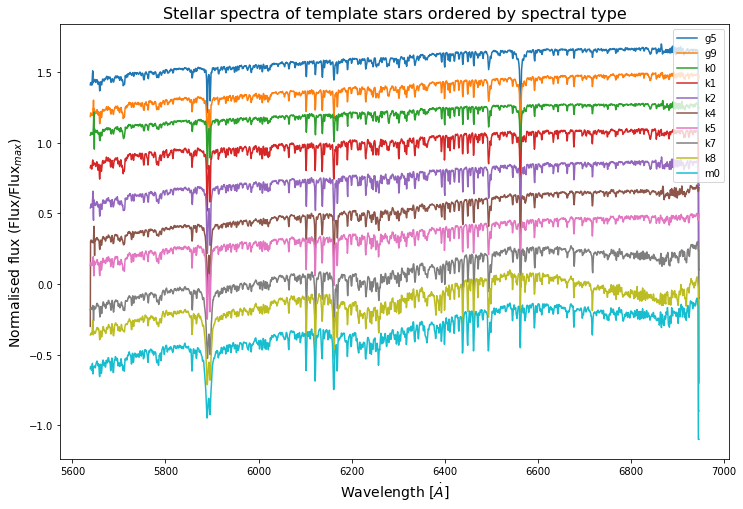

In [7]:
# Reading spectra data for template stars

wavelengths = []
ys = []
uncs = []

for template in templates:
    f = open(template)
    lines = f.readlines()
    i = 0
    for line in lines:
        data = line.split()
        wavelengths.append(float(data[0]))
        ys.append(float(data[1]))
        uncs.append(float(data[2]))

# Each template spectra has the same number of values (2041)
# Therefore straightforward to append all data to one list, and plot in multiples of 2041

wavelengths = np.array(wavelengths)
ys = np.array(ys)
uncs = np.array(uncs)

# Normalising continuum:
# Plotting each spectrum divided by the maximum flux in it
# Brings all spectra down to the same continuum level

# Just shifted these all manually, nothing fancy
plt.plot(wavelengths[(0*2041):((0+1)*2041)], ys[(0*2041):((0+1)*2041)]/max(ys[(0*2041):((0+1)*2041)])+0.7, label = str(templates[0])[10:12])
plt.plot(wavelengths[(1*2041):((1+1)*2041)], ys[(1*2041):((1+1)*2041)]/max(ys[(1*2041):((1+1)*2041)])+0.5, label = str(templates[1])[10:12])
plt.plot(wavelengths[(2*2041):((2+1)*2041)], ys[(2*2041):((2+1)*2041)]/max(ys[(2*2041):((2+1)*2041)])+0.3, label = str(templates[2])[10:12])
plt.plot(wavelengths[(3*2041):((3+1)*2041)], ys[(3*2041):((3+1)*2041)]/max(ys[(3*2041):((3+1)*2041)])+0.1, label = str(templates[3])[10:12])
plt.plot(wavelengths[(4*2041):((4+1)*2041)], ys[(4*2041):((4+1)*2041)]/max(ys[(4*2041):((4+1)*2041)])-0.1, label = str(templates[4])[10:12])
plt.plot(wavelengths[(5*2041):((5+1)*2041)], ys[(5*2041):((5+1)*2041)]/max(ys[(5*2041):((5+1)*2041)])-0.3, label = str(templates[5])[10:12])
plt.plot(wavelengths[(6*2041):((6+1)*2041)], ys[(6*2041):((6+1)*2041)]/max(ys[(6*2041):((6+1)*2041)])-0.5, label = str(templates[6])[10:12])
plt.plot(wavelengths[(7*2041):((7+1)*2041)], ys[(7*2041):((7+1)*2041)]/max(ys[(7*2041):((7+1)*2041)])-0.7, label = str(templates[7])[10:12])
plt.plot(wavelengths[(8*2041):((8+1)*2041)], ys[(8*2041):((8+1)*2041)]/max(ys[(8*2041):((8+1)*2041)])-0.9, label = str(templates[8])[10:12])
plt.plot(wavelengths[(9*2041):((9+1)*2041)], ys[(9*2041):((9+1)*2041)]/max(ys[(9*2041):((9+1)*2041)])-1.1, label= str(templates[9])[10:12])

plt.legend(loc = 'upper right')
    
plt.title('Stellar spectra of template stars ordered by spectral type', fontsize = 16)
plt.xlabel('Wavelength [$\dot{A}$]', fontsize = 14)
plt.ylabel('Normalised flux (Flux/Flux$_{max}$)', fontsize = 14)

#plt.xlim(5600, 7060)
#plt.ylim(-1.0,1.8)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0], fig_size[1] = 12., 8.

plt.show()

## 2: Plot on a single page, ordered by binary phase, the 13 spectra of GS2000, to show the shape of the continuum and the changing profile of the H-alpha emission line. [5]

In [8]:
# Reading the spectra data for GS2000
# Putting all 13 binary phases in one list, to be sorted later!

wavelengthg = []; yg = []; gunc = []

for dat in gs2000:
    f = open(dat)
    lines = f.readlines()
    for line in lines:
        datag = line.split()
        wavelengthg.append(float(datag[0]))
        yg.append(float(datag[1]))
        gunc.append(float(datag[2]))

wavelengthg = np.array(wavelengthg)
yg = np.array(yg)

In [9]:
# Reading in binary phase of each spectrum from notes file
# To check the order of binary phase

g = open(datadir + 'keck_notes.dat')
lines = g.readlines()[5:18]

bin_phase = []

for line in lines:
    dat1 = line.split()
    bin_phase.append(float(dat1[2]))
print(bin_phase)

[-0.1405, -0.0583, 0.0325, 0.0998, 0.174, 0.231, 0.3079, 0.3699, 0.4388, 0.5008, 0.5698, 0.6371, 0.7276]


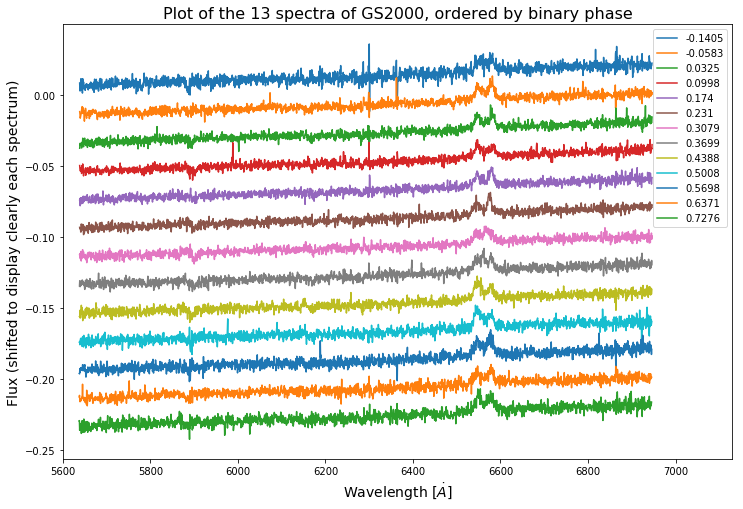

In [10]:
# These spectra are also 2041 data points long!! Thanks whoever took these that's super handy
# Plotting them in ascending order of binary phase
# Looping through list and shifting accordingly since they all have similar y-ranges

for i in range(len(bin_phase)):
    plt.plot(wavelengthg[(i*2041):((i+1)*2041)], yg[(i*2041):((i+1)*2041)] -float(i)*0.02, label = bin_phase[i])

plt.title('Plot of the 13 spectra of GS2000, ordered by binary phase', fontsize = 16)
plt.xlabel('Wavelength [$\dot{A}$]', fontsize = 14)
plt.ylabel('Flux (shifted to display clearly each spectrum)', fontsize = 14)

plt.xlim(5600, 7130)

plt.legend(loc = 'upper right')
plt.show()


## 3: Plot the average of the 13 spectra of GS2000. Are any of the expected absorption lines detected? What range of spectral types provides a good match? [5]

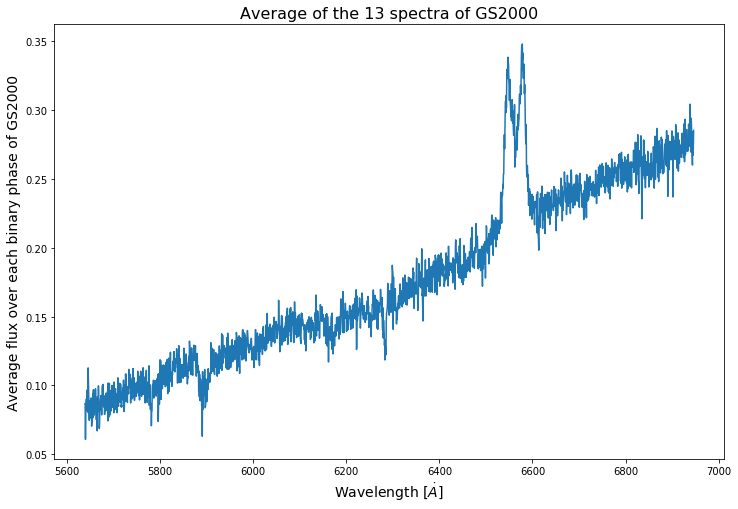

In [11]:
mean_spec = []

# Going through spectra and taking mean of flux at each wavelength.
for i in range(2041):
    mean_spec.append(np.mean(yg[i] + yg[2041+i] + yg[2*2041+i] + yg[3*2041+i] + yg[4*2041+i] + yg[5*2041+i] + yg[6*2041+i] + yg[7*2041+i] + yg[8*2041+i]+ yg[9*2041+i] + yg[10*2041+i] + yg[11*2041+i] + yg[12*2041+i]))

# Plotting mean spectrum with a few K
plt.plot(wavelengthg[0:2041], np.array(mean_spec))

plt.title('Average of the 13 spectra of GS2000', fontsize = 16)
plt.xlabel('Wavelength [$\dot{A}$]', fontsize = 14)
plt.ylabel('Average flux over each binary phase of GS2000', fontsize = 14)

plt.show()

----------
See report for discussion of which spectra are a good match!

----------

## 4: Fit a smooth function to the continuum of each of the spectra.

In [12]:
# Defining function to remove values from a list
# Inputs: list (alist), number to be searched for in list and removed (val)
# Outputs: List with values = val removed from the list 

def remove_val(alist, val):
    return [value for value in alist if value != val]

In [13]:
# Putting the GS2000 data into discrete lists now..
# _l is wavelength and _y is 'flux'/y-value
g1_l = np.array(wavelengthg[0:2041]); g1_y = np.array(yg[0:2041])
g2_l = np.array(wavelengthg[(1*2041):((1+1)*2041)]); g2_y = np.array(yg[(1*2041):((1+1)*2041)])
g3_l = np.array(wavelengthg[(2*2041):((2+1)*2041)]); g3_y = np.array(yg[(2*2041):((2+1)*2041)])
g4_l = np.array(wavelengthg[(3*2041):((3+1)*2041)]); g4_y = np.array(yg[(3*2041):((3+1)*2041)])
g5_l = np.array(wavelengthg[(4*2041):((4+1)*2041)]); g5_y = np.array(yg[(4*2041):((4+1)*2041)])
g6_l = np.array(wavelengthg[(5*2041):((5+1)*2041)]); g6_y = np.array(yg[(5*2041):((5+1)*2041)])
g7_l = np.array(wavelengthg[(6*2041):((6+1)*2041)]); g7_y = np.array(yg[(6*2041):((6+1)*2041)])
g8_l = np.array(wavelengthg[(7*2041):((7+1)*2041)]); g8_y = np.array(yg[(7*2041):((7+1)*2041)])
g9_l = np.array(wavelengthg[(8*2041):((8+1)*2041)]); g9_y = np.array(yg[(8*2041):((8+1)*2041)])
g10_l = np.array(wavelengthg[(9*2041):((9+1)*2041)]); g10_y = np.array(yg[(9*2041):((9+1)*2041)])
g11_l = np.array(wavelengthg[(10*2041):((10+1)*2041)]); g11_y = np.array(yg[(10*2041):((10+1)*2041)])
g12_l = np.array(wavelengthg[(11*2041):((11+1)*2041)]); g12_y = np.array(yg[(11*2041):((11+1)*2041)])
g13_l = np.array(wavelengthg[(12*2041):((12+1)*2041)]); g13_y = np.array(yg[(12*2041):((12+1)*2041)])


# Fitting a smooth function to the continuum of each of the spectra
# First want to mask the H-alpha feature:
# Do this by setting inverse variance weights = 0, by making error bars infinitely large

# Define h-alpha feature between 6525 -6600 Angstrom
gs11 = np.array(np.where(6525. < g1_l, g1_l, 1.)); gs12 = np.array(np.where(6600. > g1_l, g1_l, 1.))
gs1new = gs11+gs12

# Give all points in this range huge error bars
unc1w = np.where(gs1new < 7000., gunc[0:2041], np.array(gunc[0:2041])*1e50)
unc2w = np.where(gs1new < 7000., gunc[(1*2041):((1+1)*2041)], np.array(gunc[(1*2041):((1+1)*2041)])*1e50)
unc3w = np.where(gs1new < 7000., gunc[(2*2041):((2+1)*2041)], np.array(gunc[(2*2041):((2+1)*2041)])*1e50)
unc4w = np.where(gs1new < 7000., gunc[(3*2041):((3+1)*2041)], np.array(gunc[(3*2041):((3+1)*2041)])*1e50)
unc5w = np.where(gs1new < 7000., gunc[(4*2041):((4+1)*2041)], np.array(gunc[(4*2041):((4+1)*2041)])*1e50)
unc6w = np.where(gs1new < 7000., gunc[(5*2041):((5+1)*2041)], np.array(gunc[(5*2041):((5+1)*2041)])*1e50)
unc7w = np.where(gs1new < 7000., gunc[(6*2041):((6+1)*2041)], np.array(gunc[(6*2041):((6+1)*2041)])*1e50)
unc8w = np.where(gs1new < 7000., gunc[(7*2041):((7+1)*2041)], np.array(gunc[(7*2041):((7+1)*2041)])*1e50)
unc9w = np.where(gs1new < 7000., gunc[(8*2041):((8+1)*2041)], np.array(gunc[(8*2041):((8+1)*2041)])*1e50)
unc10w = np.where(gs1new < 7000., gunc[(9*2041):((9+1)*2041)], np.array(gunc[(9*2041):((9+1)*2041)])*1e50)
unc11w = np.where(gs1new < 7000., gunc[(10*2041):((10+1)*2041)], np.array(gunc[(10*2041):((10+1)*2041)])*1e50)
unc12w = np.where(gs1new < 7000., gunc[(11*2041):((11+1)*2041)], np.array(gunc[(11*2041):((11+1)*2041)])*1e50)
unc13w = np.where(gs1new < 7000., gunc[(12*2041):((12+1)*2041)], np.array(gunc[(12*2041):((12+1)*2041)])*1e50)


In [14]:
# Running Gaussian optimal average:

# Defining memory function G(t)

tau = 100.  # angstrom (exponential needs to be dimensionless)

# Input: wavelength (float)
# Output: exponential of wavelength/window tau
@njit    # The code caffeinating thing!! It's incredible
def g_gauss(lamb):
    g_l = np.exp((-1./2.)*(lamb/tau)**2)
    return g_l


# Defining Gaussian smooth function:
# Inputs: x-axis data (e.g. time, wavelength), y-axis data (e.g. flux), corresponding uncertainty in y value
# Outputs: optimal average using a gaussian filter function, variance in optimal average
@njit
def gaussian_smooth(xlist, ylist, ysigma):
    
    opt_av = []
    opt_av_sig = []
    
    for i in range(len(xlist)):
    
        weight = 0.
        numerator = 0.
        unc = 0.
    
        for j in range(len(xlist)):
            weight = weight + ((g_gauss(xlist[i] - xlist[j]))/(ysigma[j]**2))
            numerator = numerator + (ylist[j]*((g_gauss(xlist[i] - xlist[j]))/(ysigma[j]**2)))                       
        # Calculating the uncertainty in the average fit:
        unc = np.sqrt(1./weight)
        
        opt_av.append(numerator/weight)
        opt_av_sig.append(unc)
    return opt_av, opt_av_sig

# Sigma clipping the data:
# Making a function to calcuate chi^2
# Inputs: data (list1), model (model), data uncertainty (sig1)
# Output: Value of chi^2 by summing up differences between data and model value, weighted by sigma

def calc_chisq_list(list1, model, sig1):
    chisq = 0.
    for i in range(len(list1)):
        chisq = chisq + (((list1[i] - model[i])/sig1[i])**2)
    return chisq

In [1]:
# Applying gaussian_smooth function to all 13 spectra of GS2000
# To obtain 13 different continuum fits (with variances)

av1, sig1 = gaussian_smooth(g1_l, g1_y, unc1w)
av2, sig2 = gaussian_smooth(g2_l, g2_y, unc2w)
av3, sig3 = gaussian_smooth(g3_l, g3_y, unc3w)
av4, sig4 = gaussian_smooth(g4_l, g4_y, unc4w)
av5, sig5 = gaussian_smooth(g5_l, g5_y, unc5w)
av6, sig6 = gaussian_smooth(g6_l, g6_y, unc6w)
av7, sig7 = gaussian_smooth(g7_l, g7_y, unc7w)
av8, sig8 = gaussian_smooth(g8_l, g8_y, unc8w)
av9, sig9 = gaussian_smooth(g9_l, g9_y, unc9w)
av10, sig10 = gaussian_smooth(g10_l, g10_y, unc10w)
av11, sig11 = gaussian_smooth(g11_l, g11_y, unc11w)
av12, sig12 = gaussian_smooth(g12_l, g12_y, unc12w)
av13, sig13 = gaussian_smooth(g13_l, g13_y, unc13w)

NameError: name 'gaussian_smooth' is not defined

In [16]:
# Making standard deviations into arrays

sig1 = np.array(sig1); sig2 = np.array(sig2); sig3 = np.array(sig3); sig4 = np.array(sig4);
sig5 = np.array(sig5); sig6 = np.array(sig6); sig7 = np.array(sig7); sig8 = np.array(sig8);
sig9 = np.array(sig9); sig10 = np.array(sig10); sig11 = np.array(sig11);
sig12 = np.array(sig12); sig13 = np.array(sig13)

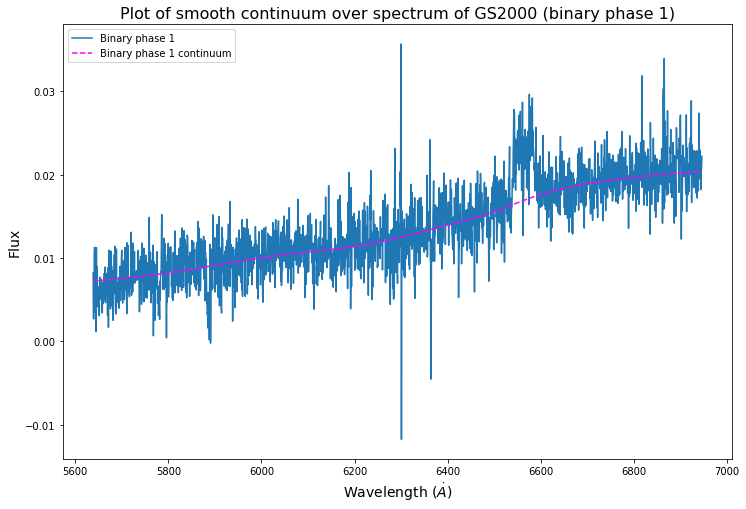

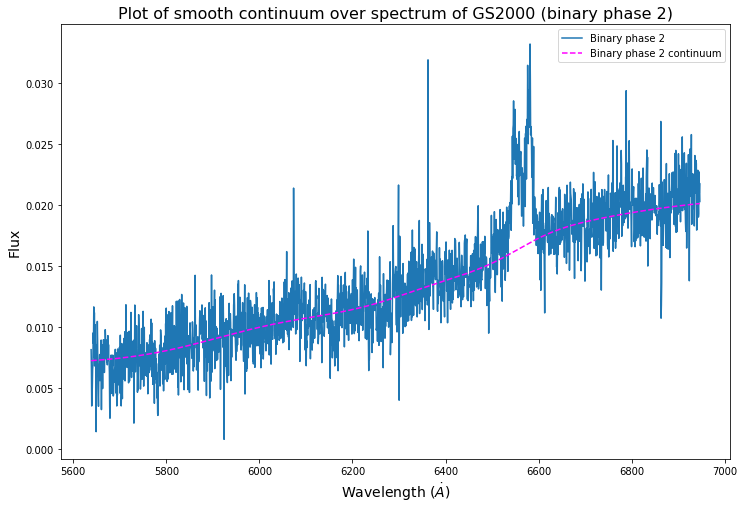

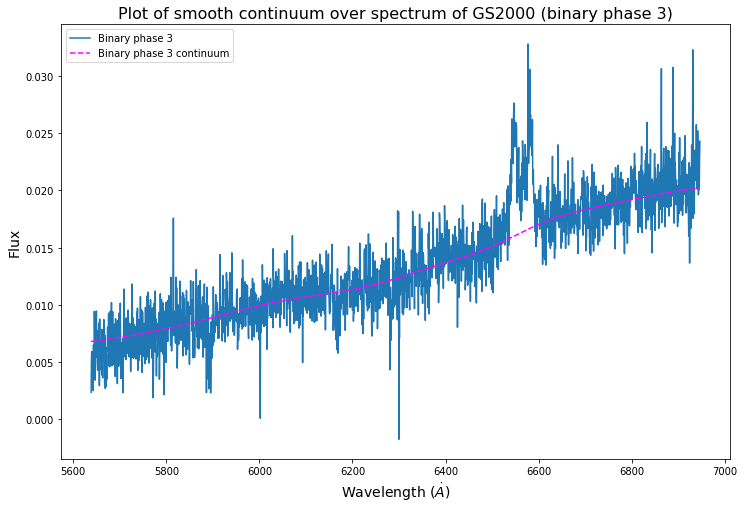

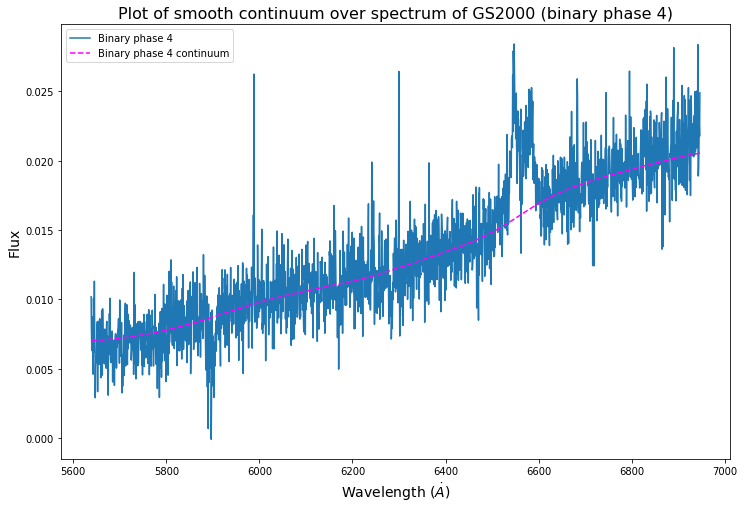

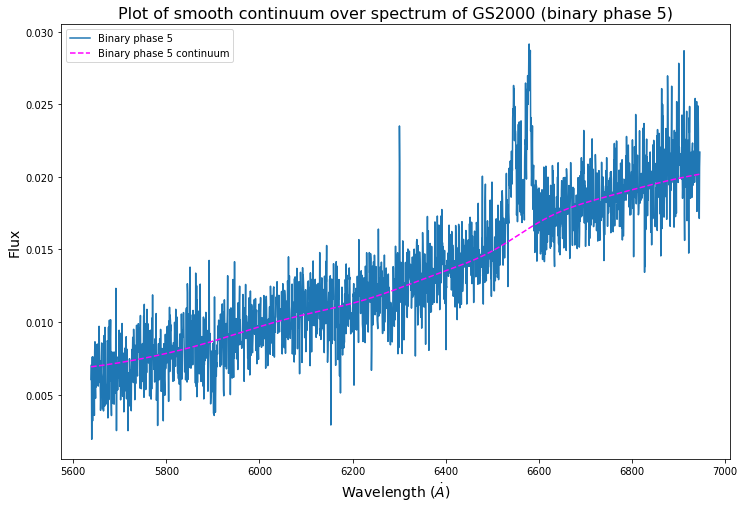

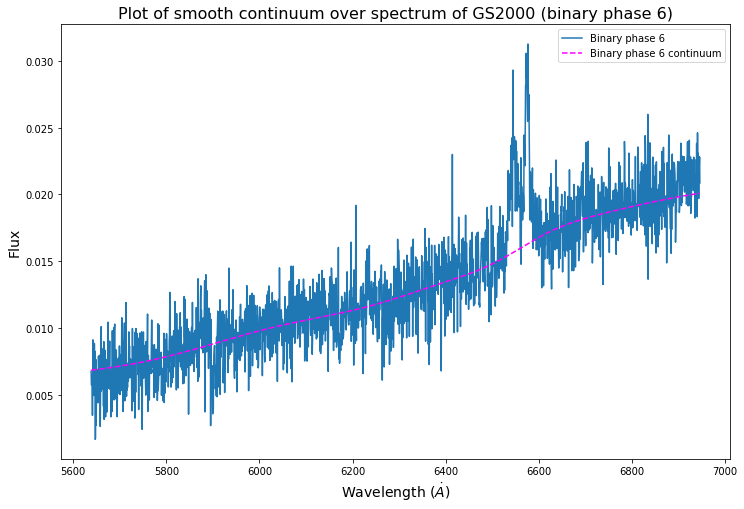

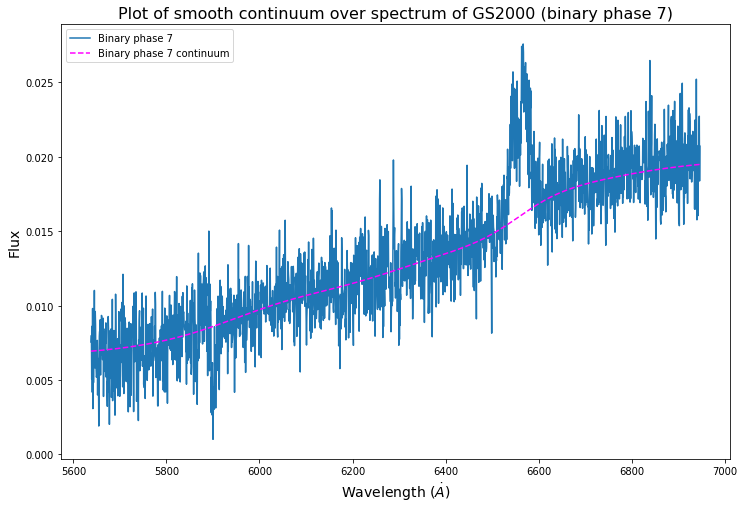

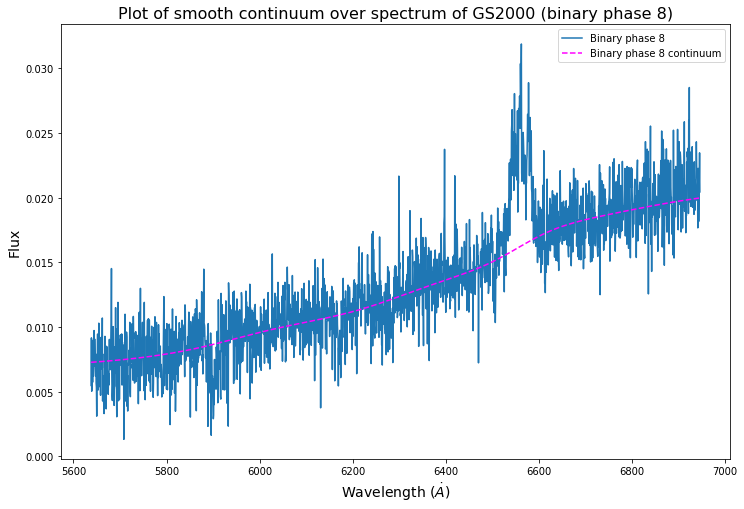

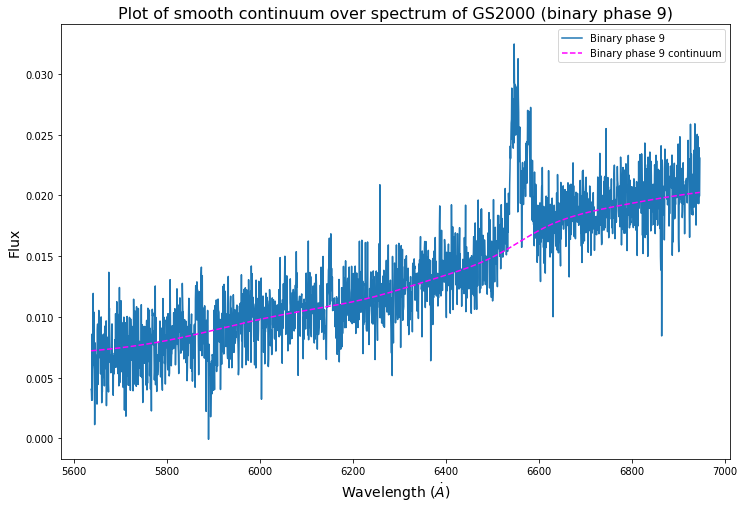

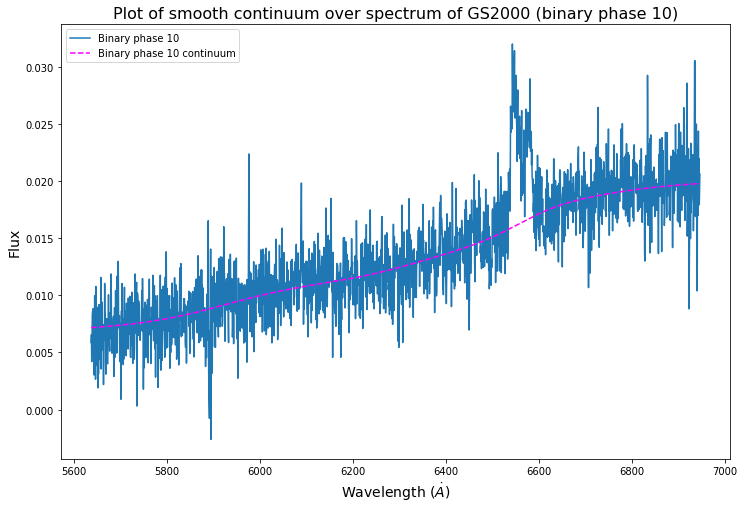

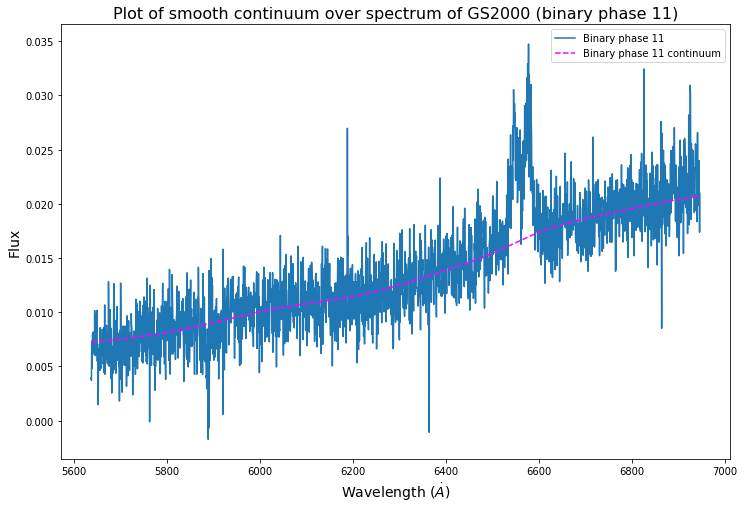

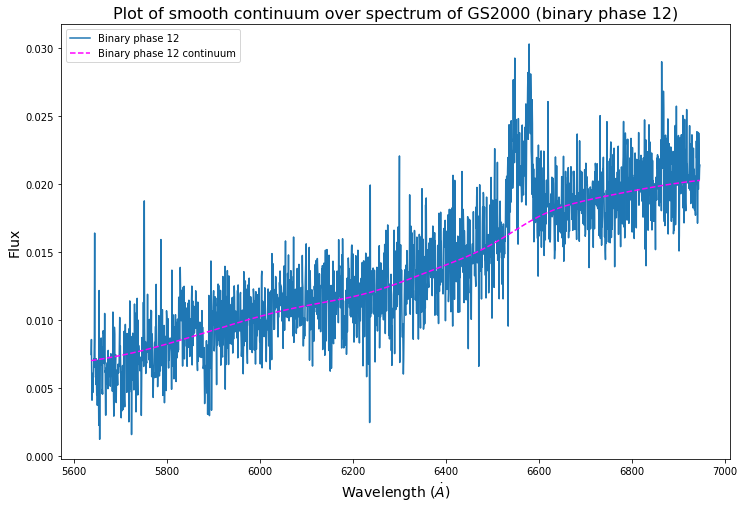

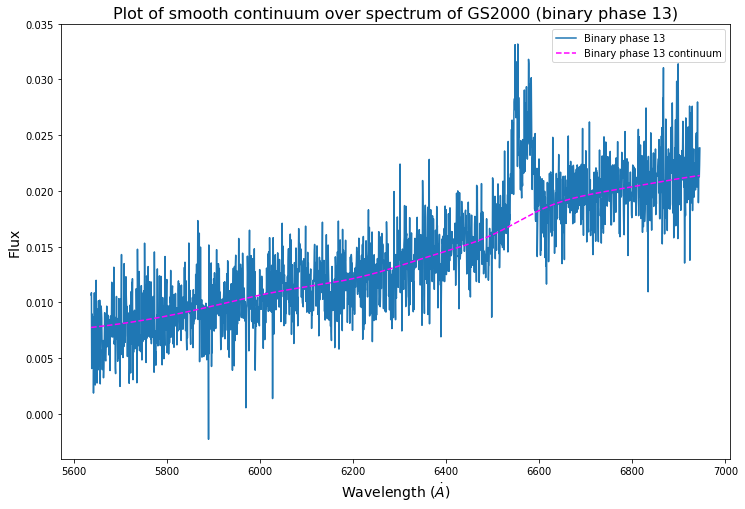

In [17]:
# Putting everything into a list to loop through and plot

av_list = [av1, av2, av3, av4, av5, av6, av7, av8, av9, av10, av11, av12, av13]
wl_list = [g1_l, g2_l, g3_l, g4_l, g5_l, g6_l, g7_l, g8_l, g9_l, g10_l, g11_l, g12_l, g13_l]
y_list = [g1_y, g2_y, g3_y, g4_y, g5_y, g6_y, g7_y, g8_y, g9_y, g10_y, g11_y, g12_y, g13_y]

for i in range(len(av_list)):
    plt.plot(wl_list[i], y_list[i], label = 'Binary phase '+str(i+1))
    plt.plot(wl_list[i], av_list[i], '--', color = 'magentaw', label = 'Binary phase '+str(i+1)+' continuum')
    plt.title('Plot of smooth continuum over spectrum of GS2000 (binary phase '+str(i+1)+')', fontsize = 16)
    plt.xlabel('Wavelength ($\dot{A}$)', fontsize = 14)
    plt.ylabel('Flux', fontsize = 14)
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0], fig_size[1] = 12., 8.
    plt.legend()
    plt.show()

In [18]:
# Best template spectrum = K5

k5_l = wavelengths[(6*2041):((6+1)*2041)]; k5_y = ys[(6*2041):((6+1)*2041)]; k5_sig = uncs[(6*2041):((6+1)*2041)]

# Running optimal average of K5 spectrum:
avk5, vark5 = gaussian_smooth(k5_l, k5_y, k5_sig)

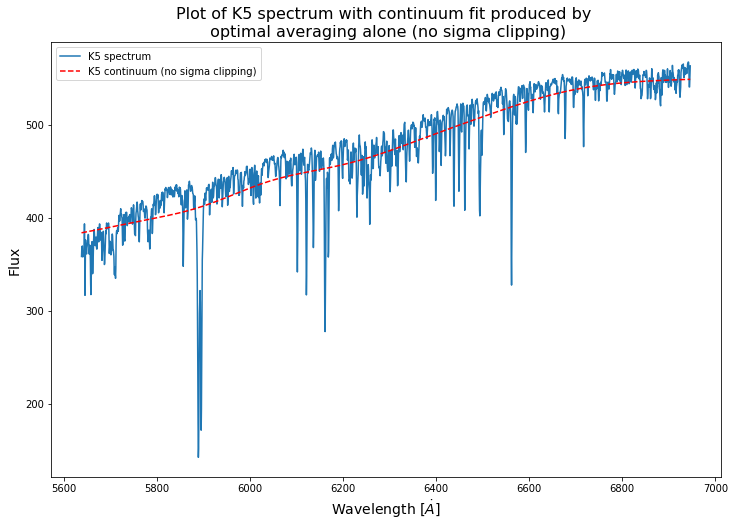

In [19]:
plt.plot(k5_l, k5_y, label = 'K5 spectrum')
plt.plot(k5_l, avk5, '--', color = 'r', label = 'K5 continuum (no sigma clipping)')
plt.title('Plot of K5 spectrum with continuum fit produced by \n optimal averaging alone (no sigma clipping)', fontsize = 16)
plt.xlabel('Wavelength [$\dot{A}$]', fontsize = 14)
plt.ylabel('Flux', fontsize = 14)
plt.legend()
plt.show()

-------------
Just performing a running optimal average with a Gaussian filter on the template spectrum yields a poor fit - this can be seen particularly in the Soduium D absorption line at around 5900 $\dot{A}$. To produce a better fitting continuum, it is necessary to sigma clip the data.

-------------

In [20]:
# Sigma clipping data:
# Remove all data that is more than 2-sigma below or above the median value.
# i.e larger than sigma upper or less than sigma lower

centre = np.median(k5_y)
sig_upp = centre + 2.*np.std(k5_y); sig_low = centre - 2.*np.std(k5_y)

    
# Setting the error bars of the data outside the 2-sigma clip to be very large so they are ignored when 
# Performing the Gaussian running optimal average
k5_inf_err = np.where(k5_y > sig_low, k5_sig, k5_sig*1e50)

# Nothing is larger than 2-sigma, so need need to sigma clip the other way

In [21]:
# Perform optimal average by Gaussian filter on clipped data

avk5_clipped, vark5_clipped = gaussian_smooth(k5_l, k5_y, k5_inf_err)

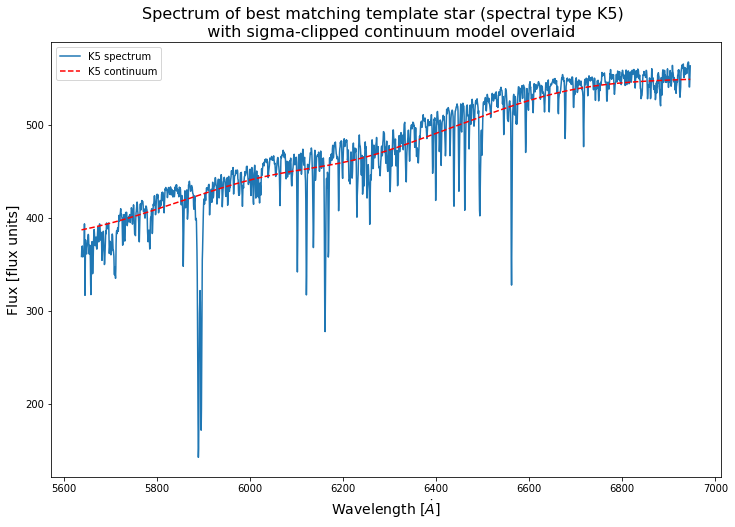

In [22]:
plt.plot(k5_l, k5_y, label = 'K5 spectrum')
plt.plot(k5_l, avk5_clipped, linestyle = '--', color = 'red', label = 'K5 continuum')

plt.title('Spectrum of best matching template star (spectral type K5) \n  with sigma-clipped continuum model overlaid', fontsize = 16)
plt.xlabel('Wavelength [$\dot{A}$]', fontsize = 14)
plt.ylabel('Flux [flux units]', fontsize = 14)
plt.legend()
plt.show()


----------
This shows a much closer fit to the data, and can therefore be treated as a model for the continuum of K5.

----------


## Plot the average GS2000 spectrum divided by the fitted continuum, and do the same for the most suitable template spectrum. [10]

In [23]:
# Plotting the average of all 13 spectra of GS2000 by the average of 13 fitted continuum

mean_cont = []

for i in range(len(av1)):
    mean_cont.append(np.mean(av1[i] + av2[i] + av3[i] + av4[i] + av5[i] + av6[i] + av7[i] + av8[i] + av9[i]+ av10[i] + av11[i] + av12[i] + av13[i]))


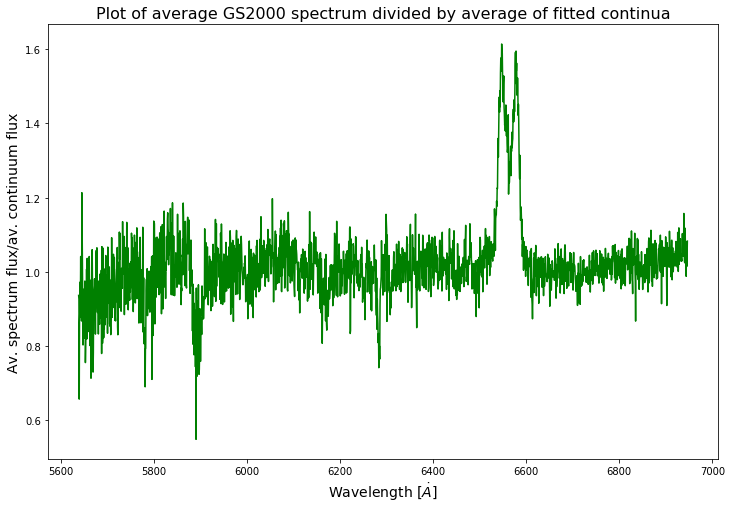

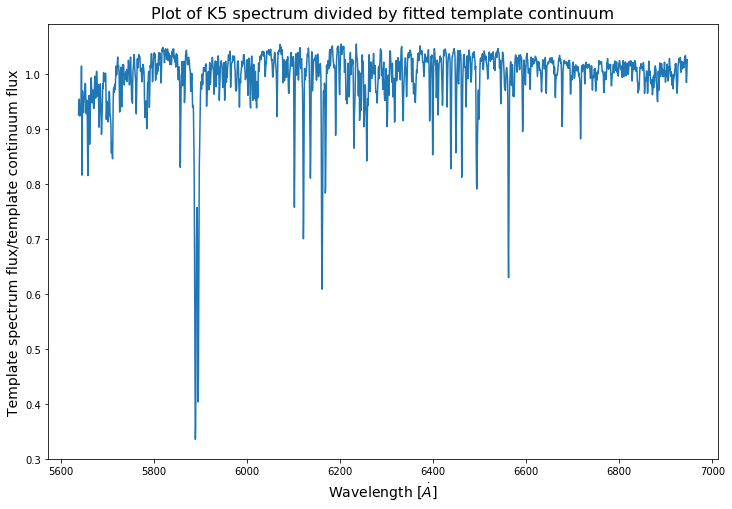

In [25]:
plt.plot(g1_l, np.array(mean_spec)/np.array(mean_cont), color = 'green')
plt.title('Plot of average GS2000 spectrum divided by average of fitted continua', fontsize = 16)
plt.xlabel('Wavelength [$\dot{A}$]', fontsize = 14)
plt.ylabel('Av. spectrum flux/av. continuum flux', fontsize = 14)

plt.show()

plt.plot(k5_l, np.array(k5_y)/np.array(avk5_clipped), label = 'K5 spectrum')
plt.title('Plot of K5 spectrum divided by fitted template continuum', fontsize = 16)
plt.xlabel('Wavelength [$\dot{A}$]', fontsize = 14)
plt.ylabel('Template spectrum flux/template continuum flux', fontsize = 14)

plt.show()

# 5: For each of the 13 spectra, measure the radial velocity by performing a cross-correlation analysis with the most suitable template spectrum. [25]

## To accomplish this:
    
## (a) Subtract the continuum from the GS2000 spectrum, and from the template spectra.
    
## (b) Apply a velocity shift to the continuum-subtracted template spectrum.

## (c) Scale the shifted and continuum-subtracted template spectrum to fit the continuum-subtracted GS2000 spectrum.
    
## (d) Repeat the above for a number of different velocities, and plot the $\chi^2$ of the fit as a function of the velocity shift.
        
## (e) Use the $\chi^2$ minimum to estimate the radial velocity and its 1-sigma uncertainty.
    

In [ ]:
plt.plot()

In [27]:
# Doing a bit of admin in this cell, naming things etc

# Define continuum-subtracted template:
k5_sub = k5_y - avk5_clipped

#Define continua-subtracted GS2000 data:
g1_sub = g1_y - av1; g2_sub = g2_y - av2; g3_sub = g3_y - av3; g4_sub = g4_y - av4; g5_sub = g5_y - av5
g6_sub = g6_y - av6; g7_sub = g7_y - av7; g8_sub = g8_y - av8; g9_sub = g9_y - av9
g10_sub = g10_y - av10; g11_sub = g11_y - av11; g12_sub = g12_y - av12; g13_sub = g13_y - av13  


gs11 = np.array(np.where(6525. < g1_l, g1_l, 1.)); gs12 = np.array(np.where(6600. > g1_l, g1_l, 1.))
gs1new = gs11+gs12

# Give all points in the cont-sub GS2000 H-alpha region in this range huge error bars
# So as not to mess too much with the cross correlation fitting
g1_subf = np.where(gs1new < 7000., g1_sub, np.array(g1_sub)*0.)
g2_subf = np.where(gs1new < 7000., g2_sub, np.array(g2_sub)*0.)
g3_subf = np.where(gs1new < 7000., g3_sub, np.array(g3_sub)*0.)
g4_subf = np.where(gs1new < 7000., g4_sub, np.array(g4_sub)*0.)
g5_subf = np.where(gs1new < 7000., g5_sub, np.array(g5_sub)*0.)
g6_subf = np.where(gs1new < 7000., g6_sub, np.array(g6_sub)*0.)
g7_subf = np.where(gs1new < 7000., g7_sub, np.array(g7_sub)*0.)
g8_subf = np.where(gs1new < 7000., g8_sub, np.array(g8_sub)*0.)
g9_subf = np.where(gs1new < 7000., g9_sub, np.array(g9_sub)*0.)
g10_subf = np.where(gs1new < 7000., g10_sub, np.array(g10_sub)*0.)
g11_subf = np.where(gs1new < 7000., g11_sub, np.array(g11_sub)*0.)
g12_subf = np.where(gs1new < 7000., g12_sub, np.array(g12_sub)*0.)
g13_subf = np.where(gs1new < 7000., g13_sub, np.array(g13_sub)*0.)

# Defining uncertainties: these are the raw uncertainties read in from the files
g1_sig = abs(np.array(gunc[0*2041:1*2041])); g2_sig = abs(np.array(gunc[1*2041:2*2041])); g3_sig = abs(np.array(gunc[2*2041:3*2041]))
g4_sig = abs(np.array(gunc[3*2041:4*2041])); g5_sig = abs(np.array(gunc[4*2041:5*2041])); g6_sig = abs(np.array(gunc[5*2041:6*2041]))
g7_sig = abs(np.array(gunc[6*2041:7*2041])); g8_sig = abs(np.array(gunc[7*2041:8*2041])); g9_sig = abs(np.array(gunc[8*2041:9*2041]))
g10_sig = abs(np.array(gunc[9*2041:10*2041])); g11_sig = abs(np.array(gunc[10*2041:11*2041])); g12_sig = abs(np.array(gunc[11*2041:12*2041]))
g13_sig = abs(np.array(gunc[12*2041:13*2041]))

# Continuum-subtracted uncertainties
# (adding error in spectrum in quadrature with error in cont fit)
g1_sub_sig = np.sqrt(sig1**2 + g1_sig**2); g2_sub_sig = np.sqrt(sig2**2 + g2_sig**2); g3_sub_sig = np.sqrt(sig3**2 + g3_sig**2)
g4_sub_sig = np.sqrt(sig4**2 + g4_sig**2); g5_sub_sig = np.sqrt(sig5**2 + g5_sig**2); g6_sub_sig = np.sqrt(sig6**2 + g4_sig**2)
g7_sub_sig = np.sqrt(sig7**2 + g7_sig**2); g8_sub_sig = np.sqrt(sig8**2 + g8_sig**2); g9_sub_sig = np.sqrt(sig9**2 + g9_sig**2)
g10_sub_sig = np.sqrt(sig10**2 + g10_sig**2); g11_sub_sig = np.sqrt(sig11**2 + g11_sig**2); g12_sub_sig = np.sqrt(sig12**2 + g12_sig**2)
g13_sub_sig = np.sqrt(sig13**2 + g13_sig**2)

In [28]:
# Define a function to calculate shift in wavelength given velocity
# Inputs:
    # velocity 'v' by which to shift wavelength 'l'
# Outputs: shifted l

@njit
def delta_lambda(v,l):
    return l - ((v/c)*l)

In [29]:
# Function to calculate CCF, variance in CCF and chi^2

# Inputs: 
    # d (GS2000 data), d_l (GS2000 wavelengths), dsig (GS2000 errors)
    # temp_l (Template wavelength), # Temp_y (template flux)
    # scalefac (Scale factor to scale template to GS2000 data)
    # v (velocity to shift by)
    
# Outputs:
    # CCF(v), Var[CCF(v)], chi^2(v)

def CCF_func_final(d, d_l, dsig, temp_l, temp_y, scalefac, v):


    shift_l = np.zeros_like(temp_l)
    for i,l in enumerate(temp_l):
        shift_l[i] = delta_lambda(v, l)
        
    #########--- Evidence that I did try to not just use np.interp---#########
    #difference = np.zeros_like(temp_l)
    #pattern = np.zeros_like(temp_l)

    #for i,l in enumerate(d_l):
    #    for j,ls in enumerate(shift_l):
    #        difference[j] = np.abs(l - ls)
    #    minval = np.argmin(difference)

    #    if minval+1 >= len(d_l):
    #        flux1 = np.array(d[-1])
    #        pattern[i] = np.mean(flux1)
    #        break

    #    if (difference[minval-1] > difference[minval+1]):
    #        flux = np.array([d[minval+1], d[minval]])
    #   
    #    if (difference[minval-1] < difference[minval+1]):
    #        flux = np.array([d[minval-1], d[minval]])

    #    pattern[i] = np.mean(flux)

    pattern = np.interp(d_l, shift_l, temp_y/scalefac)
    
    ccf = np.sum((d*pattern)/(dsig**2))/np.sum((pattern/dsig)**2)
    ccfvar = 1./np.sum((pattern/dsig)**2)
    chisq = np.sum(((d - (ccf*pattern))/dsig)**2)
    
    return ccf, ccfvar, chisq


In [30]:
# Once again putting names into lists to do a loop

g_y_list = [g1_subf, g2_subf, g3_subf, g4_subf, g5_subf, g6_subf, g7_subf, g8_subf, g9_subf, g10_subf, g11_subf, g12_subf, g13_subf]
g_l_list = [g1_l, g2_l, g3_l, g4_l, g5_l, g6_l, g7_l, g8_l, g9_l, g10_l, g11_l, g12_l, g13_l]
g_sig_list = [g1_sub_sig, g2_sub_sig, g3_sub_sig, g4_sub_sig, g5_sub_sig, g6_sub_sig, g7_sub_sig, g8_sub_sig, g9_sub_sig, g10_sub_sig, g11_sub_sig, g12_sub_sig, g13_sub_sig]
scale_list = [abs(min(k5_sub)/min(g1_subf)), abs(min(k5_sub)/min(g2_subf)), abs(min(k5_sub)/min(g3_subf)), abs(min(k5_sub)/min(g4_subf)), abs(min(k5_sub)/min(g5_subf)), abs(min(k5_sub)/min(g6_subf)), abs(min(k5_sub)/min(g7_subf)), abs(min(k5_sub)/min(g8_subf)), abs(min(k5_sub)/min(g9_subf)), abs(min(k5_sub)/min(g10_subf)), abs(min(k5_sub)/min(g11_subf)), abs(min(k5_sub)/min(g12_subf)), abs(min(k5_sub)/min(g13_subf))]


In [31]:
# Testing the CCF function for one binary phase (i) at a time 

# It's too late on Friday night and I'm too tired to make this into a loop to show you every single plot
# Change i from 1-13 to your hearts content I promise they're ok, I checked

i = 1

vels = np.arange(-1000., 1000., 1.)

ccf_list = []
ccf_var = []
chisq_list = []

for v in vels:
    ccf_list.append(CCF_func_final(g_y_list[i-1], g_l_list[i-1], g_sig_list[i-1], k5_l, k5_sub, scale_list[i-1], v)[0])
    ccf_var.append(CCF_func_final(g_y_list[i-1], g_l_list[i-1], g_sig_list[i-1], k5_l, k5_sub, scale_list[i-1], v)[1])
    chisq_list.append(CCF_func_final(g_y_list[i-1], g_l_list[i-1], g_sig_list[i-1], k5_l, k5_sub, scale_list[i-1], v)[2])
    print(v)

-1000.0
-999.0
-998.0
-997.0
-996.0
-995.0
-994.0
-993.0
-992.0
-991.0
-990.0
-989.0
-988.0
-987.0
-986.0
-985.0
-984.0
-983.0
-982.0
-981.0
-980.0
-979.0
-978.0
-977.0
-976.0
-975.0
-974.0
-973.0
-972.0
-971.0
-970.0
-969.0
-968.0
-967.0
-966.0
-965.0
-964.0
-963.0
-962.0
-961.0
-960.0
-959.0
-958.0
-957.0
-956.0
-955.0
-954.0
-953.0
-952.0
-951.0
-950.0
-949.0
-948.0
-947.0
-946.0
-945.0
-944.0
-943.0
-942.0
-941.0
-940.0
-939.0
-938.0
-937.0
-936.0
-935.0
-934.0
-933.0
-932.0
-931.0
-930.0
-929.0
-928.0
-927.0
-926.0
-925.0
-924.0
-923.0
-922.0
-921.0
-920.0
-919.0
-918.0
-917.0
-916.0
-915.0
-914.0
-913.0
-912.0
-911.0
-910.0
-909.0
-908.0
-907.0
-906.0
-905.0
-904.0
-903.0
-902.0
-901.0
-900.0
-899.0
-898.0
-897.0
-896.0
-895.0
-894.0
-893.0
-892.0
-891.0
-890.0
-889.0
-888.0
-887.0
-886.0
-885.0
-884.0
-883.0
-882.0
-881.0
-880.0
-879.0
-878.0
-877.0
-876.0
-875.0
-874.0
-873.0
-872.0
-871.0
-870.0
-869.0
-868.0
-867.0
-866.0
-865.0
-864.0
-863.0
-862.0
-861.0
-860.0
-859.0
-858.

265.0
266.0
267.0
268.0
269.0
270.0
271.0
272.0
273.0
274.0
275.0
276.0
277.0
278.0
279.0
280.0
281.0
282.0
283.0
284.0
285.0
286.0
287.0
288.0
289.0
290.0
291.0
292.0
293.0
294.0
295.0
296.0
297.0
298.0
299.0
300.0
301.0
302.0
303.0
304.0
305.0
306.0
307.0
308.0
309.0
310.0
311.0
312.0
313.0
314.0
315.0
316.0
317.0
318.0
319.0
320.0
321.0
322.0
323.0
324.0
325.0
326.0
327.0
328.0
329.0
330.0
331.0
332.0
333.0
334.0
335.0
336.0
337.0
338.0
339.0
340.0
341.0
342.0
343.0
344.0
345.0
346.0
347.0
348.0
349.0
350.0
351.0
352.0
353.0
354.0
355.0
356.0
357.0
358.0
359.0
360.0
361.0
362.0
363.0
364.0
365.0
366.0
367.0
368.0
369.0
370.0
371.0
372.0
373.0
374.0
375.0
376.0
377.0
378.0
379.0
380.0
381.0
382.0
383.0
384.0
385.0
386.0
387.0
388.0
389.0
390.0
391.0
392.0
393.0
394.0
395.0
396.0
397.0
398.0
399.0
400.0
401.0
402.0
403.0
404.0
405.0
406.0
407.0
408.0
409.0
410.0
411.0
412.0
413.0
414.0
415.0
416.0
417.0
418.0
419.0
420.0
421.0
422.0
423.0
424.0
425.0
426.0
427.0
428.0
429.0
430.0
431.

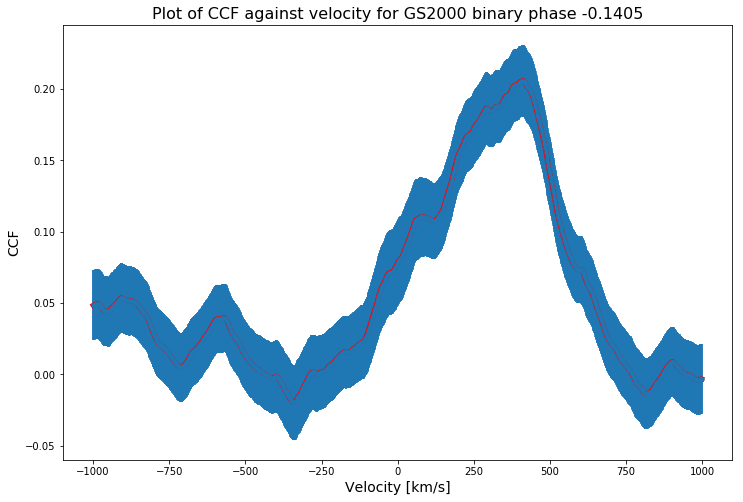

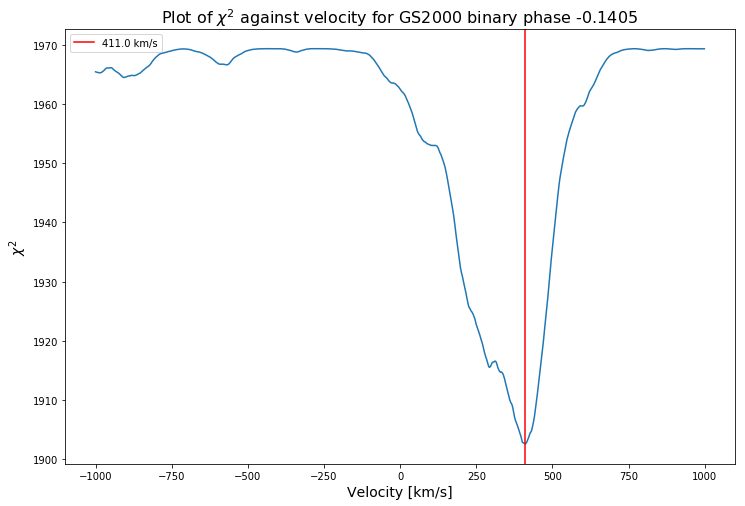

In [32]:
# Plotting CCF and chi^2 against velocity

plt.plot(vels, ccf_list, color = 'red', linewidth = 5)
plt.errorbar(vels, ccf_list, yerr = np.sqrt(np.array(ccf_var)), fmt = '.')
plt.title('Plot of CCF against velocity for GS2000 binary phase '+ str(bin_phase[i-1]), fontsize = 16)
plt.xlabel('Velocity [km/s]', fontsize = 14)
plt.ylabel('CCF', fontsize = 14)
plt.show()

for j in range(len(chisq_list)):
    if chisq_list[j] == min(chisq_list):
        minval = j
        minvel = vels[j]

plt.plot(vels, chisq_list)
plt.axvline(x = minvel, color = 'red', label = str(minvel)+' km/s')

plt.title('Plot of $\chi^2$ against velocity for GS2000 binary phase '+ str(bin_phase[i-1]), fontsize = 16)
plt.xlabel('Velocity [km/s]', fontsize = 14)
plt.ylabel('$\chi^2$', fontsize = 14)

plt.legend()
plt.show()

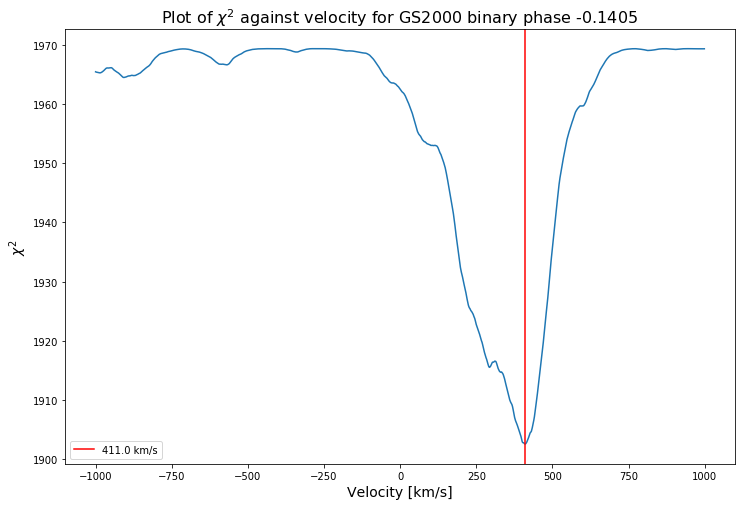

In [33]:
for j in range(len(chisq_list)):
    if chisq_list[j] == min(chisq_list):
        minval = j
        minvel = vels[j]

plt.plot(vels, chisq_list)
plt.axvline(x = minvel, color = 'red', label = str(minvel)+' km/s')

plt.title('Plot of $\chi^2$ against velocity for GS2000 binary phase '+ str(bin_phase[i-1]), fontsize = 16)
plt.xlabel('Velocity [km/s]', fontsize = 14)
plt.ylabel('$\chi^2$', fontsize = 14)

plt.legend(loc = 'lower left')
plt.show()

Velocity, chi^2 coordinates around the minimum at which to fit polynomial to = [407. 408. 409. 410. 411. 412. 413. 414.] [1902.638303266035, 1902.5755794492884, 1902.531799619695, 1902.5111980773495, 1902.509052464275, 1902.5441930513623, 1902.6042984815808, 1902.6782254432196]
Best fit polynomial by np.polyfit =          2
0.0123 x - 10.09 x + 3973


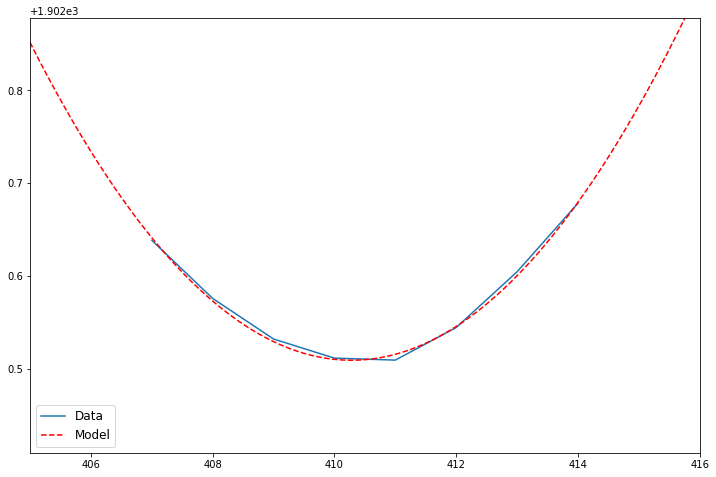

8.295793313887202 9.739169787786011
Radial velocity of GS2000 at binary phase -0.1405 = 411.0 +-  9.017481550836607


In [34]:
# Finding the 1-sigma error in the velocity

# Want to fit a curve to the minimum in the data and determine the corresponding velocities
# When chi^2 - chi^2_min = 1

# Making a list of points in the chi^2 minimum to use for the fit
xlist = vels[minval-4:minval+4]
ylist = chisq_list[minval-4:minval+4]

print('Velocity, chi^2 coordinates around the minimum at which to fit polynomial to =', xlist, ylist)

# Performing polynomial regression using np.poly1d
# This essentially fits the quadratic y = A + Bx + Cx^2
# using the sets of points points I've given it for (x, y) = (v, chi^2)

p = np.poly1d(np.polyfit(xlist, ylist, 2))
print('Best fit polynomial by np.polyfit = ', p)

# Making a list of x values to smoothly plot the model p
x = np.arange(vels[0], vels[-1], (xlist[-1]-xlist[0])/1000.)

plt.plot(xlist, ylist, label = 'Data')
plt.plot(x, p(x), '--', label = 'Model', color = 'red')

# Finding values of delta chi^2 = i
deltachi1 = min(chisq_list) + 1

plt.axhline(y = deltachi1, color = 'black')
plt.xlim(xlist[0]-2, xlist[-1]+2)
plt.ylim(min(ylist)-0.1,ylist[-1]+0.2)
plt.legend(fontsize = 12)
plt.show()

c, b, a = p

# Solve quadratic equation to find velocities where delta chi^2 = 1
x_upp = (-b + np.sqrt(b**2 - 4.*(a-deltachi1)*(c)))/(2.*c)
x_low = (-b - np.sqrt(b**2 - 4.*(a-deltachi1)*(c)))/(2.*c)

deltupp = x_upp-vels[minval]
deltlow = vels[minval]-x_low
print(deltupp, deltlow)

print('Radial velocity of GS2000 at binary phase '+str(bin_phase[i-1])+' =', vels[minval], '+- ', np.mean([deltupp, deltlow]))

In [35]:
# Condensing the above code into one small loop 
# Loop over each binary phase
# Outputs velocity and 1-sigma uncertainty for each binary phase

vellist = []
velsig = []
for i in range(1,14):

    ccf_list = []
    ccf_var = []
    chisq_list = []

    for v in vels:
        ccf_list.append(CCF_func_final(g_y_list[i-1], g_l_list[i-1], g_sig_list[i-1], k5_l, k5_sub, scale_list[i-1], v)[0])
        ccf_var.append(CCF_func_final(g_y_list[i-1], g_l_list[i-1], g_sig_list[i-1], k5_l, k5_sub, scale_list[i-1], v)[1])
        chisq_list.append(CCF_func_final(g_y_list[i-1], g_l_list[i-1], g_sig_list[i-1], k5_l, k5_sub, scale_list[i-1], v)[2])
        
    for j in range(len(chisq_list)):
        if chisq_list[j] == min(chisq_list):
            minval = j
            minvel = vels[j]
            vellist.append(minvel)
            
    xlist = vels[minval-4:minval+4]
    ylist = chisq_list[minval-4:minval+4]
    
    p = np.poly1d(np.polyfit(xlist, ylist, 2))
    
    deltachi1 = min(chisq_list) + 1

    c, b, a = p

    x_upp = (-b + np.sqrt(b**2 - 4.*(a-deltachi1)*(c)))/(2.*c)
    x_low = (-b - np.sqrt(b**2 - 4.*(a-deltachi1)*(c)))/(2.*c)

    deltupp = x_upp-vels[minval]
    deltlow = vels[minval]-x_low
    
    velsig.append(np.mean([deltupp, deltlow]))

In [36]:
# Outputting the calculated velocities for each binary phase, and the 1-sigma uncertainties

print(vellist)
print(velsig)


[411.0, 166.0, -170.0, -339.0, -497.0, -530.0, -519.0, -397.0, -225.0, -57.0, 203.0, 391.0, 496.0]
[9.017481550836607, 9.285253119473808, 8.86679412039176, 6.546961955305562, 7.631554461735561, 6.014120711902422, 6.051779262201592, 6.0044663836225425, 8.708133668346548, 10.653528580138975, 7.6030621556229505, 7.46669909244423, 5.978282316559046]


In [ ]:
####------ HACK SESSION SUGGESTIONS ------######

# First time fitting continuum, will have wide dips corresponding to absorption dips
# Reject points with largest errorbars (2-sigma clipping)

# Interpolate template spectrum to some other velocity (V - shift)
# Take this as a pattern
# Both lines (template & spectra) should be at a mean of zero => use same scale factor every time to scale template up to the data
# Get the best fit and measure chi^2
# Plot chi^2 against delta v

# Cross correlation function: best fit parameter 

# Shift template again by a diferent delta v, scale and subtract, measure chi^2 of the residuals
# Sample enough velocities, will get a parabolic curve in chi^2 giving you your best velocity

# When you divide by the continuum, should also divide error bars by the continuum!!


# First spectral feature: sodium D lines - going to contribute most to velocity as it's the strongest spectral feature

# CCF at delta V is proportional to the sum of X-*Pi(delta V) (Template Pi shifted by delta V)
# Normalise the CCF by the pattern squared - you hav the optimal scale factor!


## 6: Plot the measured velocities and 1-sigma uncertainties as a function of binary phase. Put these results also in a table in your report. [5]

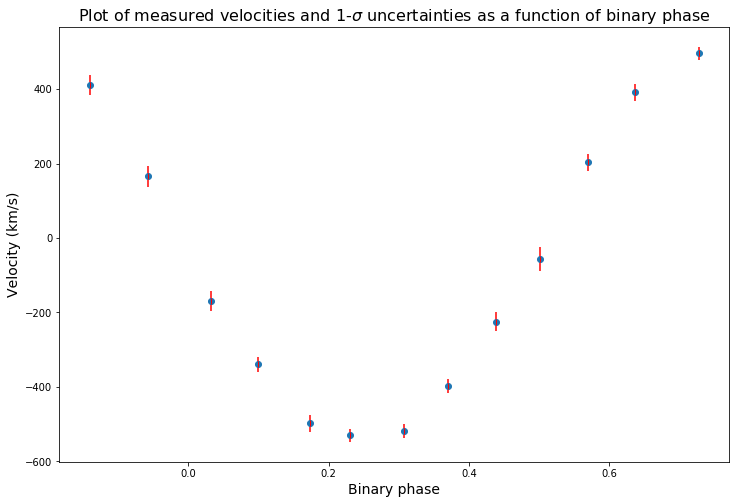

In [37]:
# I MULTIPLIED MY ERRORS BY THREE BECAUSE THEY WERE SO SMALL HERE 
# I HAVEN'T MULTIPLIED THEM BY THREE IN ANY CALCULATION IT WAS PURELY FOR VISUALISATION

plt.plot(bin_phase, vellist, 'o')
plt.errorbar(bin_phase, vellist, yerr = 3*np.array(velsig), color = 'red', fmt = '|')

plt.title('Plot of measured velocities and 1-$\sigma$ uncertainties as a function of binary phase', fontsize = 16)
plt.xlabel('Binary phase', fontsize = 14)
plt.ylabel('Velocity (km/s)', fontsize = 14)
plt.show()

## 7: Fit a sinusoidal velocity curve of the form

$$
V(\phi) = \gamma + K_x  \sin{( 2\,\pi\,\phi)} + K_y 
\cos{(2\,\pi\,\phi)}
$$

## to the 13 velocity measurements. Show the best fit velocity curve on your plot with the data points and error bars. [5]

In [38]:
# Fitting sinusoidal velocity curve by iterated optimal scaling

# Expressions for gamma_hat, Kx_hat and Ky_hat given in the report
# Calculation split into numerator and denominator to make it easier to read

# Initial values of best fit params to start off the iteration
g_hat = 0.
x_hat = 0.
y_hat = 0.

# Appending calculated values to lists bg, bx and by to check convergence
bg = []; bx = []; by = []

for k in range(100):

    numg = 0.; deng = 0.; numx = 0.; denx = 0.; numy = 0.; deny = 0.

    for j in range(len(vellist)):

        numg = numg + (vellist[j] - x_hat*np.sin(2.*np.pi*bin_phase[j]) - y_hat*np.cos(2.*np.pi*bin_phase[j]))/(velsig[j]**2)
        deng = deng + 1./(velsig[j]**2)

        numx = numx + ((vellist[j] - g_hat - y_hat*np.cos(2.*np.pi*bin_phase[j]))*np.sin(2.*np.pi*bin_phase[j]))/(velsig[j]**2)
        denx = denx + (np.sin(2.*np.pi*bin_phase[j])**2)/(velsig[j]**2)

        numy = numy + ((vellist[j] - g_hat - x_hat*np.sin(2.*np.pi*bin_phase[j]))*np.cos(2.*np.pi*bin_phase[j]))/(velsig[j]**2)
        deny = deny + (np.cos(2.*np.pi*bin_phase[j])**2)/(velsig[j]**2)

    bg.append(numg/deng)
    bx.append(numx/denx)
    by.append(numy/deny)
    
    # Making sure it gets at least 12 steps into the data (no particular reason for this)
    if (len(bg) < 12):
        
        g_hat = numg/deng
        x_hat = numx/denx
        y_hat = numy/deny

    else:  
        # Condition for convergence: if the number is the same as it was ten back in the list, it converges!
        # Not particularly efficient, but effective regardless for this small no. of iterations
        if (bg[-10]/g_hat > 0.99998) and (bx[-10]/x_hat > 0.99998) and (by[-10]/y_hat > 0.99998):

            print('Best fit params g, x and y = ', numg/deng, numx/denx, numy/deny)
            g_hat = numg/deng
            x_hat = numx/denx
            y_hat = numy/deny

            g_var = 1./deng
            x_var = 1./denx
            y_var = 1./deny
            print('Best fit params variance var(g), var(x) and var(y) = ', g_var, x_var, y_var)
            print('Best fit params 1-sig errors std(g), std(x) and std(y) = ', np.sqrt(g_var), np.sqrt(x_var), np.sqrt(y_var))


            break

        else:
            g_hat = numg/deng
            x_hat = numx/denx
            y_hat = numy/deny


Best fit params g, x and y =  -22.98542622257217 -527.7634659997555 -3.6051111814244097
Best fit params variance var(g), var(x) and var(y) =  4.081323692751315 7.167595519478561 9.478516169694256
Best fit params 1-sig errors std(g), std(x) and std(y) =  2.020228623881791 2.677236545297886 3.078719891398738


In [39]:
# Defining a function V(phi) to easily plot the best fit curve over the data

# Inputs

def velocity(phi, gamma, xhat, yhat):
    vphi = gamma + xhat*np.sin(2.*np.pi*phi) + yhat*np.cos(2.*np.pi*phi)
    return vphi

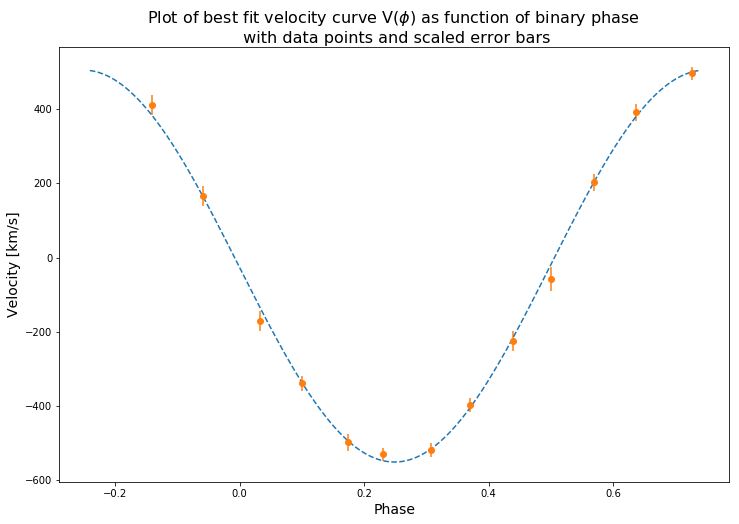

In [40]:
vellist_best = []

# List of phases with small step size to get nice curve fit plot
bplist = np.arange(bin_phase[0]-0.1, bin_phase[-1]+0.01, 1/1000)

# Applying function above to bplist
for bp in bplist:
    vellist_best.append(velocity(bp, g_hat, x_hat, y_hat))

plt.plot(bplist, vellist_best, '--')
#plt.plot(bin_phase, vellist, 'o')
plt.title('Plot of best fit velocity curve V($\phi$) as function of binary phase \n with data points and scaled error bars', fontsize = 16)
plt.xlabel('Phase', fontsize = 14)
plt.ylabel('Velocity [km/s]', fontsize = 14)

plt.errorbar(bin_phase, vellist, yerr = 3*np.array(velsig), fmt = 'o')
plt.show()

## ONCE AGAIN, ERROR BARS MULTIPLIED BY THREE PURELY FOR AESTHETICS

## 8: From your results, estimate the radial velocity semi-amplitude,
$$	K = \left( {K_x}^2 + {K_y}^2 \right)^{1/2}
$$
## 	and its 1-$\sigma$ uncertainty. This is the orbit velocity of the companion star, projected by a factor $\sin{\left(i\right)}$ due to the inclination of  the orbit. Describe your algorithm clearly and without unambiguity. [10]

In [41]:
# Estimating the radial velocity semi-amplitude

K = np.sqrt(x_hat**2 + y_hat**2)

kxsig = np.sqrt(x_var); kysig = np.sqrt(y_var)

# See report for equation used to determine 1-sigma error
Ksig = np.sqrt(np.square(1/np.sqrt(x_hat**2 + y_hat **2))*np.square((x_hat*kxsig)+(kysig*y_hat)))

print('Radial velocity semi-amplitude K =', '% .4f' % K, '+-', '% .4f' % Ksig, 'km/s')

Radial velocity semi-amplitude K =  527.7758 +-  2.6982 km/s


## 9: Give two expressions for the compact object mass function $f(M_x)$, the first in terms of the observable quantities $P$ and $K$, and the second in terms of the compact object mass $M_x$, the inclination $i$, and the mass ratio $q=M_c/M_x$, where $M_c$ isthe companion star mass.
## From the binary period $P$ and your measured $K$ velocity, estimate $f(M_x)$ in solar units. Give also the 1-sigma uncertainty. [5]

------------
$ 
F_X = \frac{K^3\, P}{2 \pi\, G}
$


$
F_X = \frac{M_X\, (\sin{i})^3}{(1+q)^2} 
$


Binary period P = 0.3440915 days

------------

In [47]:
p = 0.3440915*sec   # seconds
psig = 9e-7*sec     # seconds (from paper)

Fx = (p*(K*1000.)**3)/(2*np.pi*G)

# Only uncertainty in Fx comes from K

# df = 3*(Ksig/K)*Fx

df = (3*(Ksig/K)*Fx)

Fx_sol = Fx/msol
df_sol = df/msol
print('F(Mx) =', '% .4f' % Fx_sol, '+-','% .4f' % df_sol, 'Msol')

F(Mx) =  5.2670 +-  0.0808 Msol


10: Adopt a specific inclination $i=90^\circ$,
and a specific $M_c=0.5~M_\odot$.
For these choices, calculate the compact
object mass $M_x$. Give the 1-$\sigma$ uncertainty, assuming that 
$i$ and $M_c$ are known exactly.
Be clear about your algorithm for estimating the uncertainties,
and collect your results in a table in your report. [5]

In [48]:
Mc = 0.5    # Msol
sini = 1.   # i = 90 degrees

In [49]:
# Reusing some code from HW2, Q3 (If it ain't broke... !)

# Now need to generate an expression for Mx
# Based on the 2nd equation above for Mx, there's no analytic solution for Mx
# Have an Mx on both sides!
# Need to iterate until solutions converge

# An initial guess for a value of Mx
Mx_init = 0.5*msol

# Define a (convergence indicator, when Mx_init = Mx, a = 1.)
a = 0.

# i counts the number of steps Mx converges in 
i = 0

while(a != 1.0):

    Mx = Fx*(1 + (Mc*msol)/Mx_init)**2
    a = Mx_init/Mx
    Mx_init = Mx
    i = i+1

Mx_sol = Mx/msol
print('Mx converges to', Mx_sol, 'Msol in', i-1, 'steps')

Mx converges to 6.157182590867126 Msol in 21 steps


In [50]:
# Rel. uncertainty in Mx = rel. uncertainty in Fx

dmx = (Mx/msol)*(df_sol/Fx_sol)
print(dmx)

print('Mx (Q10) =', '% .4f' % Mx_sol, '+-', '% .4f' % dmx, 'Msol')

0.09443405277897428
Mx (Q10) =  6.1572 +-  0.0944 Msol


11: In fact $i$ and $M_c$ are not known, but have some limited range.
What range of $i$ and $M_c$ would be appropriate, given what
you know about the spectral type of the donor star, and
considering that no eclipses occur?

Use Monte-Carlo error propogation to sample the range of uncertainty
in $i$, $M_c$, $K$, and $P$.  Be careful to assume a distribution 
for $i$ that corresponds to a random orbit orientation.

For each Monte-Carlo trial, calculate
the corresponding $M_x$.  Make plots showing the resulting
probability distribution for $M_x$, both as a probability density
histogram, and as a cumulative probability function.

Draw vertical lines on the plots to indicate
the mean and median of the $M_x$ distribution,
and a 1-sigma confidence interval for $M_x$.
As always, be clear in describing your algorithms.

Collect your results in a table in your report. [15]

In [46]:
# Never got around to speeding up this cell, I'm sorry!

# Absence of eclipses: 50 < i < 80
# Companion (most likely) K-type main sequence:
# Probably K5, 0.7Msol, could be K3 - K7 so plus minus 0.1 Msol?

# Sample orientation of orbit:

n = 100000

# i between 50 degrees and 80 degrees

imin = 50.*(2.*np.pi)/360.   #radians
imax = 80.*(2.*np.pi)/360.   #radians

# Values for cos(imin) and cos(imax) to use as limits
cosi_min = np.cos(imin)
cosi_max = np.cos(imax)

# Generate values of cosi from uniform distribution
# Append thes to list cosi_list

cosi_list = []

for i in range(0,n):
    cosi_list.append(RANU(cosi_max, cosi_min, None))
    print(i/n*100)    # print percent to keep track of progress

cosi_list = np.array(cosi_list)

# Need to obtain values for sin(i)
# sin(i) = sqrt(1 - cos^2(i))
sini_list = np.sqrt(1. - np.square(cosi_list))

0.0
0.001
0.002
0.003
0.004
0.005
0.006
0.006999999999999999
0.008
0.009000000000000001
0.01
0.011000000000000001
0.012
0.013
0.013999999999999999
0.015
0.016
0.017
0.018000000000000002
0.019
0.02
0.021
0.022000000000000002
0.023
0.024
0.025
0.026
0.027
0.027999999999999997
0.029
0.03
0.031
0.032
0.033
0.034
0.034999999999999996
0.036000000000000004
0.037
0.038
0.039
0.04
0.041
0.042
0.043
0.044000000000000004
0.045
0.046
0.047
0.048
0.049
0.05
0.051000000000000004
0.052
0.053
0.054
0.055
0.055999999999999994
0.056999999999999995
0.058
0.059000000000000004
0.06
0.061
0.062
0.063
0.064
0.065
0.066
0.067
0.068
0.06899999999999999
0.06999999999999999
0.07100000000000001
0.07200000000000001
0.073
0.074
0.075
0.076
0.077
0.078
0.079
0.08
0.08099999999999999
0.082
0.083
0.084
0.08499999999999999
0.086
0.087
0.08800000000000001
0.089
0.09
0.091
0.092
0.093
0.094
0.095
0.096
0.097
0.098
0.099
0.1
0.101
0.10200000000000001
0.10300000000000001
0.104
0.105
0.106
0.107
0.108
0.109
0.11
0.111000000

0.886
0.8869999999999999
0.8880000000000001
0.889
0.89
0.8909999999999999
0.8920000000000001
0.893
0.894
0.895
0.8959999999999999
0.897
0.898
0.899
0.8999999999999999
0.901
0.902
0.903
0.9039999999999999
0.905
0.906
0.907
0.9079999999999999
0.909
0.91
0.911
0.9119999999999999
0.9129999999999999
0.914
0.915
0.9159999999999999
0.9169999999999999
0.918
0.919
0.9199999999999999
0.9209999999999999
0.922
0.923
0.924
0.9249999999999999
0.9259999999999999
0.927
0.928
0.9289999999999999
0.9299999999999999
0.931
0.932
0.9329999999999999
0.9339999999999999
0.935
0.936
0.9369999999999999
0.938
0.9390000000000001
0.9400000000000001
0.941
0.942
0.943
0.9440000000000001
0.9450000000000001
0.946
0.947
0.9480000000000001
0.9490000000000001
0.95
0.951
0.9520000000000001
0.9530000000000001
0.954
0.955
0.9560000000000001
0.9570000000000001
0.958
0.959
0.96
0.9610000000000001
0.962
0.963
0.964
0.9650000000000001
0.966
0.967
0.968
0.9690000000000001
0.97
0.971
0.972
0.9730000000000001
0.9740000000000001
0.9

1.822
1.823
1.8239999999999998
1.825
1.8259999999999998
1.8270000000000002
1.828
1.8290000000000002
1.83
1.831
1.8319999999999999
1.833
1.8339999999999999
1.8350000000000002
1.836
1.8370000000000002
1.838
1.839
1.8399999999999999
1.841
1.8419999999999999
1.8429999999999997
1.844
1.8450000000000002
1.846
1.847
1.848
1.849
1.8499999999999999
1.851
1.8519999999999999
1.8530000000000002
1.854
1.855
1.856
1.857
1.8579999999999999
1.859
1.8599999999999999
1.8610000000000002
1.862
1.863
1.864
1.865
1.8659999999999999
1.867
1.8679999999999999
1.8689999999999998
1.87
1.871
1.872
1.873
1.8739999999999999
1.875
1.876
1.8769999999999998
1.8780000000000001
1.879
1.8800000000000001
1.881
1.882
1.883
1.884
1.8849999999999998
1.886
1.8870000000000002
1.8880000000000001
1.889
1.8900000000000001
1.891
1.892
1.8929999999999998
1.894
1.8950000000000002
1.8960000000000001
1.897
1.8980000000000001
1.899
1.9
1.9009999999999998
1.902
1.9029999999999998
1.9040000000000001
1.905
1.9060000000000001
1.907
1.908
1

2.8240000000000003
2.825
2.826
2.827
2.828
2.8289999999999997
2.83
2.831
2.8320000000000003
2.833
2.834
2.835
2.836
2.8369999999999997
2.838
2.839
2.8400000000000003
2.841
2.842
2.843
2.844
2.8449999999999998
2.846
2.847
2.848
2.849
2.85
2.851
2.852
2.8529999999999998
2.854
2.855
2.856
2.857
2.858
2.859
2.86
2.861
2.862
2.863
2.864
2.8649999999999998
2.866
2.867
2.868
2.869
2.87
2.871
2.872
2.8729999999999998
2.874
2.875
2.876
2.8770000000000002
2.878
2.879
2.88
2.881
2.8819999999999997
2.883
2.884
2.8850000000000002
2.886
2.887
2.888
2.889
2.8899999999999997
2.891
2.8920000000000003
2.8930000000000002
2.894
2.895
2.896
2.897
2.8979999999999997
2.899
2.9000000000000004
2.9010000000000002
2.902
2.903
2.904
2.905
2.9059999999999997
2.907
2.9080000000000004
2.9090000000000003
2.91
2.911
2.912
2.913
2.9139999999999997
2.915
2.916
2.9170000000000003
2.918
2.919
2.92
2.921
2.922
2.923
2.924
2.9250000000000003
2.926
2.927
2.928
2.929
2.93
2.931
2.932
2.933
2.934
2.935
2.936
2.937
2.938
2.939


3.7130000000000005
3.714
3.7150000000000003
3.7159999999999997
3.717
3.718
3.7190000000000003
3.7199999999999998
3.721
3.7220000000000004
3.723
3.724
3.7249999999999996
3.726
3.727
3.728
3.7289999999999996
3.73
3.7310000000000003
3.7319999999999998
3.733
3.734
3.7350000000000003
3.7359999999999998
3.737
3.7379999999999995
3.739
3.74
3.7409999999999997
3.742
3.743
3.744
3.7449999999999997
3.746
3.7470000000000003
3.7479999999999998
3.749
3.75
3.7510000000000003
3.752
3.753
3.7539999999999996
3.755
3.7560000000000002
3.757
3.758
3.759
3.7600000000000002
3.7609999999999997
3.762
3.763
3.764
3.765
3.766
3.7670000000000003
3.768
3.769
3.7699999999999996
3.771
3.772
3.773
3.7740000000000005
3.775
3.7760000000000002
3.7769999999999997
3.778
3.779
3.7800000000000002
3.781
3.782
3.7830000000000004
3.784
3.785
3.7859999999999996
3.787
3.788
3.789
3.7900000000000005
3.791
3.7920000000000003
3.7929999999999997
3.794
3.795
3.7960000000000003
3.7969999999999997
3.798
3.7990000000000004
3.8
3.801
3.8

4.693
4.694
4.695
4.696
4.697
4.698
4.699
4.7
4.7010000000000005
4.702
4.703
4.704
4.705
4.7059999999999995
4.707
4.707999999999999
4.709
4.71
4.711
4.712000000000001
4.713
4.714
4.715
4.716
4.717
4.718
4.719
4.72
4.721
4.7219999999999995
4.723
4.723999999999999
4.725
4.726
4.727
4.728000000000001
4.729
4.73
4.731
4.732
4.733
4.734
4.735
4.736
4.737
4.7379999999999995
4.739
4.74
4.741
4.742
4.743
4.744000000000001
4.745
4.746
4.747
4.748
4.749
4.75
4.7509999999999994
4.752
4.753
4.754
4.755
4.756
4.757
4.758
4.759
4.760000000000001
4.761
4.7620000000000005
4.763
4.764
4.765
4.766
4.7669999999999995
4.768
4.769
4.77
4.771
4.772
4.773000000000001
4.774
4.775
4.776
4.777
4.7780000000000005
4.779
4.78
4.781
4.782
4.7829999999999995
4.784
4.784999999999999
4.786
4.787
4.788
4.789000000000001
4.79
4.791
4.792
4.793
4.7940000000000005
4.795
4.796
4.797
4.798
4.7989999999999995
4.8
4.801
4.802
4.803
4.804
4.805000000000001
4.806
4.807
4.808
4.809
4.81
4.811
4.812
4.813
4.814
4.8149999999999995

5.7410000000000005
5.742
5.743
5.744
5.745
5.7459999999999996
5.747
5.748
5.749
5.75
5.7509999999999994
5.752
5.753
5.7540000000000004
5.755
5.756
5.757000000000001
5.758
5.759
5.76
5.761
5.762
5.763
5.763999999999999
5.765
5.766
5.7669999999999995
5.768
5.769
5.7700000000000005
5.771
5.772
5.773
5.774
5.775
5.776
5.777
5.778
5.779
5.779999999999999
5.781
5.782
5.783
5.784000000000001
5.785
5.7860000000000005
5.787
5.788
5.789
5.79
5.791
5.792
5.793
5.794
5.795
5.795999999999999
5.797
5.798
5.799
5.800000000000001
5.801
5.8020000000000005
5.803
5.804
5.805
5.806
5.8069999999999995
5.808
5.809
5.81
5.811
5.811999999999999
5.813
5.814
5.815
5.816000000000001
5.817
5.8180000000000005
5.819
5.82
5.821
5.822
5.8229999999999995
5.824
5.825
5.826
5.827
5.827999999999999
5.829
5.83
5.831
5.832
5.833
5.8340000000000005
5.835
5.836
5.837
5.838
5.8389999999999995
5.84
5.840999999999999
5.842
5.843
5.844
5.845000000000001
5.846
5.847
5.848
5.849
5.8500000000000005
5.851
5.852
5.853
5.854
5.8549999

6.729
6.7299999999999995
6.731
6.732
6.7330000000000005
6.734
6.734999999999999
6.736000000000001
6.737
6.7379999999999995
6.739000000000001
6.74
6.741
6.741999999999999
6.743
6.744
6.744999999999999
6.746
6.747
6.748
6.749
6.75
6.751
6.752
6.753000000000001
6.7540000000000004
6.755
6.755999999999999
6.757000000000001
6.758
6.7589999999999995
6.76
6.761
6.762
6.763
6.764
6.765000000000001
6.766
6.7669999999999995
6.768000000000001
6.769
6.77
6.771000000000001
6.772
6.773
6.773999999999999
6.775
6.776
6.776999999999999
6.7780000000000005
6.779
6.78
6.781
6.782000000000001
6.783
6.784
6.784999999999999
6.7860000000000005
6.787
6.787999999999999
6.789000000000001
6.79
6.7909999999999995
6.792
6.793
6.7940000000000005
6.795
6.796
6.797000000000001
6.798
6.7989999999999995
6.800000000000001
6.801
6.802
6.802999999999999
6.804
6.805
6.805999999999999
6.807
6.808
6.809
6.81
6.811
6.812
6.813
6.814000000000001
6.815
6.816
6.816999999999999
6.8180000000000005
6.819
6.819999999999999
6.821000000

7.635
7.636
7.637
7.638
7.639
7.64
7.641000000000001
7.642
7.643
7.643999999999999
7.6450000000000005
7.646
7.646999999999999
7.648000000000001
7.649
7.6499999999999995
7.651
7.652
7.6530000000000005
7.654
7.655000000000001
7.656000000000001
7.657
7.6579999999999995
7.659000000000001
7.66
7.661
7.661999999999999
7.663
7.664
7.664999999999999
7.666
7.667
7.668
7.669
7.670000000000001
7.671
7.672
7.673000000000001
7.674
7.675
7.675999999999999
7.6770000000000005
7.678
7.678999999999999
7.68
7.681
7.682
7.683
7.684
7.6850000000000005
7.686
7.686999999999999
7.688000000000001
7.689
7.6899999999999995
7.691000000000001
7.692
7.693
7.693999999999999
7.695
7.696
7.697
7.698
7.699
7.7
7.701
7.702000000000001
7.703
7.704
7.704999999999999
7.706
7.707
7.707999999999999
7.7090000000000005
7.71
7.710999999999999
7.712
7.713
7.714
7.715
7.716000000000001
7.7170000000000005
7.718
7.718999999999999
7.720000000000001
7.721
7.7219999999999995
7.722999999999999
7.724
7.725
7.725999999999999
7.727
7.728


8.527999999999999
8.529
8.53
8.530999999999999
8.532
8.533
8.534
8.535
8.536000000000001
8.537
8.538
8.539
8.540000000000001
8.541
8.542
8.543000000000001
8.544
8.545
8.546
8.547
8.548
8.549
8.55
8.551
8.552
8.552999999999999
8.554
8.555
8.556
8.556999999999999
8.558
8.559
8.559999999999999
8.561
8.562
8.563
8.564
8.565000000000001
8.566
8.567
8.568000000000001
8.569
8.57
8.571
8.572000000000001
8.573
8.574
8.575000000000001
8.576
8.577
8.578
8.579
8.58
8.581
8.581999999999999
8.583
8.584
8.584999999999999
8.586
8.587
8.588
8.588999999999999
8.59
8.591
8.591999999999999
8.593
8.594
8.595
8.596
8.597000000000001
8.598
8.599
8.6
8.601
8.602
8.603
8.604000000000001
8.605
8.606
8.607
8.608
8.609
8.61
8.611
8.612
8.613
8.613999999999999
8.615
8.616
8.616999999999999
8.618
8.619
8.62
8.620999999999999
8.622
8.623
8.624
8.625
8.626000000000001
8.627
8.628
8.629000000000001
8.63
8.631
8.632
8.633000000000001
8.634
8.635
8.636000000000001
8.637
8.638
8.639
8.64
8.641
8.642
8.643
8.644
8.645
8.6

9.62
9.621
9.622
9.623
9.624
9.625
9.626
9.626999999999999
9.628
9.629
9.629999999999999
9.631
9.632
9.633
9.634
9.635
9.636
9.637
9.638
9.639000000000001
9.64
9.641
9.642000000000001
9.643
9.644
9.645
9.646
9.647
9.648
9.649000000000001
9.65
9.651
9.652
9.653
9.654
9.655
9.656
9.657
9.658
9.658999999999999
9.66
9.661
9.661999999999999
9.663
9.664
9.665
9.666
9.667
9.668000000000001
9.669
9.67
9.671000000000001
9.672
9.673
9.674000000000001
9.675
9.676
9.677
9.678
9.679
9.68
9.681
9.682
9.683
9.684
9.685
9.686
9.687
9.687999999999999
9.689
9.69
9.690999999999999
9.692
9.693
9.693999999999999
9.695
9.696
9.697
9.698
9.699
9.700000000000001
9.701
9.702
9.703000000000001
9.704
9.705
9.706
9.707
9.708
9.709
9.71
9.711
9.712
9.713
9.714
9.715
9.716
9.717
9.718
9.719
9.719999999999999
9.721
9.722
9.722999999999999
9.724
9.725
9.725999999999999
9.727
9.728
9.729000000000001
9.73
9.731
9.732000000000001
9.733
9.734
9.735000000000001
9.736
9.737
9.738
9.739
9.74
9.741
9.742
9.743
9.744
9.745
9.

10.54
10.541
10.542
10.543
10.544
10.545
10.546
10.546999999999999
10.548
10.549
10.549999999999999
10.551
10.552
10.552999999999999
10.554
10.555
10.556000000000001
10.557
10.558
10.559000000000001
10.56
10.561
10.562000000000001
10.563
10.564
10.565
10.566
10.567
10.568
10.569
10.57
10.571
10.572
10.573
10.574
10.575
10.576
10.577
10.578
10.578999999999999
10.58
10.581
10.581999999999999
10.583
10.584
10.585
10.586
10.587
10.588000000000001
10.589
10.59
10.591000000000001
10.592
10.593
10.594000000000001
10.595
10.596
10.597
10.598
10.599
10.6
10.600999999999999
10.602
10.603
10.604
10.605
10.606
10.607
10.607999999999999
10.609
10.61
10.610999999999999
10.612
10.613
10.613999999999999
10.615
10.616
10.617
10.618
10.619
10.620000000000001
10.621
10.622
10.623000000000001
10.624
10.625
10.626
10.627
10.628
10.629
10.63
10.631
10.632
10.633
10.634
10.635
10.636
10.637
10.638
10.639
10.639999999999999
10.641
10.642
10.642999999999999
10.644
10.645
10.646
10.647
10.648
10.649000000000001

11.498999999999999
11.5
11.501
11.501999999999999
11.503
11.504
11.505
11.506
11.507000000000001
11.508000000000001
11.509
11.51
11.511000000000001
11.512
11.513
11.514000000000001
11.515
11.516
11.517
11.518
11.519
11.52
11.521
11.522
11.523
11.524
11.525
11.526
11.527
11.527999999999999
11.529
11.53
11.530999999999999
11.532
11.533
11.533999999999999
11.535
11.536
11.537
11.538
11.539000000000001
11.540000000000001
11.541
11.542
11.543000000000001
11.544
11.545
11.546
11.547
11.548
11.549
11.55
11.551
11.552
11.552999999999999
11.554
11.555
11.556
11.557
11.558
11.559
11.559999999999999
11.561
11.562
11.562999999999999
11.564
11.565
11.566
11.567
11.568000000000001
11.569
11.57
11.571
11.572000000000001
11.573
11.574
11.575000000000001
11.576
11.577
11.578
11.579
11.58
11.581
11.582
11.583
11.584
11.584999999999999
11.586
11.587
11.588
11.589
11.59
11.591
11.591999999999999
11.593
11.594
11.594999999999999
11.596
11.597
11.598
11.599
11.600000000000001
11.601
11.602
11.603
11.6040000

12.379999999999999
12.381
12.382
12.383
12.384
12.385
12.386
12.386999999999999
12.388
12.389
12.389999999999999
12.391
12.392
12.393
12.394
12.395
12.396
12.397
12.398000000000001
12.399000000000001
12.4
12.401
12.402000000000001
12.403
12.404
12.405
12.406
12.407
12.408
12.409
12.41
12.411
12.411999999999999
12.413
12.414
12.415
12.416
12.417
12.418
12.418999999999999
12.42
12.421
12.422
12.423
12.424
12.425
12.426
12.427000000000001
12.428
12.429
12.43
12.431000000000001
12.432
12.433
12.434000000000001
12.435
12.436
12.437
12.438
12.439
12.44
12.441
12.442
12.443
12.443999999999999
12.445
12.446
12.447
12.447999999999999
12.449
12.45
12.450999999999999
12.452
12.453
12.454
12.455
12.456
12.457
12.458
12.459000000000001
12.46
12.461
12.462
12.463000000000001
12.464
12.465
12.466000000000001
12.467
12.468
12.469
12.47
12.471
12.472
12.472999999999999
12.474
12.475
12.475999999999999
12.477
12.478
12.479
12.479999999999999
12.481
12.482
12.483
12.484
12.485
12.486
12.487
12.4880000000

13.297999999999998
13.299
13.3
13.300999999999998
13.302
13.303
13.303999999999998
13.305
13.306000000000001
13.306999999999999
13.308
13.309000000000001
13.309999999999999
13.311
13.312
13.313
13.314
13.315
13.316
13.317
13.318
13.319
13.320000000000002
13.321
13.322000000000001
13.322999999999999
13.324
13.325000000000001
13.325999999999999
13.327
13.328000000000001
13.328999999999999
13.33
13.331000000000001
13.331999999999999
13.333
13.333999999999998
13.334999999999999
13.336
13.337
13.338
13.339
13.34
13.341
13.342
13.343
13.344000000000001
13.345
13.346
13.347000000000001
13.347999999999999
13.349
13.350000000000001
13.350999999999999
13.352
13.353000000000002
13.354
13.355
13.356000000000002
13.357
13.358
13.358999999999998
13.36
13.361
13.361999999999998
13.363
13.364
13.364999999999998
13.366
13.367
13.367999999999999
13.369
13.370000000000001
13.370999999999999
13.372
13.373
13.374
13.375
13.376
13.377
13.378
13.379
13.38
13.381000000000002
13.382
13.383000000000001
13.38399

14.143
14.144000000000002
14.145
14.146
14.147000000000002
14.148
14.149000000000001
14.149999999999999
14.151
14.152000000000001
14.152999999999999
14.154
14.155000000000001
14.155999999999999
14.157
14.158000000000001
14.158999999999999
14.16
14.161000000000001
14.161999999999999
14.163
14.163999999999998
14.165
14.166
14.167
14.168
14.169
14.17
14.171
14.172
14.173
14.174000000000001
14.174999999999999
14.176
14.177000000000001
14.177999999999999
14.179
14.180000000000001
14.181
14.182
14.183000000000002
14.184
14.185
14.186000000000002
14.187
14.188
14.188999999999998
14.19
14.191
14.191999999999998
14.193
14.194
14.194999999999999
14.196
14.197000000000001
14.198
14.199
14.2
14.201
14.202
14.203
14.204
14.205000000000002
14.206
14.207
14.208000000000002
14.209
14.21
14.210999999999999
14.212
14.213000000000001
14.213999999999999
14.215
14.216000000000001
14.216999999999999
14.218
14.219000000000001
14.219999999999999
14.221
14.222000000000001
14.222999999999999
14.224
14.224999999

14.954999999999998
14.956
14.957
14.957999999999998
14.959
14.96
14.960999999999999
14.962
14.963000000000001
14.963999999999999
14.965
14.966
14.967
14.968
14.969
14.97
14.971
14.972
14.973
14.974000000000002
14.975
14.976
14.976999999999999
14.978
14.979000000000001
14.979999999999999
14.981
14.982000000000001
14.982999999999999
14.984
14.985000000000001
14.985999999999999
14.987
14.988000000000001
14.988999999999999
14.99
14.991
14.991999999999999
14.993
14.994
14.995
14.996
14.997
14.998000000000001
14.999
15.0
15.001000000000001
15.001999999999999
15.003
15.004000000000001
15.004999999999999
15.006
15.007000000000001
15.008
15.009
15.010000000000002
15.011
15.012
15.013000000000002
15.014
15.015
15.015999999999998
15.017
15.018
15.018999999999998
15.02
15.021
15.021999999999998
15.023
15.024000000000001
15.024999999999999
15.026
15.027
15.028
15.029
15.03
15.031
15.032
15.033
15.034
15.035000000000002
15.036
15.037
15.038000000000002
15.039
15.040000000000001
15.040999999999999
15

15.733
15.734
15.735
15.736
15.737000000000002
15.738
15.739
15.740000000000002
15.741
15.742
15.742999999999999
15.744
15.745000000000001
15.745999999999999
15.747
15.748000000000001
15.748999999999999
15.75
15.751000000000001
15.751999999999999
15.753
15.754000000000001
15.754999999999999
15.756
15.756999999999998
15.758
15.759
15.76
15.761
15.762
15.763
15.764
15.765
15.766
15.767000000000001
15.767999999999999
15.769
15.770000000000001
15.770999999999999
15.772
15.773000000000001
15.774
15.775
15.776000000000002
15.777
15.778
15.779000000000002
15.78
15.781
15.781999999999998
15.783
15.784
15.784999999999998
15.786
15.787
15.787999999999998
15.789
15.790000000000001
15.791
15.792
15.793
15.794
15.795
15.796
15.797
15.798000000000002
15.799
15.8
15.801000000000002
15.802
15.803
15.804000000000002
15.805
15.806000000000001
15.806999999999999
15.808
15.809000000000001
15.809999999999999
15.811
15.812000000000001
15.812999999999999
15.814
15.815000000000001
15.815999999999999
15.817
15

16.824
16.825000000000003
16.826
16.827
16.828000000000003
16.829
16.830000000000002
16.831
16.832
16.833000000000002
16.834
16.835
16.836000000000002
16.837
16.838
16.839000000000002
16.84
16.841
16.842
16.843
16.844
16.845
16.846
16.847
16.848
16.849
16.85
16.851
16.852
16.853
16.854
16.855
16.855999999999998
16.857
16.858
16.858999999999998
16.86
16.861
16.862
16.863
16.864
16.865
16.866
16.866999999999997
16.868
16.869
16.869999999999997
16.871
16.872
16.872999999999998
16.874
16.875
16.875999999999998
16.877
16.878
16.878999999999998
16.88
16.881
16.882
16.883
16.884
16.885
16.886000000000003
16.887
16.888
16.889000000000003
16.89
16.891000000000002
16.892
16.893
16.894000000000002
16.895
16.896
16.897000000000002
16.898
16.899
16.900000000000002
16.901
16.902
16.903000000000002
16.904
16.905
16.906
16.907
16.908
16.909
16.91
16.911
16.912
16.913
16.914
16.915
16.916
16.916999999999998
16.918
16.919
16.919999999999998
16.921
16.922
16.923
16.924
16.925
16.926
16.927
16.928
16.929


17.839
17.84
17.841
17.842
17.843
17.843999999999998
17.845
17.846
17.846999999999998
17.848
17.849
17.849999999999998
17.851
17.852
17.852999999999998
17.854
17.854999999999997
17.855999999999998
17.857
17.858
17.858999999999998
17.86
17.861
17.862000000000002
17.863
17.864
17.865000000000002
17.866
17.867
17.868000000000002
17.869
17.87
17.871000000000002
17.872
17.873
17.874000000000002
17.875
17.876
17.877000000000002
17.878
17.879
17.88
17.881
17.882
17.883
17.884
17.885
17.886
17.887
17.888
17.889
17.89
17.891000000000002
17.892
17.893
17.894
17.895
17.896
17.897
17.898
17.899
17.9
17.901
17.902
17.903
17.904
17.904999999999998
17.906
17.907
17.907999999999998
17.909
17.91
17.910999999999998
17.912
17.913
17.913999999999998
17.915
17.916
17.916999999999998
17.918
17.919
17.919999999999998
17.921
17.922
17.923000000000002
17.924
17.925
17.926000000000002
17.927
17.928
17.929000000000002
17.93
17.931
17.932000000000002
17.933
17.934
17.935000000000002
17.936
17.937
17.9380000000000

18.938
18.939
18.94
18.941
18.942
18.942999999999998
18.944
18.945
18.945999999999998
18.947
18.948
18.948999999999998
18.95
18.951
18.951999999999998
18.953
18.953999999999997
18.955
18.956
18.956999999999997
18.958
18.959
18.96
18.961
18.962
18.963
18.964
18.965
18.966
18.967
18.968
18.969
18.970000000000002
18.971
18.972
18.973000000000003
18.974
18.975
18.976000000000003
18.977
18.978
18.979
18.98
18.981
18.982
18.983
18.984
18.985
18.986
18.987000000000002
18.988
18.989
18.990000000000002
18.991
18.992
18.993
18.994
18.995
18.996
18.997
18.998
18.999
19.0
19.001
19.002
19.003
19.003999999999998
19.005
19.006
19.006999999999998
19.008
19.009
19.009999999999998
19.011
19.012
19.012999999999998
19.014
19.015
19.016
19.017
19.017999999999997
19.019
19.02
19.021
19.022
19.023
19.024
19.025
19.026
19.027
19.028
19.029
19.03
19.031000000000002
19.032
19.033
19.034000000000002
19.035
19.036
19.037000000000003
19.038
19.039
19.040000000000003
19.041
19.042
19.043
19.044
19.045
19.046
19.04

19.868
19.869
19.869999999999997
19.871
19.872
19.872999999999998
19.874
19.875
19.875999999999998
19.877
19.878
19.878999999999998
19.88
19.881
19.881999999999998
19.883
19.884
19.885
19.886
19.887
19.888
19.889000000000003
19.89
19.891000000000002
19.892000000000003
19.893
19.894000000000002
19.895
19.896
19.897000000000002
19.898
19.899
19.900000000000002
19.901
19.902
19.903000000000002
19.904
19.905
19.906
19.907
19.908
19.909
19.91
19.911
19.912
19.913
19.914
19.915
19.916
19.917
19.918
19.919
19.919999999999998
19.921
19.922
19.923
19.924
19.925
19.926
19.927
19.928
19.929
19.93
19.930999999999997
19.932
19.933
19.933999999999997
19.935
19.936
19.936999999999998
19.938
19.939
19.939999999999998
19.941
19.942
19.942999999999998
19.944
19.945
19.946
19.947
19.948
19.949
19.950000000000003
19.951
19.952
19.953000000000003
19.954
19.955000000000002
19.956
19.957
19.958000000000002
19.959
19.96
19.961000000000002
19.962
19.963
19.964000000000002
19.965
19.966
19.967
19.968
19.969
19.

20.86
20.861
20.862
20.863
20.864
20.865000000000002
20.866
20.867
20.868000000000002
20.869
20.87
20.871000000000002
20.872
20.873
20.874000000000002
20.875
20.876
20.877000000000002
20.878
20.879
20.880000000000003
20.881
20.882
20.883
20.884
20.885
20.886
20.887
20.888
20.889
20.89
20.891000000000002
20.892
20.893
20.894
20.895
20.896
20.897
20.898
20.899
20.9
20.901
20.902
20.903
20.904
20.905
20.906
20.907
20.907999999999998
20.909
20.91
20.910999999999998
20.912
20.913
20.913999999999998
20.915
20.916
20.916999999999998
20.918
20.918999999999997
20.919999999999998
20.921
20.922
20.923
20.924
20.925
20.926000000000002
20.927
20.928
20.929000000000002
20.93
20.931
20.932000000000002
20.933
20.934
20.935000000000002
20.936
20.937
20.938000000000002
20.939
20.94
20.941000000000003
20.942
20.943
20.944
20.945
20.946
20.947
20.948
20.949
20.95
20.951
20.952
20.953
20.954
20.955
20.956
20.957
20.958
20.959
20.96
20.961
20.962
20.963
20.964
20.965
20.966
20.967
20.968
20.968999999999998


21.809
21.81
21.811
21.812
21.813
21.814
21.815
21.816
21.817
21.818
21.819
21.82
21.820999999999998
21.822
21.823
21.823999999999998
21.825
21.826
21.826999999999998
21.828
21.829
21.83
21.831
21.831999999999997
21.833
21.834
21.834999999999997
21.836
21.837
21.837999999999997
21.839
21.84
21.841
21.842
21.843
21.844
21.845
21.846
21.847
21.848
21.849
21.85
21.851000000000003
21.852
21.853
21.854000000000003
21.855
21.856
21.857
21.858
21.859
21.86
21.861
21.862000000000002
21.863
21.864
21.865000000000002
21.866
21.867
21.868000000000002
21.869
21.87
21.871
21.872
21.873
21.874
21.875
21.876
21.877
21.878
21.879
21.88
21.881
21.881999999999998
21.883
21.884
21.884999999999998
21.886
21.887
21.887999999999998
21.889
21.89
21.891
21.892
21.893
21.894
21.895
21.895999999999997
21.897
21.898
21.898999999999997
21.9
21.901
21.902
21.903
21.904
21.905
21.906
21.907
21.908
21.909
21.91
21.911
21.912000000000003
21.913
21.914
21.915000000000003
21.916
21.917
21.918000000000003
21.919
21.92
2

22.918
22.919
22.919999999999998
22.921
22.922
22.923
22.924
22.925
22.926
22.927
22.928
22.929
22.93
22.931
22.932
22.933
22.933999999999997
22.935
22.936
22.936999999999998
22.938
22.939
22.939999999999998
22.941
22.942
22.942999999999998
22.944
22.945
22.945999999999998
22.947
22.948
22.949
22.95
22.951
22.952
22.953000000000003
22.954
22.955000000000002
22.956
22.957
22.958000000000002
22.959
22.96
22.961000000000002
22.962
22.963
22.964000000000002
22.965
22.966
22.967000000000002
22.968
22.969
22.97
22.971
22.972
22.973
22.974
22.975
22.976
22.977
22.978
22.979
22.98
22.980999999999998
22.982
22.983
22.983999999999998
22.985
22.986
22.987
22.988
22.989
22.99
22.991
22.992
22.993
22.994
22.994999999999997
22.996
22.997
22.997999999999998
22.999
23.0
23.000999999999998
23.002
23.003
23.003999999999998
23.005
23.006
23.006999999999998
23.008
23.009
23.01
23.011
23.012
23.013
23.014000000000003
23.015
23.016000000000002
23.017000000000003
23.018
23.019000000000002
23.02
23.021
23.022

23.849
23.849999999999998
23.851
23.852
23.852999999999998
23.854
23.855
23.855999999999998
23.857
23.857999999999997
23.858999999999998
23.86
23.860999999999997
23.862
23.863
23.864
23.865
23.866
23.867
23.868000000000002
23.869
23.87
23.871000000000002
23.872
23.873
23.874000000000002
23.875
23.876
23.877000000000002
23.878
23.879
23.880000000000003
23.881
23.882
23.883
23.884
23.885
23.886
23.887
23.888
23.889
23.89
23.891000000000002
23.892
23.893
23.894000000000002
23.895
23.896
23.897
23.898
23.899
23.9
23.901
23.902
23.903
23.904
23.905
23.906
23.907
23.907999999999998
23.909
23.91
23.910999999999998
23.912
23.913
23.913999999999998
23.915
23.916
23.916999999999998
23.918
23.919
23.919999999999998
23.921
23.921999999999997
23.923
23.924
23.925
23.926
23.927
23.928
23.929000000000002
23.93
23.931
23.932000000000002
23.933
23.934
23.935000000000002
23.936
23.937
23.938000000000002
23.939
23.94
23.941000000000003
23.942
23.943
23.944
23.945
23.946
23.947
23.948
23.949
23.95
23.951


24.908
24.909
24.91
24.911
24.912
24.913
24.914
24.915000000000003
24.916
24.917
24.918000000000003
24.919
24.92
24.921
24.922
24.923000000000002
24.924
24.925
24.926000000000002
24.927
24.928
24.929000000000002
24.93
24.931
24.932000000000002
24.933
24.934
24.935
24.936
24.937
24.938
24.939
24.94
24.941
24.942
24.943
24.944
24.945
24.945999999999998
24.947
24.948
24.948999999999998
24.95
24.951
24.951999999999998
24.953
24.954
24.955
24.956
24.956999999999997
24.958
24.959
24.959999999999997
24.961
24.962
24.962999999999997
24.964
24.965
24.966
24.967
24.968
24.969
24.97
24.971
24.972
24.973
24.974
24.975
24.976000000000003
24.977
24.978
24.979000000000003
24.98
24.981
24.982
24.983
24.984
24.985
24.986
24.987000000000002
24.988
24.989
24.990000000000002
24.991
24.992
24.993000000000002
24.994
24.995
24.996
24.997
24.998
24.999
25.0
25.001
25.002000000000002
25.002999999999997
25.003999999999998
25.005
25.006
25.007
25.008000000000003
25.008999999999997
25.009999999999998
25.011
25.01

25.893
25.894000000000002
25.895000000000003
25.896
25.897
25.898
25.899
25.900000000000002
25.901000000000003
25.901999999999997
25.903
25.904
25.905
25.906000000000002
25.907000000000004
25.907999999999998
25.909
25.91
25.911
25.912000000000003
25.913000000000004
25.913999999999998
25.915
25.916
25.917
25.918000000000003
25.918999999999997
25.919999999999998
25.921
25.922
25.923000000000002
25.924000000000003
25.924999999999997
25.926
25.927
25.928
25.929000000000002
25.929999999999996
25.930999999999997
25.932
25.933
25.934
25.935000000000002
25.935999999999996
25.936999999999998
25.938
25.939
25.94
25.941
25.942
25.942999999999998
25.944
25.945
25.946
25.947
25.948
25.948999999999998
25.95
25.951
25.951999999999998
25.953
25.954
25.955000000000002
25.956000000000003
25.957
25.958
25.959
25.96
25.961000000000002
25.962000000000003
25.963
25.964
25.965
25.966
25.967000000000002
25.968000000000004
25.968999999999998
25.97
25.971
25.972
25.973000000000003
25.974000000000004
25.97499999

26.789
26.790000000000003
26.790999999999997
26.791999999999998
26.793
26.794
26.795
26.796
26.796999999999997
26.798
26.799
26.8
26.801000000000002
26.802
26.802999999999997
26.804
26.805
26.806
26.807
26.808
26.809
26.810000000000002
26.811
26.812
26.813
26.814
26.815
26.816000000000003
26.817
26.817999999999998
26.819
26.82
26.821
26.822000000000003
26.823000000000004
26.823999999999998
26.825
26.826
26.827
26.828000000000003
26.828999999999997
26.83
26.831
26.832
26.833000000000002
26.834000000000003
26.834999999999997
26.836
26.837
26.838
26.839000000000002
26.840000000000003
26.840999999999998
26.842
26.843
26.844
26.845000000000002
26.845999999999997
26.846999999999998
26.848
26.849
26.85
26.851000000000003
26.851999999999997
26.852999999999998
26.854
26.855
26.856
26.857
26.857999999999997
26.858999999999998
26.86
26.861
26.862000000000002
26.863
26.863999999999997
26.865
26.866
26.867
26.868
26.869
26.87
26.871000000000002
26.872
26.873
26.874
26.875
26.876
26.877000000000002


27.544
27.544999999999998
27.546
27.547
27.548000000000002
27.549
27.55
27.551
27.552
27.553
27.554000000000002
27.555000000000003
27.556000000000004
27.557
27.558
27.559
27.560000000000002
27.561000000000003
27.561999999999998
27.563
27.564
27.565
27.566000000000003
27.567000000000004
27.567999999999998
27.569
27.57
27.571
27.572000000000003
27.572999999999997
27.573999999999998
27.575
27.576
27.577
27.578000000000003
27.578999999999997
27.58
27.581
27.582
27.583000000000002
27.583999999999996
27.584999999999997
27.586
27.587
27.588
27.589000000000002
27.589999999999996
27.590999999999998
27.592
27.593
27.594
27.595
27.595999999999997
27.596999999999998
27.598
27.599
27.6
27.601
27.602
27.603
27.604
27.605
27.606
27.607
27.608
27.609
27.61
27.611
27.612
27.613
27.614
27.615000000000002
27.616000000000003
27.617000000000004
27.618
27.619
27.62
27.621000000000002
27.622000000000003
27.622999999999998
27.624
27.625
27.626
27.627000000000002
27.628000000000004
27.628999999999998
27.63
27.

28.366999999999997
28.368
28.369
28.37
28.371000000000002
28.372000000000003
28.372999999999998
28.374
28.375
28.376
28.377000000000002
28.377999999999997
28.378999999999998
28.38
28.381
28.382
28.383000000000003
28.383999999999997
28.384999999999998
28.386
28.387
28.388
28.388999999999996
28.389999999999997
28.391
28.392
28.393
28.394000000000002
28.395
28.396
28.397
28.398
28.399
28.4
28.401
28.402
28.403
28.404
28.405
28.406
28.407
28.408
28.409000000000002
28.410000000000004
28.410999999999998
28.412
28.413
28.414
28.415000000000003
28.416000000000004
28.416999999999998
28.418
28.419
28.42
28.421000000000003
28.421999999999997
28.423
28.424
28.425
28.426000000000002
28.427000000000003
28.427999999999997
28.429
28.43
28.431
28.432000000000002
28.433000000000003
28.433999999999997
28.435
28.436
28.437
28.438000000000002
28.438999999999997
28.439999999999998
28.441
28.442
28.443
28.444000000000003
28.444999999999997
28.445999999999998
28.447
28.448
28.449
28.449999999999996
28.4509999

29.378
29.378999999999998
29.38
29.381
29.382
29.383
29.384
29.385
29.386000000000003
29.387
29.387999999999998
29.389
29.39
29.391000000000002
29.392000000000003
29.393
29.394
29.395
29.396
29.397000000000002
29.398000000000003
29.398999999999997
29.4
29.401
29.402
29.403000000000002
29.404000000000003
29.404999999999998
29.406
29.407
29.408
29.409000000000002
29.409999999999997
29.410999999999998
29.412
29.413
29.414
29.415000000000003
29.415999999999997
29.416999999999998
29.418
29.419
29.42
29.421000000000003
29.421999999999997
29.423
29.424
29.425
29.426000000000002
29.426999999999996
29.427999999999997
29.429
29.43
29.431
29.432000000000002
29.433
29.433999999999997
29.435
29.436
29.437
29.438
29.439
29.439999999999998
29.441
29.442
29.443
29.444
29.445
29.446
29.447000000000003
29.448
29.448999999999998
29.45
29.451
29.452
29.453000000000003
29.454
29.455
29.456
29.457
29.458000000000002
29.459000000000003
29.459999999999997
29.461
29.462
29.463
29.464000000000002
29.46500000000

30.331999999999997
30.333
30.334
30.335
30.336000000000002
30.336999999999996
30.337999999999997
30.339
30.34
30.341
30.342000000000002
30.342999999999996
30.343999999999998
30.345
30.346
30.347
30.348000000000003
30.348999999999997
30.349999999999998
30.351
30.352
30.353
30.354
30.354999999999997
30.355999999999998
30.357
30.358
30.359
30.36
30.361
30.362000000000002
30.363
30.364
30.365
30.366
30.367
30.368000000000002
30.369
30.37
30.371
30.372
30.373
30.374000000000002
30.375000000000004
30.375999999999998
30.377
30.378
30.379
30.380000000000003
30.381000000000004
30.381999999999998
30.383
30.384
30.385
30.386000000000003
30.386999999999997
30.387999999999998
30.389
30.39
30.391000000000002
30.392000000000003
30.392999999999997
30.394
30.395
30.396
30.397000000000002
30.397999999999996
30.398999999999997
30.4
30.401
30.402
30.403000000000002
30.403999999999996
30.404999999999998
30.406
30.407
30.408
30.409000000000002
30.409999999999997
30.410999999999998
30.412
30.413
30.414
30.41

31.291999999999998
31.293
31.294
31.295
31.296000000000003
31.297000000000004
31.298
31.299
31.3
31.301000000000002
31.302000000000003
31.302999999999997
31.304
31.305
31.306
31.307000000000002
31.308000000000003
31.308999999999997
31.31
31.311
31.312
31.313000000000002
31.313999999999997
31.314999999999998
31.316
31.317
31.318
31.319000000000003
31.319999999999997
31.320999999999998
31.322
31.323
31.324
31.324999999999996
31.325999999999997
31.326999999999998
31.328
31.329
31.330000000000002
31.330999999999996
31.331999999999997
31.333
31.334
31.335
31.336000000000002
31.337
31.338
31.339
31.34
31.341
31.342
31.343
31.344
31.345
31.346
31.347
31.348
31.349
31.35
31.351000000000003
31.352000000000004
31.352999999999998
31.354
31.355
31.356
31.357000000000003
31.358000000000004
31.358999999999998
31.36
31.361
31.362000000000002
31.363000000000003
31.363999999999997
31.365
31.366
31.367
31.368000000000002
31.369000000000003
31.369999999999997
31.371
31.372
31.373
31.374000000000002
31.37

32.29
32.291
32.292
32.293
32.294
32.295
32.296
32.297
32.298
32.299
32.300000000000004
32.301
32.302
32.303
32.304
32.305
32.306000000000004
32.307
32.308
32.309
32.31
32.311
32.312000000000005
32.312999999999995
32.314
32.315
32.316
32.317
32.318000000000005
32.318999999999996
32.32
32.321
32.322
32.323
32.324000000000005
32.324999999999996
32.326
32.327
32.328
32.329
32.33
32.330999999999996
32.332
32.333
32.334
32.335
32.336
32.336999999999996
32.338
32.339
32.34
32.340999999999994
32.342
32.342999999999996
32.344
32.345
32.346000000000004
32.347
32.348
32.349
32.35
32.351
32.352
32.353
32.354
32.355000000000004
32.356
32.357
32.358
32.359
32.36
32.361000000000004
32.362
32.363
32.364
32.365
32.366
32.367000000000004
32.368
32.369
32.37
32.371
32.372
32.373000000000005
32.374
32.375
32.376
32.377
32.378
32.379000000000005
32.379999999999995
32.381
32.382
32.383
32.384
32.385000000000005
32.385999999999996
32.387
32.388
32.389
32.39
32.391
32.391999999999996
32.393
32.394
32.395
32.

33.494
33.495000000000005
33.495999999999995
33.497
33.498
33.499
33.5
33.501
33.501999999999995
33.503
33.504
33.505
33.506
33.507
33.507999999999996
33.509
33.51
33.511
33.512
33.513
33.513999999999996
33.515
33.516
33.517
33.518
33.519
33.52
33.521
33.522
33.522999999999996
33.524
33.525
33.526
33.527
33.528000000000006
33.528999999999996
33.53
33.531
33.532000000000004
33.533
33.534000000000006
33.535
33.536
33.537
33.538000000000004
33.539
33.54
33.541
33.542
33.543
33.544000000000004
33.545
33.546
33.547
33.548
33.549
33.550000000000004
33.550999999999995
33.552
33.553
33.554
33.555
33.556000000000004
33.556999999999995
33.558
33.559
33.56
33.561
33.562
33.562999999999995
33.564
33.565
33.566
33.567
33.568
33.568999999999996
33.57
33.571
33.572
33.573
33.574
33.575
33.576
33.577
33.578
33.579
33.58
33.581
33.582
33.583
33.584
33.585
33.586
33.587
33.588
33.589
33.589999999999996
33.591
33.592
33.593
33.594
33.595000000000006
33.596
33.597
33.598
33.599000000000004
33.6
33.601
33.

34.492
34.493
34.494
34.495
34.496
34.497
34.498
34.499
34.5
34.501
34.502
34.503
34.504000000000005
34.505
34.506
34.507
34.508
34.509
34.510000000000005
34.510999999999996
34.512
34.513
34.514
34.515
34.516000000000005
34.516999999999996
34.518
34.519
34.52
34.521
34.522000000000006
34.522999999999996
34.524
34.525
34.526
34.527
34.528
34.528999999999996
34.53
34.531
34.532000000000004
34.533
34.534
34.535
34.536
34.537
34.538000000000004
34.538999999999994
34.54
34.541
34.542
34.543
34.544000000000004
34.544999999999995
34.546
34.547
34.548
34.549
34.55
34.551
34.552
34.553
34.554
34.555
34.556
34.557
34.558
34.559
34.56
34.561
34.562
34.563
34.564
34.565
34.566
34.567
34.568
34.569
34.57
34.571000000000005
34.572
34.573
34.574
34.575
34.576
34.577000000000005
34.577999999999996
34.579
34.58
34.581
34.582
34.583000000000006
34.583999999999996
34.585
34.586
34.587
34.588
34.589
34.589999999999996
34.591
34.592
34.593
34.594
34.595
34.596
34.597
34.598
34.599000000000004
34.5999999999

35.491
35.492000000000004
35.493
35.494
35.495
35.496
35.497
35.498000000000005
35.499
35.5
35.501
35.502
35.503
35.504000000000005
35.504999999999995
35.506
35.507
35.508
35.509
35.510000000000005
35.510999999999996
35.512
35.513
35.514
35.515
35.516
35.516999999999996
35.518
35.519
35.52
35.521
35.522
35.522999999999996
35.524
35.525
35.526
35.527
35.528
35.528999999999996
35.53
35.531
35.532000000000004
35.533
35.534
35.535
35.536
35.537
35.538
35.539
35.54
35.541
35.542
35.543
35.544
35.545
35.546
35.547000000000004
35.548
35.549
35.55
35.551
35.552
35.553000000000004
35.554
35.555
35.556
35.557
35.558
35.559000000000005
35.56
35.561
35.562
35.563
35.564
35.565000000000005
35.565999999999995
35.567
35.568
35.569
35.57
35.571000000000005
35.571999999999996
35.573
35.574
35.575
35.576
35.577
35.577999999999996
35.579
35.58
35.581
35.582
35.583
35.583999999999996
35.585
35.586
35.587
35.587999999999994
35.589
35.589999999999996
35.591
35.592
35.593
35.594
35.595
35.596
35.597
35.598
3

36.489
36.49
36.491
36.492000000000004
36.492999999999995
36.494
36.495
36.496
36.497
36.498000000000005
36.498999999999995
36.5
36.501
36.502
36.503
36.504
36.504999999999995
36.506
36.507
36.508
36.509
36.51
36.510999999999996
36.512
36.513
36.514
36.515
36.516
36.516999999999996
36.518
36.519
36.52
36.521
36.522
36.523
36.524
36.525
36.525999999999996
36.527
36.528
36.529
36.53
36.531000000000006
36.532
36.533
36.534
36.535000000000004
36.536
36.537
36.538
36.539
36.54
36.541000000000004
36.542
36.543
36.544
36.545
36.546
36.547000000000004
36.548
36.549
36.55
36.551
36.552
36.553000000000004
36.553999999999995
36.555
36.556
36.557
36.558
36.559000000000005
36.559999999999995
36.561
36.562
36.563
36.564
36.565
36.565999999999995
36.567
36.568
36.569
36.57
36.571
36.571999999999996
36.573
36.574
36.575
36.576
36.577
36.578
36.579
36.58
36.581
36.582
36.583
36.584
36.585
36.586
36.586999999999996
36.588
36.589
36.59
36.591
36.592
36.592999999999996
36.594
36.595
36.596000000000004
36.

37.529
37.53
37.531
37.532
37.533
37.534
37.535000000000004
37.536
37.537
37.538
37.539
37.54
37.541000000000004
37.541999999999994
37.543
37.544
37.545
37.546
37.547000000000004
37.547999999999995
37.549
37.55
37.551
37.552
37.553
37.554
37.555
37.556
37.557
37.558
37.559
37.56
37.561
37.562
37.563
37.564
37.565
37.566
37.567
37.568
37.569
37.57
37.571
37.572
37.573
37.574000000000005
37.574999999999996
37.576
37.577
37.578
37.579
37.580000000000005
37.580999999999996
37.582
37.583
37.584
37.585
37.586000000000006
37.586999999999996
37.588
37.589
37.59
37.591
37.592
37.592999999999996
37.594
37.595
37.596000000000004
37.597
37.598
37.599
37.6
37.601
37.602000000000004
37.602999999999994
37.604
37.605
37.606
37.607
37.608000000000004
37.608999999999995
37.61
37.611
37.612
37.613
37.614
37.614999999999995
37.616
37.617
37.618
37.619
37.62
37.621
37.622
37.623
37.624
37.625
37.626
37.627
37.628
37.629000000000005
37.63
37.631
37.632
37.633
37.634
37.635000000000005
37.635999999999996
37.

38.449
38.45
38.451
38.452
38.452999999999996
38.454
38.455
38.456
38.457
38.458
38.458999999999996
38.46
38.461
38.462
38.463
38.464
38.464999999999996
38.466
38.467
38.468
38.468999999999994
38.47
38.471
38.472
38.473
38.474000000000004
38.475
38.476
38.477
38.478
38.479
38.48
38.481
38.482
38.483000000000004
38.484
38.485
38.486
38.487
38.488
38.489000000000004
38.49
38.491
38.492
38.493
38.494
38.495000000000005
38.496
38.497
38.498
38.499
38.5
38.501000000000005
38.501999999999995
38.503
38.504
38.505
38.506
38.507000000000005
38.507999999999996
38.509
38.51
38.511
38.512
38.513
38.513999999999996
38.515
38.516
38.517
38.518
38.519
38.519999999999996
38.521
38.522
38.523
38.524
38.525
38.525999999999996
38.527
38.528
38.529
38.53
38.531
38.532
38.533
38.534
38.535000000000004
38.536
38.537
38.538
38.539
38.54
38.541
38.542
38.543
38.544
38.545
38.546
38.547
38.548
38.549
38.550000000000004
38.551
38.552
38.553
38.554
38.555
38.556000000000004
38.557
38.558
38.559
38.56
38.561
38.5

39.741
39.742
39.743
39.744
39.745000000000005
39.745999999999995
39.747
39.748
39.749
39.75
39.751
39.751999999999995
39.753
39.754
39.755
39.756
39.757
39.757999999999996
39.759
39.76
39.761
39.762
39.763
39.763999999999996
39.765
39.766
39.767
39.768
39.769
39.77
39.771
39.772
39.772999999999996
39.774
39.775
39.776
39.777
39.778000000000006
39.778999999999996
39.78
39.781
39.782000000000004
39.783
39.784000000000006
39.785
39.786
39.787
39.788000000000004
39.789
39.79
39.791
39.792
39.793
39.794000000000004
39.795
39.796
39.797
39.798
39.799
39.800000000000004
39.800999999999995
39.802
39.803
39.804
39.805
39.806000000000004
39.806999999999995
39.808
39.809
39.81
39.811
39.812
39.812999999999995
39.814
39.815
39.816
39.817
39.818
39.818999999999996
39.82
39.821
39.822
39.823
39.824
39.825
39.826
39.827
39.828
39.829
39.83
39.831
39.832
39.833
39.834
39.835
39.836
39.837
39.838
39.839
39.839999999999996
39.841
39.842
39.843
39.844
39.845000000000006
39.846
39.847
39.848
39.849000000

40.902
40.903
40.904
40.905
40.906
40.907
40.908
40.909
40.910000000000004
40.910999999999994
40.912
40.913
40.914
40.915
40.916000000000004
40.916999999999994
40.918
40.919
40.92
40.921
40.922
40.923
40.924
40.925
40.926
40.927
40.928
40.929
40.93
40.931
40.932
40.933
40.934
40.935
40.936
40.937
40.938
40.939
40.94
40.941
40.942
40.943000000000005
40.944
40.945
40.946
40.947
40.948
40.949000000000005
40.949999999999996
40.951
40.952
40.953
40.954
40.955000000000005
40.955999999999996
40.957
40.958
40.959
40.96
40.961
40.961999999999996
40.963
40.964
40.965
40.966
40.967
40.967999999999996
40.969
40.97
40.971000000000004
40.971999999999994
40.973
40.974
40.975
40.976
40.977000000000004
40.977999999999994
40.979
40.98
40.981
40.982
40.983000000000004
40.983999999999995
40.985
40.986
40.987
40.988
40.989
40.99
40.991
40.992
40.993
40.994
40.995
40.996
40.997
40.998000000000005
40.999
41.0
41.001
41.002
41.003
41.004000000000005
41.005
41.006
41.007
41.008
41.009
41.010000000000005
41.010

42.016999999999996
42.018
42.019
42.02
42.021
42.022
42.022999999999996
42.024
42.025
42.026
42.027
42.028
42.028999999999996
42.03
42.031
42.032000000000004
42.033
42.034
42.035
42.036
42.037
42.038
42.039
42.04
42.041000000000004
42.042
42.043
42.044
42.045
42.046
42.047000000000004
42.048
42.049
42.05
42.051
42.052
42.053000000000004
42.054
42.055
42.056
42.057
42.058
42.059000000000005
42.059999999999995
42.061
42.062
42.063
42.064
42.065000000000005
42.065999999999995
42.067
42.068
42.069
42.07
42.071
42.071999999999996
42.073
42.074
42.075
42.076
42.077
42.077999999999996
42.079
42.08
42.081
42.082
42.083
42.083999999999996
42.085
42.086
42.087
42.088
42.089
42.089999999999996
42.091
42.092
42.093
42.094
42.095
42.096000000000004
42.097
42.098
42.099
42.1
42.101
42.102000000000004
42.103
42.104
42.105
42.106
42.107
42.108000000000004
42.109
42.11
42.111
42.112
42.113
42.114000000000004
42.115
42.116
42.117
42.118
42.119
42.120000000000005
42.120999999999995
42.122
42.123
42.124
4

42.984
42.985
42.986000000000004
42.986999999999995
42.988
42.989
42.99
42.991
42.992000000000004
42.992999999999995
42.994
42.995
42.996
42.997
42.998
42.998999999999995
43.0
43.001
43.002
43.003
43.004
43.004999999999995
43.006
43.007
43.008
43.009
43.01
43.010999999999996
43.012
43.013
43.014
43.015
43.016
43.017
43.018
43.019
43.02
43.021
43.022
43.023
43.024
43.025000000000006
43.025999999999996
43.027
43.028
43.029
43.03
43.031000000000006
43.032
43.033
43.034
43.035000000000004
43.036
43.037
43.038
43.039
43.04
43.041000000000004
43.042
43.043
43.044
43.045
43.046
43.047000000000004
43.047999999999995
43.049
43.05
43.051
43.052
43.053000000000004
43.053999999999995
43.055
43.056
43.057
43.058
43.059
43.059999999999995
43.061
43.062
43.063
43.064
43.065
43.065999999999995
43.067
43.068
43.069
43.07
43.071
43.072
43.073
43.074
43.075
43.076
43.077
43.078
43.079
43.08
43.081
43.082
43.083
43.084
43.085
43.086
43.086999999999996
43.088
43.089
43.09
43.091
43.092000000000006
43.09299

43.927
43.928
43.929
43.93
43.931
43.932
43.933
43.934
43.935
43.936
43.937
43.938
43.939
43.94
43.941
43.942
43.943
43.944
43.945
43.946000000000005
43.947
43.948
43.949
43.95
43.951
43.952000000000005
43.952999999999996
43.954
43.955
43.956
43.957
43.958000000000006
43.958999999999996
43.96
43.961
43.962
43.963
43.964
43.964999999999996
43.966
43.967
43.968
43.969
43.97
43.971
43.972
43.973
43.974000000000004
43.974999999999994
43.976
43.977
43.978
43.979
43.980000000000004
43.980999999999995
43.982
43.983
43.984
43.985
43.986
43.986999999999995
43.988
43.989
43.99
43.991
43.992
43.993
43.994
43.995
43.996
43.997
43.998
43.999
44.0
44.001000000000005
44.002
44.003
44.004
44.005
44.006
44.007000000000005
44.008
44.009
44.01
44.011
44.012
44.013000000000005
44.013999999999996
44.015
44.016
44.017
44.018
44.019000000000005
44.019999999999996
44.021
44.022
44.023
44.024
44.025
44.025999999999996
44.027
44.028
44.029
44.03
44.031
44.032
44.033
44.034
44.035000000000004
44.035999999999994


44.894
44.895
44.896
44.897
44.897999999999996
44.899
44.9
44.901
44.902
44.903
44.903999999999996
44.905
44.906
44.907000000000004
44.908
44.909
44.91
44.911
44.912
44.913
44.914
44.915
44.916
44.917
44.918
44.919
44.92
44.921
44.922000000000004
44.923
44.924
44.925
44.926
44.927
44.928000000000004
44.929
44.93
44.931
44.932
44.933
44.934000000000005
44.935
44.936
44.937
44.938
44.939
44.940000000000005
44.940999999999995
44.942
44.943
44.944
44.945
44.946000000000005
44.946999999999996
44.948
44.949
44.95
44.951
44.952
44.952999999999996
44.954
44.955
44.956
44.957
44.958
44.958999999999996
44.96
44.961
44.962
44.962999999999994
44.964
44.964999999999996
44.966
44.967
44.968
44.969
44.97
44.971
44.972
44.973
44.974
44.975
44.976
44.977000000000004
44.978
44.979
44.98
44.981
44.982
44.983000000000004
44.984
44.985
44.986
44.987
44.988
44.989000000000004
44.99
44.991
44.992
44.993
44.994
44.995000000000005
44.996
44.997
44.998
44.999
45.0
45.001000000000005
45.001999999999995
45.003
45

45.940999999999995
45.942
45.943
45.944
45.945
45.946
45.946999999999996
45.948
45.949
45.95
45.951
45.952
45.953
45.954
45.955
45.956
45.957
45.958
45.959
45.96
45.961
45.961999999999996
45.963
45.964
45.965
45.966
45.967
45.967999999999996
45.969
45.97
45.971000000000004
45.972
45.973000000000006
45.974
45.975
45.976
45.977000000000004
45.978
45.979
45.98
45.981
45.982
45.983000000000004
45.984
45.985
45.986
45.987
45.988
45.989000000000004
45.989999999999995
45.991
45.992
45.993
45.994
45.995000000000005
45.995999999999995
45.997
45.998
45.999
46.0
46.001
46.001999999999995
46.003
46.004
46.005
46.006
46.007
46.007999999999996
46.009
46.01
46.011
46.012
46.013
46.013999999999996
46.015
46.016
46.017
46.018
46.019
46.02
46.021
46.022
46.022999999999996
46.024
46.025
46.026
46.027
46.028000000000006
46.028999999999996
46.03
46.031
46.032000000000004
46.033
46.034000000000006
46.035
46.036
46.037
46.038000000000004
46.039
46.04
46.041
46.042
46.043
46.044000000000004
46.045
46.046
46.0

46.906
46.907
46.908
46.909
46.910000000000004
46.911
46.912
46.913
46.914
46.915
46.916000000000004
46.916999999999994
46.918
46.919
46.92
46.921
46.922000000000004
46.922999999999995
46.924
46.925
46.926
46.927
46.928
46.929
46.93
46.931
46.932
46.933
46.934
46.935
46.936
46.937
46.938
46.939
46.94
46.941
46.942
46.943
46.944
46.945
46.946
46.947
46.948
46.949000000000005
46.949999999999996
46.951
46.952
46.953
46.954
46.955000000000005
46.955999999999996
46.957
46.958
46.959
46.96
46.961000000000006
46.961999999999996
46.963
46.964
46.965
46.966
46.967
46.967999999999996
46.969
46.97
46.971000000000004
46.972
46.973
46.974
46.975
46.976
46.977000000000004
46.977999999999994
46.979
46.98
46.981
46.982
46.983000000000004
46.983999999999995
46.985
46.986
46.987
46.988
46.989
46.989999999999995
46.991
46.992
46.993
46.994
46.995
46.996
46.997
46.998
46.999
47.0
47.001
47.002
47.003
47.004000000000005
47.005
47.006
47.007
47.008
47.009
47.010000000000005
47.010999999999996
47.012
47.013


47.847
47.848
47.849000000000004
47.85
47.851
47.852
47.853
47.854
47.855
47.856
47.857
47.858000000000004
47.859
47.86
47.861
47.862
47.863
47.864000000000004
47.865
47.866
47.867
47.868
47.869
47.870000000000005
47.871
47.872
47.873
47.874
47.875
47.876000000000005
47.876999999999995
47.878
47.879
47.88
47.881
47.882000000000005
47.882999999999996
47.884
47.885
47.886
47.887
47.888
47.888999999999996
47.89
47.891
47.892
47.893
47.894
47.894999999999996
47.896
47.897
47.898
47.899
47.9
47.900999999999996
47.902
47.903
47.904
47.905
47.906
47.907
47.908
47.909
47.910000000000004
47.911
47.912
47.913
47.914
47.915
47.916
47.917
47.918
47.919
47.92
47.921
47.922
47.923
47.924
47.925000000000004
47.926
47.927
47.928
47.929
47.93
47.931000000000004
47.932
47.933
47.934
47.935
47.936
47.937000000000005
47.937999999999995
47.939
47.94
47.941
47.942
47.943000000000005
47.943999999999996
47.945
47.946
47.947
47.948
47.949000000000005
47.949999999999996
47.951
47.952
47.953
47.954
47.955
47.955

48.882
48.882999999999996
48.884
48.885
48.886
48.887
48.888
48.888999999999996
48.89
48.891
48.892
48.893
48.894
48.894999999999996
48.896
48.897
48.898
48.899
48.9
48.901
48.902
48.903
48.903999999999996
48.905
48.906
48.907000000000004
48.908
48.909000000000006
48.91
48.911
48.912
48.913000000000004
48.914
48.915
48.916
48.917
48.918
48.919000000000004
48.92
48.921
48.922
48.923
48.924
48.925000000000004
48.925999999999995
48.927
48.928
48.929
48.93
48.931000000000004
48.931999999999995
48.933
48.934
48.935
48.936
48.937000000000005
48.937999999999995
48.939
48.94
48.941
48.942
48.943
48.943999999999996
48.945
48.946
48.947
48.948
48.949
48.949999999999996
48.951
48.952
48.953
48.954
48.955
48.956
48.957
48.958
48.959
48.96
48.961
48.962
48.963
48.964
48.964999999999996
48.966
48.967
48.968
48.969
48.97
48.971
48.972
48.973
48.974000000000004
48.975
48.976
48.977
48.978
48.979
48.980000000000004
48.981
48.982
48.983
48.984
48.985
48.986000000000004
48.987
48.988
48.989
48.99
48.991


49.994
49.995
49.996
49.997
49.998
49.999
50.0
50.001
50.002
50.003
50.004000000000005
50.005
50.00599999999999
50.007000000000005
50.007999999999996
50.009
50.01
50.011
50.012
50.013
50.014
50.015
50.016000000000005
50.017
50.017999999999994
50.019000000000005
50.019999999999996
50.021
50.022
50.022999999999996
50.024
50.025
50.026
50.027
50.02799999999999
50.029
50.029999999999994
50.031000000000006
50.032
50.03300000000001
50.034
50.035
50.036
50.037
50.038000000000004
50.039
50.03999999999999
50.041000000000004
50.041999999999994
50.043000000000006
50.044
50.044999999999995
50.046
50.047
50.048
50.049
50.05
50.051
50.052
50.053000000000004
50.054
50.05500000000001
50.056
50.056999999999995
50.058
50.059
50.06
50.061
50.062
50.063
50.064
50.065000000000005
50.066
50.06699999999999
50.068
50.068999999999996
50.07
50.071
50.072
50.073
50.074
50.075
50.076
50.077000000000005
50.078
50.07899999999999
50.080000000000005
50.080999999999996
50.08200000000001
50.083
50.083999999999996
50.08

50.836999999999996
50.83800000000001
50.839
50.839999999999996
50.841
50.842
50.843
50.844
50.845
50.846000000000004
50.846999999999994
50.848000000000006
50.849
50.849999999999994
50.851
50.852
50.853
50.854
50.855
50.856
50.857
50.858000000000004
50.859
50.86000000000001
50.861000000000004
50.861999999999995
50.863
50.864
50.865
50.866
50.867
50.868
50.869
50.870000000000005
50.871
50.87199999999999
50.873000000000005
50.873999999999995
50.875
50.876
50.876999999999995
50.878
50.879
50.88
50.881
50.882000000000005
50.883
50.88399999999999
50.885000000000005
50.885999999999996
50.88700000000001
50.888
50.888999999999996
50.89
50.891
50.892
50.893
50.89399999999999
50.895
50.895999999999994
50.897000000000006
50.897999999999996
50.89900000000001
50.9
50.900999999999996
50.902
50.903
50.904
50.905
50.906
50.907000000000004
50.908
50.909000000000006
50.91
50.910999999999994
50.912
50.913
50.914
50.915
50.916
50.917
50.918
50.919000000000004
50.92
50.92100000000001
50.922
50.9229999999999

51.669
51.67
51.671
51.672
51.673
51.674
51.675000000000004
51.676
51.67699999999999
51.678000000000004
51.678999999999995
51.68000000000001
51.681
51.681999999999995
51.683
51.684
51.685
51.686
51.687000000000005
51.688
51.68899999999999
51.690000000000005
51.690999999999995
51.69200000000001
51.693
51.693999999999996
51.695
51.696
51.697
51.698
51.699
51.7
51.70099999999999
51.702000000000005
51.702999999999996
51.70400000000001
51.705
51.705999999999996
51.707
51.708
51.709
51.71
51.711
51.712
51.713
51.714000000000006
51.715
51.715999999999994
51.717
51.717999999999996
51.719
51.72
51.721
51.722
51.723
51.724000000000004
51.725
51.726000000000006
51.727000000000004
51.727999999999994
51.729
51.73
51.731
51.732
51.733
51.734
51.735
51.736000000000004
51.737
51.73799999999999
51.739000000000004
51.739999999999995
51.74100000000001
51.742
51.742999999999995
51.744
51.745
51.746
51.747
51.748000000000005
51.749
51.74999999999999
51.751000000000005
51.751999999999995
51.75300000000001
5

52.463
52.464
52.464999999999996
52.466
52.467
52.468
52.469
52.470000000000006
52.471000000000004
52.471999999999994
52.473000000000006
52.474
52.47500000000001
52.476
52.477
52.478
52.479
52.480000000000004
52.481
52.48199999999999
52.483000000000004
52.483999999999995
52.48500000000001
52.486
52.486999999999995
52.488
52.489
52.49
52.491
52.492000000000004
52.493
52.494
52.495000000000005
52.495999999999995
52.49700000000001
52.498
52.498999999999995
52.5
52.501
52.502
52.503
52.504
52.505
52.506
52.507000000000005
52.507999999999996
52.50899999999999
52.51
52.510999999999996
52.512
52.513
52.514
52.515
52.516
52.517
52.518
52.519000000000005
52.52
52.520999999999994
52.522000000000006
52.522999999999996
52.524
52.525
52.525999999999996
52.527
52.528
52.529
52.53
52.531000000000006
52.532000000000004
52.532999999999994
52.534000000000006
52.535
52.536
52.537
52.538
52.539
52.54
52.541000000000004
52.542
52.54299999999999
52.544000000000004
52.544999999999995
52.54600000000001
52.547

53.188
53.189
53.190000000000005
53.191
53.19199999999999
53.193
53.193999999999996
53.195
53.196
53.197
53.198
53.199
53.2
53.201
53.202000000000005
53.203
53.20399999999999
53.205000000000005
53.205999999999996
53.20700000000001
53.208
53.208999999999996
53.21
53.211
53.212
53.213
53.21399999999999
53.215
53.215999999999994
53.217000000000006
53.217999999999996
53.21900000000001
53.22
53.221
53.222
53.223
53.224000000000004
53.225
53.226
53.227000000000004
53.227999999999994
53.229000000000006
53.23
53.230999999999995
53.232
53.233
53.234
53.235
53.236000000000004
53.237
53.238
53.239000000000004
53.239999999999995
53.24100000000001
53.242
53.242999999999995
53.244
53.245
53.246
53.247
53.248
53.249
53.25
53.251000000000005
53.252
53.25299999999999
53.254000000000005
53.254999999999995
53.256
53.257
53.258
53.259
53.26
53.261
53.262
53.263000000000005
53.264
53.26499999999999
53.266000000000005
53.266999999999996
53.268
53.269
53.269999999999996
53.271
53.272
53.273
53.274
53.2749999

54.025999999999996
54.027
54.028
54.029
54.03
54.031
54.032000000000004
54.033
54.034000000000006
54.035
54.035999999999994
54.037
54.038
54.039
54.04
54.041
54.042
54.043
54.044000000000004
54.045
54.04600000000001
54.047
54.047999999999995
54.049
54.05
54.051
54.052
54.053
54.054
54.055
54.056000000000004
54.057
54.05799999999999
54.059000000000005
54.059999999999995
54.06100000000001
54.062
54.063
54.064
54.065
54.066
54.067
54.068000000000005
54.069
54.06999999999999
54.071000000000005
54.071999999999996
54.07300000000001
54.074
54.074999999999996
54.076
54.077
54.078
54.079
54.08
54.081
54.081999999999994
54.083000000000006
54.083999999999996
54.08500000000001
54.086
54.086999999999996
54.088
54.089
54.09
54.091
54.092
54.093
54.093999999999994
54.095000000000006
54.096
54.096999999999994
54.098
54.099
54.1
54.101
54.102
54.103
54.104
54.105000000000004
54.106
54.107000000000006
54.108000000000004
54.108999999999995
54.11
54.111
54.112
54.113
54.114
54.115
54.116
54.11700000000000

54.786
54.787
54.788000000000004
54.789
54.790000000000006
54.791000000000004
54.791999999999994
54.793000000000006
54.794
54.795
54.796
54.797
54.798
54.799
54.800000000000004
54.801
54.80199999999999
54.803000000000004
54.803999999999995
54.80500000000001
54.806
54.806999999999995
54.808
54.809
54.81
54.811
54.812000000000005
54.813
54.81399999999999
54.815000000000005
54.815999999999995
54.81700000000001
54.818
54.818999999999996
54.82
54.821
54.822
54.823
54.824
54.825
54.82599999999999
54.827000000000005
54.827999999999996
54.82900000000001
54.83
54.830999999999996
54.832
54.833
54.834
54.835
54.836
54.837
54.838
54.839000000000006
54.84
54.840999999999994
54.842
54.842999999999996
54.844
54.845
54.846
54.847
54.848
54.849000000000004
54.85
54.851000000000006
54.852000000000004
54.852999999999994
54.854
54.855
54.856
54.857
54.858
54.859
54.86
54.861000000000004
54.862
54.86299999999999
54.864000000000004
54.864999999999995
54.86600000000001
54.867
54.867999999999995
54.869
54.87


55.559000000000005
55.559999999999995
55.56100000000001
55.562
55.562999999999995
55.564
55.565
55.566
55.567
55.568
55.569
55.57
55.571000000000005
55.572
55.57299999999999
55.574
55.574999999999996
55.576
55.577
55.578
55.579
55.58
55.581
55.582
55.583000000000006
55.584
55.584999999999994
55.586
55.586999999999996
55.588
55.589
55.589999999999996
55.591
55.592
55.593
55.594
55.595000000000006
55.596000000000004
55.596999999999994
55.598000000000006
55.599
55.60000000000001
55.601
55.602
55.603
55.604
55.605000000000004
55.606
55.60699999999999
55.608000000000004
55.608999999999995
55.61000000000001
55.611
55.611999999999995
55.613
55.614
55.615
55.616
55.617000000000004
55.618
55.619
55.620000000000005
55.620999999999995
55.62200000000001
55.623
55.623999999999995
55.625
55.626
55.627
55.628
55.629
55.63
55.631
55.632000000000005
55.632999999999996
55.63399999999999
55.635
55.635999999999996
55.637
55.638
55.639
55.64
55.641
55.642
55.643
55.644000000000005
55.645
55.645999999999994

56.371
56.372
56.373
56.374
56.375
56.376000000000005
56.377
56.37799999999999
56.379000000000005
56.379999999999995
56.381
56.382
56.383
56.384
56.385
56.386
56.387
56.388000000000005
56.389
56.38999999999999
56.391000000000005
56.391999999999996
56.393
56.394
56.394999999999996
56.396
56.397
56.398
56.399
56.39999999999999
56.401
56.401999999999994
56.403000000000006
56.403999999999996
56.40500000000001
56.406
56.407
56.408
56.409
56.410000000000004
56.411
56.41199999999999
56.413000000000004
56.413999999999994
56.415000000000006
56.416
56.416999999999994
56.418
56.419
56.42
56.421
56.422000000000004
56.423
56.424
56.425000000000004
56.426
56.42700000000001
56.428
56.428999999999995
56.43
56.431
56.432
56.433
56.434
56.435
56.436
56.437000000000005
56.438
56.43899999999999
56.44
56.440999999999995
56.442
56.443
56.444
56.445
56.446
56.447
56.448
56.449000000000005
56.45
56.45099999999999
56.452000000000005
56.452999999999996
56.45400000000001
56.455
56.455999999999996
56.457
56.458
5

57.152
57.153
57.154
57.155
57.156
57.157000000000004
57.158
57.159000000000006
57.16
57.160999999999994
57.162
57.163
57.164
57.165
57.166
57.167
57.168
57.169000000000004
57.17
57.17100000000001
57.172
57.172999999999995
57.174
57.175
57.176
57.177
57.178
57.179
57.18
57.181000000000004
57.182
57.18299999999999
57.184000000000005
57.184999999999995
57.18600000000001
57.187
57.188
57.189
57.19
57.191
57.192
57.193000000000005
57.194
57.19499999999999
57.196000000000005
57.196999999999996
57.19800000000001
57.199
57.199999999999996
57.201
57.202
57.203
57.204
57.205
57.206
57.206999999999994
57.208000000000006
57.208999999999996
57.21000000000001
57.211
57.211999999999996
57.213
57.214
57.215
57.216
57.217
57.218
57.218999999999994
57.220000000000006
57.221
57.221999999999994
57.223
57.224
57.225
57.226
57.227
57.228
57.229
57.230000000000004
57.231
57.232000000000006
57.233000000000004
57.233999999999995
57.235
57.236
57.237
57.238
57.239
57.24
57.241
57.242000000000004
57.243
57.2439

58.055
58.056
58.057
58.058
58.059000000000005
58.06
58.06099999999999
58.062000000000005
58.062999999999995
58.06400000000001
58.065
58.065999999999995
58.067
58.068
58.069
58.07
58.071
58.072
58.07299999999999
58.074000000000005
58.074999999999996
58.07600000000001
58.077
58.077999999999996
58.079
58.08
58.081
58.082
58.083
58.084
58.085
58.086000000000006
58.087
58.087999999999994
58.089
58.089999999999996
58.091
58.092
58.092999999999996
58.094
58.095
58.096000000000004
58.097
58.098000000000006
58.099000000000004
58.099999999999994
58.101
58.102
58.103
58.104
58.105
58.106
58.107
58.108000000000004
58.109
58.10999999999999
58.111000000000004
58.111999999999995
58.11300000000001
58.114
58.11500000000001
58.116
58.117
58.118
58.119
58.120000000000005
58.121
58.12199999999999
58.123000000000005
58.123999999999995
58.12500000000001
58.126
58.126999999999995
58.128
58.129
58.13
58.131
58.132
58.133
58.134
58.135000000000005
58.135999999999996
58.13700000000001
58.138
58.138999999999996

59.00300000000001
59.004
59.004999999999995
59.006
59.007
59.008
59.009
59.01
59.011
59.012
59.013000000000005
59.014
59.01499999999999
59.016000000000005
59.016999999999996
59.018
59.019
59.019999999999996
59.021
59.022
59.023
59.024
59.025000000000006
59.026
59.026999999999994
59.028000000000006
59.028999999999996
59.03
59.031
59.032
59.033
59.034
59.035000000000004
59.036
59.03699999999999
59.038000000000004
59.038999999999994
59.040000000000006
59.041
59.041999999999994
59.043
59.044
59.045
59.046
59.047000000000004
59.048
59.04899999999999
59.050000000000004
59.050999999999995
59.05200000000001
59.053
59.053999999999995
59.055
59.056
59.057
59.058
59.059
59.06
59.061
59.062000000000005
59.063
59.06400000000001
59.065
59.065999999999995
59.067
59.068
59.069
59.07
59.071
59.072
59.073
59.074000000000005
59.075
59.07599999999999
59.077
59.077999999999996
59.079
59.08
59.080999999999996
59.082
59.083
59.084
59.085
59.086000000000006
59.087
59.087999999999994
59.089000000000006
59.0899

59.902
59.90299999999999
59.904
59.904999999999994
59.906000000000006
59.907
59.907999999999994
59.909
59.91
59.911
59.912
59.913000000000004
59.914
59.915
59.916000000000004
59.917
59.918000000000006
59.919
59.919999999999995
59.921
59.922
59.923
59.924
59.925
59.926
59.927
59.928000000000004
59.929
59.93000000000001
59.931
59.931999999999995
59.933
59.934
59.935
59.936
59.937
59.938
59.939
59.940000000000005
59.941
59.94199999999999
59.943000000000005
59.943999999999996
59.94500000000001
59.946
59.946999999999996
59.948
59.949
59.95
59.951
59.952000000000005
59.953
59.95399999999999
59.955000000000005
59.955999999999996
59.95700000000001
59.958
59.958999999999996
59.96
59.961
59.962
59.963
59.964
59.965
59.965999999999994
59.967000000000006
59.967999999999996
59.968999999999994
59.97
59.971
59.972
59.973
59.974000000000004
59.975
59.976
59.977000000000004
59.977999999999994
59.979000000000006
59.98
59.980999999999995
59.982
59.983
59.984
59.985
59.986
59.987
59.988
59.989000000000004

60.866
60.867000000000004
60.868
60.86899999999999
60.870000000000005
60.870999999999995
60.87200000000001
60.873
60.873999999999995
60.875
60.876
60.877
60.878
60.879000000000005
60.88
60.88099999999999
60.882000000000005
60.882999999999996
60.88400000000001
60.885
60.885999999999996
60.887
60.888
60.889
60.89
60.891
60.892
60.893
60.894000000000005
60.894999999999996
60.895999999999994
60.897
60.897999999999996
60.899
60.9
60.901
60.902
60.903
60.904
60.905
60.906000000000006
60.907
60.907999999999994
60.909
60.91
60.911
60.912
60.913
60.914
60.915
60.916000000000004
60.917
60.918000000000006
60.919000000000004
60.919999999999995
60.92100000000001
60.922
60.923
60.924
60.925
60.926
60.927
60.928000000000004
60.929
60.92999999999999
60.931000000000004
60.931999999999995
60.93300000000001
60.934
60.934999999999995
60.936
60.937
60.938
60.939
60.940000000000005
60.941
60.94199999999999
60.943000000000005
60.943999999999996
60.94500000000001
60.946
60.946999999999996
60.948
60.949
60.95


61.834999999999994
61.836
61.836999999999996
61.838
61.839
61.839999999999996
61.841
61.842
61.843
61.844
61.845000000000006
61.846000000000004
61.846999999999994
61.848000000000006
61.849
61.85000000000001
61.851
61.852
61.853
61.854
61.855000000000004
61.856
61.85699999999999
61.858000000000004
61.858999999999995
61.86000000000001
61.861
61.861999999999995
61.863
61.864
61.865
61.866
61.867000000000004
61.868
61.869
61.870000000000005
61.870999999999995
61.87200000000001
61.873
61.873999999999995
61.875
61.876
61.877
61.878
61.879
61.88
61.881
61.882000000000005
61.882999999999996
61.88399999999999
61.885
61.885999999999996
61.887
61.888
61.889
61.89
61.891
61.892
61.893
61.894000000000005
61.895
61.895999999999994
61.897000000000006
61.897999999999996
61.899
61.9
61.900999999999996
61.902
61.903
61.904
61.905
61.906000000000006
61.907000000000004
61.907999999999994
61.909000000000006
61.91
61.911
61.912
61.913
61.914
61.915
61.916000000000004
61.917
61.91799999999999
61.919000000000

62.94
62.941
62.942
62.943000000000005
62.944
62.94499999999999
62.946000000000005
62.946999999999996
62.94800000000001
62.949
62.949999999999996
62.951
62.952
62.953
62.954
62.955000000000005
62.956
62.956999999999994
62.958000000000006
62.958999999999996
62.96000000000001
62.961
62.961999999999996
62.963
62.964
62.965
62.966
62.967
62.968
62.968999999999994
62.970000000000006
62.971
62.971999999999994
62.973
62.974
62.975
62.976
62.977000000000004
62.978
62.979
62.980000000000004
62.980999999999995
62.982000000000006
62.983
62.983999999999995
62.985
62.986
62.987
62.988
62.989
62.99
62.991
62.992000000000004
62.993
62.99400000000001
62.995000000000005
62.995999999999995
62.997
62.998
62.999
63.0
63.001
63.002
63.003
63.004000000000005
63.005
63.00599999999999
63.007000000000005
63.007999999999996
63.009
63.01
63.010999999999996
63.012
63.013
63.014
63.015
63.016000000000005
63.017
63.017999999999994
63.019000000000005
63.019999999999996
63.02100000000001
63.022
63.022999999999996
63.

63.896
63.897000000000006
63.897999999999996
63.898999999999994
63.9
63.900999999999996
63.902
63.903
63.904
63.905
63.906
63.907000000000004
63.908
63.909000000000006
63.91
63.910999999999994
63.912
63.913
63.914
63.915
63.916
63.917
63.918
63.919000000000004
63.92
63.92099999999999
63.922000000000004
63.922999999999995
63.92400000000001
63.925
63.926
63.927
63.928
63.929
63.93
63.931000000000004
63.932
63.93299999999999
63.934000000000005
63.934999999999995
63.93600000000001
63.937
63.937999999999995
63.939
63.94
63.941
63.942
63.943000000000005
63.944
63.94499999999999
63.946000000000005
63.946999999999996
63.94800000000001
63.949
63.949999999999996
63.951
63.952
63.953
63.954
63.955
63.956
63.956999999999994
63.958000000000006
63.958999999999996
63.959999999999994
63.961
63.961999999999996
63.963
63.964
63.965
63.966
63.967
63.968
63.969
63.970000000000006
63.971000000000004
63.971999999999994
63.973
63.974
63.975
63.976
63.977
63.978
63.979
63.980000000000004
63.981
63.98200000000

64.871
64.872
64.873
64.874
64.875
64.876
64.877
64.878
64.87899999999999
64.88000000000001
64.881
64.88199999999999
64.883
64.884
64.885
64.886
64.887
64.888
64.889
64.89
64.891
64.89200000000001
64.893
64.89399999999999
64.895
64.896
64.897
64.898
64.899
64.9
64.901
64.902
64.903
64.904
64.905
64.90599999999999
64.90700000000001
64.908
64.90899999999999
64.91
64.911
64.912
64.913
64.914
64.915
64.916
64.917
64.91799999999999
64.91900000000001
64.92
64.92099999999999
64.922
64.923
64.924
64.925
64.92599999999999
64.927
64.928
64.929
64.92999999999999
64.93100000000001
64.932
64.93299999999999
64.934
64.935
64.936
64.937
64.938
64.93900000000001
64.94
64.941
64.942
64.943
64.944
64.945
64.946
64.947
64.948
64.949
64.95
64.95100000000001
64.952
64.953
64.95400000000001
64.955
64.956
64.957
64.958
64.959
64.96
64.961
64.962
64.96300000000001
64.964
64.96499999999999
64.96600000000001
64.967
64.968
64.969
64.97
64.971
64.972
64.973
64.974
64.97500000000001
64.976
64.97699999999999
64.9780

65.86800000000001
65.869
65.86999999999999
65.871
65.872
65.873
65.874
65.875
65.876
65.877
65.878
65.879
65.88000000000001
65.881
65.88199999999999
65.88300000000001
65.884
65.885
65.886
65.887
65.888
65.889
65.89
65.891
65.892
65.893
65.89399999999999
65.89500000000001
65.896
65.89699999999999
65.898
65.899
65.9
65.901
65.902
65.903
65.904
65.905
65.90599999999999
65.90700000000001
65.908
65.90899999999999
65.91
65.911
65.912
65.913
65.914
65.915
65.916
65.917
65.91799999999999
65.91900000000001
65.92
65.92099999999999
65.922
65.923
65.924
65.925
65.926
65.927
65.928
65.929
65.93
65.931
65.932
65.93299999999999
65.934
65.935
65.93599999999999
65.937
65.938
65.93900000000001
65.94
65.941
65.94200000000001
65.943
65.944
65.945
65.946
65.947
65.948
65.949
65.95
65.95100000000001
65.952
65.95299999999999
65.95400000000001
65.955
65.956
65.957
65.958
65.959
65.96
65.961
65.962
65.96300000000001
65.964
65.96499999999999
65.96600000000001
65.967
65.968
65.969
65.97
65.971
65.972
65.973
65.9

66.803
66.804
66.805
66.806
66.807
66.808
66.809
66.81
66.81099999999999
66.81200000000001
66.813
66.814
66.815
66.816
66.81700000000001
66.818
66.81899999999999
66.82000000000001
66.821
66.822
66.823
66.824
66.825
66.826
66.827
66.828
66.82900000000001
66.83
66.83099999999999
66.83200000000001
66.833
66.834
66.835
66.836
66.837
66.838
66.839
66.84
66.841
66.842
66.843
66.84400000000001
66.845
66.846
66.847
66.848
66.849
66.85
66.851
66.852
66.853
66.854
66.855
66.85600000000001
66.857
66.85799999999999
66.85900000000001
66.86
66.861
66.862
66.863
66.864
66.865
66.866
66.867
66.86800000000001
66.869
66.86999999999999
66.87100000000001
66.872
66.873
66.874
66.875
66.876
66.877
66.878
66.879
66.88
66.881
66.88199999999999
66.88300000000001
66.884
66.88499999999999
66.886
66.887
66.888
66.889
66.89
66.891
66.892
66.893
66.89399999999999
66.89500000000001
66.896
66.89699999999999
66.898
66.899
66.9
66.901
66.902
66.903
66.904
66.905
66.906
66.90700000000001
66.908
66.90899999999999
66.91
6

67.718
67.719
67.72
67.721
67.72200000000001
67.723
67.72399999999999
67.72500000000001
67.726
67.727
67.728
67.729
67.73
67.731
67.732
67.733
67.73400000000001
67.735
67.73599999999999
67.73700000000001
67.738
67.739
67.74
67.741
67.742
67.743
67.744
67.745
67.746
67.747
67.74799999999999
67.74900000000001
67.75
67.75099999999999
67.752
67.753
67.754
67.755
67.756
67.757
67.758
67.759
67.75999999999999
67.76100000000001
67.762
67.76299999999999
67.764
67.765
67.766
67.767
67.768
67.769
67.77
67.771
67.772
67.77300000000001
67.774
67.77499999999999
67.776
67.777
67.778
67.779
67.78
67.781
67.782
67.783
67.784
67.785
67.786
67.78699999999999
67.78800000000001
67.789
67.78999999999999
67.791
67.792
67.793
67.794
67.795
67.796
67.797
67.798
67.79899999999999
67.80000000000001
67.801
67.80199999999999
67.803
67.804
67.805
67.806
67.80699999999999
67.808
67.809
67.81
67.81099999999999
67.812
67.813
67.814
67.815
67.816
67.81700000000001
67.818
67.819
67.82000000000001
67.821
67.822
67.823
6

68.661
68.662
68.663
68.664
68.66499999999999
68.66600000000001
68.667
68.66799999999999
68.669
68.67
68.671
68.672
68.673
68.674
68.675
68.676
68.67699999999999
68.678
68.679
68.67999999999999
68.681
68.682
68.683
68.684
68.685
68.686
68.687
68.688
68.689
68.69
68.691
68.692
68.693
68.694
68.695
68.696
68.697
68.69800000000001
68.699
68.7
68.70100000000001
68.702
68.703
68.704
68.705
68.706
68.707
68.708
68.709
68.71000000000001
68.711
68.71199999999999
68.71300000000001
68.714
68.715
68.716
68.717
68.718
68.719
68.72
68.721
68.72200000000001
68.723
68.72399999999999
68.72500000000001
68.726
68.727
68.728
68.729
68.73
68.731
68.732
68.733
68.734
68.735
68.73599999999999
68.73700000000001
68.738
68.73899999999999
68.74
68.741
68.742
68.743
68.744
68.745
68.746
68.747
68.748
68.74900000000001
68.75
68.75099999999999
68.752
68.753
68.754
68.755
68.756
68.757
68.758
68.759
68.76
68.76100000000001
68.762
68.76299999999999
68.76400000000001
68.765
68.766
68.767
68.768
68.769
68.77
68.771
68

69.618
69.619
69.62
69.621
69.622
69.623
69.624
69.625
69.626
69.627
69.628
69.62899999999999
69.63000000000001
69.631
69.632
69.633
69.634
69.635
69.636
69.637
69.638
69.639
69.64
69.64099999999999
69.64200000000001
69.643
69.64399999999999
69.645
69.646
69.647
69.648
69.649
69.65
69.651
69.652
69.65299999999999
69.65400000000001
69.655
69.65599999999999
69.657
69.658
69.659
69.66
69.661
69.662
69.663
69.664
69.66499999999999
69.666
69.667
69.66799999999999
69.669
69.67
69.671
69.672
69.673
69.674
69.675
69.676
69.677
69.678
69.679
69.67999999999999
69.681
69.682
69.68299999999999
69.684
69.685
69.686
69.687
69.688
69.68900000000001
69.69
69.691
69.692
69.69300000000001
69.694
69.695
69.696
69.697
69.69800000000001
69.699
69.69999999999999
69.70100000000001
69.702
69.703
69.704
69.705
69.706
69.707
69.708
69.709
69.71000000000001
69.711
69.71199999999999
69.71300000000001
69.714
69.715
69.716
69.717
69.718
69.719
69.72
69.721
69.722
69.723
69.724
69.72500000000001
69.726
69.7269999999

70.637
70.638
70.639
70.64
70.64099999999999
70.64200000000001
70.643
70.64399999999999
70.645
70.646
70.647
70.648
70.649
70.65
70.651
70.652
70.653
70.654
70.655
70.65599999999999
70.657
70.658
70.659
70.66
70.661
70.662
70.663
70.664
70.665
70.666
70.667
70.66799999999999
70.66900000000001
70.67
70.67099999999999
70.672
70.673
70.674
70.675
70.676
70.677
70.678
70.679
70.67999999999999
70.68100000000001
70.682
70.68299999999999
70.684
70.685
70.686
70.687
70.68799999999999
70.68900000000001
70.69
70.691
70.692
70.693
70.694
70.695
70.696
70.697
70.69800000000001
70.699
70.7
70.70100000000001
70.702
70.703
70.704
70.705
70.706
70.707
70.708
70.709
70.71
70.711
70.712
70.71300000000001
70.714
70.71499999999999
70.71600000000001
70.717
70.718
70.719
70.72
70.721
70.722
70.723
70.724
70.72500000000001
70.726
70.72699999999999
70.72800000000001
70.729
70.73
70.731
70.732
70.733
70.734
70.735
70.736
70.73700000000001
70.738
70.73899999999999
70.74000000000001
70.741
70.742
70.743
70.744
7

71.653
71.654
71.655
71.65599999999999
71.65700000000001
71.658
71.65899999999999
71.66
71.661
71.662
71.663
71.664
71.665
71.666
71.667
71.66799999999999
71.66900000000001
71.67
71.67099999999999
71.672
71.673
71.674
71.675
71.676
71.677
71.678
71.679
71.67999999999999
71.681
71.682
71.68299999999999
71.684
71.685
71.686
71.687
71.688
71.68900000000001
71.69
71.691
71.69200000000001
71.693
71.694
71.695
71.696
71.697
71.698
71.699
71.7
71.70100000000001
71.702
71.70299999999999
71.70400000000001
71.705
71.706
71.707
71.708
71.709
71.71
71.711
71.712
71.71300000000001
71.714
71.71499999999999
71.71600000000001
71.717
71.718
71.719
71.72
71.721
71.722
71.723
71.724
71.72500000000001
71.726
71.72699999999999
71.72800000000001
71.729
71.73
71.731
71.732
71.733
71.734
71.735
71.736
71.737
71.738
71.739
71.74000000000001
71.741
71.74199999999999
71.743
71.744
71.745
71.746
71.747
71.748
71.749
71.75
71.751
71.75200000000001
71.753
71.75399999999999
71.755
71.756
71.757
71.758
71.759
71.76
7

72.573
72.57400000000001
72.575
72.576
72.577
72.578
72.57900000000001
72.58
72.58099999999999
72.58200000000001
72.583
72.584
72.585
72.586
72.587
72.588
72.589
72.59
72.59100000000001
72.592
72.59299999999999
72.59400000000001
72.595
72.596
72.597
72.598
72.599
72.6
72.601
72.602
72.603
72.604
72.605
72.60600000000001
72.607
72.60799999999999
72.609
72.61
72.611
72.612
72.613
72.614
72.615
72.616
72.617
72.61800000000001
72.619
72.61999999999999
72.62100000000001
72.622
72.623
72.624
72.625
72.626
72.627
72.628
72.629
72.63
72.631
72.63199999999999
72.63300000000001
72.634
72.635
72.636
72.637
72.638
72.639
72.64
72.641
72.642
72.643
72.64399999999999
72.64500000000001
72.646
72.64699999999999
72.648
72.649
72.65
72.651
72.652
72.653
72.654
72.655
72.65599999999999
72.65700000000001
72.658
72.65899999999999
72.66
72.661
72.662
72.663
72.664
72.665
72.666
72.667
72.668
72.669
72.67
72.67099999999999
72.672
72.673
72.674
72.675
72.676
72.677
72.678
72.679
72.68
72.681
72.682
72.6829999

73.492
73.493
73.494
73.495
73.496
73.497
73.49799999999999
73.49900000000001
73.5
73.501
73.502
73.503
73.504
73.505
73.506
73.507
73.508
73.509
73.50999999999999
73.51100000000001
73.512
73.51299999999999
73.514
73.515
73.516
73.517
73.518
73.519
73.52
73.521
73.52199999999999
73.52300000000001
73.524
73.52499999999999
73.526
73.527
73.528
73.529
73.53
73.531
73.532
73.533
73.534
73.535
73.536
73.53699999999999
73.538
73.539
73.54
73.541
73.542
73.543
73.544
73.545
73.546
73.547
73.548
73.54899999999999
73.55000000000001
73.551
73.55199999999999
73.553
73.554
73.555
73.556
73.55699999999999
73.558
73.559
73.56
73.56099999999999
73.56200000000001
73.563
73.564
73.565
73.566
73.56700000000001
73.568
73.56899999999999
73.57000000000001
73.571
73.572
73.573
73.574
73.575
73.576
73.577
73.578
73.57900000000001
73.58
73.581
73.58200000000001
73.583
73.584
73.585
73.586
73.587
73.588
73.589
73.59
73.591
73.592
73.593
73.59400000000001
73.595
73.59599999999999
73.59700000000001
73.598
73.599

74.406
74.407
74.408
74.409
74.41
74.411
74.412
74.413
74.414
74.41499999999999
74.41600000000001
74.417
74.41799999999999
74.419
74.42
74.421
74.422
74.423
74.424
74.425
74.426
74.42699999999999
74.42800000000001
74.429
74.42999999999999
74.431
74.432
74.433
74.434
74.435
74.436
74.437
74.438
74.439
74.44
74.441
74.442
74.443
74.444
74.445
74.446
74.447
74.44800000000001
74.449
74.45
74.451
74.452
74.453
74.454
74.455
74.456
74.457
74.458
74.459
74.46000000000001
74.461
74.46199999999999
74.46300000000001
74.464
74.465
74.466
74.467
74.468
74.469
74.47
74.471
74.47200000000001
74.473
74.47399999999999
74.47500000000001
74.476
74.477
74.478
74.479
74.48
74.481
74.482
74.483
74.484
74.485
74.48599999999999
74.48700000000001
74.488
74.489
74.49
74.491
74.492
74.493
74.494
74.495
74.496
74.497
74.49799999999999
74.49900000000001
74.5
74.50099999999999
74.502
74.503
74.504
74.505
74.506
74.507
74.508
74.509
74.51
74.51100000000001
74.512
74.51299999999999
74.514
74.515
74.516
74.517
74.518

75.32600000000001
75.327
75.32799999999999
75.32900000000001
75.33
75.331
75.332
75.333
75.334
75.335
75.336
75.337
75.33800000000001
75.339
75.33999999999999
75.34100000000001
75.342
75.343
75.344
75.345
75.346
75.347
75.348
75.349
75.35
75.351
75.352
75.35300000000001
75.354
75.355
75.356
75.357
75.358
75.359
75.36
75.361
75.362
75.363
75.364
75.36500000000001
75.366
75.36699999999999
75.368
75.369
75.37
75.371
75.372
75.373
75.374
75.375
75.376
75.37700000000001
75.378
75.37899999999999
75.38
75.381
75.382
75.383
75.384
75.385
75.386
75.387
75.388
75.389
75.39
75.39099999999999
75.39200000000001
75.393
75.394
75.395
75.396
75.397
75.398
75.399
75.4
75.401
75.402
75.40299999999999
75.40400000000001
75.405
75.40599999999999
75.407
75.408
75.409
75.41
75.411
75.412
75.413
75.414
75.41499999999999
75.41600000000001
75.417
75.41799999999999
75.419
75.42
75.421
75.422
75.423
75.424
75.425
75.426
75.42699999999999
75.428
75.429
75.42999999999999
75.431
75.432
75.43299999999999
75.434
75.43

77.19500000000001
77.196
77.197
77.198
77.199
77.2
77.201
77.202
77.203
77.204
77.205
77.206
77.20700000000001
77.208
77.209
77.21000000000001
77.211
77.212
77.213
77.214
77.215
77.216
77.217
77.218
77.21900000000001
77.22
77.22099999999999
77.22200000000001
77.223
77.224
77.225
77.226
77.227
77.228
77.229
77.23
77.23100000000001
77.232
77.23299999999999
77.23400000000001
77.235
77.236
77.237
77.238
77.239
77.24
77.241
77.242
77.243
77.244
77.24499999999999
77.24600000000001
77.247
77.248
77.249
77.25
77.251
77.252
77.253
77.254
77.255
77.256
77.257
77.25800000000001
77.259
77.25999999999999
77.261
77.262
77.263
77.264
77.265
77.266
77.267
77.268
77.269
77.27000000000001
77.271
77.27199999999999
77.273
77.274
77.275
77.276
77.277
77.278
77.279
77.28
77.281
77.282
77.283
77.28399999999999
77.285
77.286
77.28699999999999
77.288
77.289
77.29
77.291
77.292
77.293
77.294
77.295
77.29599999999999
77.29700000000001
77.298
77.29899999999999
77.3
77.301
77.302
77.303
77.304
77.305
77.306
77.307

78.128
78.129
78.13
78.131
78.132
78.133
78.134
78.135
78.13600000000001
78.137
78.13799999999999
78.13900000000001
78.14
78.141
78.142
78.143
78.144
78.145
78.146
78.147
78.148
78.149
78.14999999999999
78.15100000000001
78.152
78.15299999999999
78.154
78.155
78.156
78.157
78.158
78.159
78.16
78.161
78.16199999999999
78.16300000000001
78.164
78.16499999999999
78.166
78.167
78.168
78.169
78.17
78.171
78.172
78.173
78.17399999999999
78.175
78.176
78.17699999999999
78.178
78.179
78.18
78.181
78.182
78.183
78.184
78.185
78.186
78.187
78.188
78.189
78.19
78.191
78.192
78.193
78.194
78.19500000000001
78.196
78.197
78.19800000000001
78.199
78.2
78.201
78.202
78.203
78.204
78.205
78.206
78.20700000000001
78.208
78.20899999999999
78.21000000000001
78.211
78.212
78.213
78.214
78.215
78.216
78.217
78.218
78.21900000000001
78.22
78.22099999999999
78.22200000000001
78.223
78.224
78.225
78.226
78.227
78.228
78.229
78.23
78.231
78.232
78.233
78.23400000000001
78.235
78.236
78.237
78.238
78.239
78.24


79.07
79.071
79.072
79.07300000000001
79.074
79.07499999999999
79.07600000000001
79.077
79.078
79.079
79.08
79.081
79.082
79.083
79.084
79.08500000000001
79.086
79.08699999999999
79.08800000000001
79.089
79.09
79.091
79.092
79.093
79.094
79.095
79.096
79.097
79.098
79.099
79.10000000000001
79.101
79.10199999999999
79.103
79.104
79.105
79.106
79.107
79.108
79.109
79.11
79.111
79.11200000000001
79.113
79.11399999999999
79.11500000000001
79.116
79.117
79.118
79.119
79.12
79.121
79.122
79.123
79.12400000000001
79.125
79.12599999999999
79.12700000000001
79.128
79.129
79.13
79.131
79.132
79.133
79.134
79.135
79.136
79.137
79.13799999999999
79.13900000000001
79.14
79.14099999999999
79.142
79.143
79.144
79.145
79.146
79.147
79.148
79.149
79.14999999999999
79.15100000000001
79.152
79.15299999999999
79.154
79.155
79.156
79.157
79.158
79.159
79.16
79.161
79.162
79.163
79.164
79.16499999999999
79.166
79.167
79.168
79.169
79.17
79.171
79.172
79.173
79.174
79.175
79.176
79.17699999999999
79.178
79.1

80.077
80.078
80.079
80.08
80.081
80.082
80.083
80.084
80.085
80.086
80.087
80.08800000000001
80.089
80.08999999999999
80.09100000000001
80.092
80.093
80.094
80.095
80.096
80.097
80.098
80.099
80.10000000000001
80.101
80.10199999999999
80.10300000000001
80.104
80.105
80.106
80.107
80.108
80.109
80.11
80.111
80.11200000000001
80.113
80.11399999999999
80.11500000000001
80.116
80.117
80.118
80.119
80.12
80.121
80.122
80.123
80.124
80.125
80.12599999999999
80.12700000000001
80.128
80.12899999999999
80.13
80.131
80.132
80.133
80.134
80.135
80.136
80.137
80.138
80.13900000000001
80.14
80.14099999999999
80.142
80.143
80.144
80.145
80.146
80.147
80.148
80.149
80.15
80.151
80.152
80.15299999999999
80.154
80.155
80.156
80.157
80.158
80.159
80.16
80.161
80.162
80.163
80.164
80.16499999999999
80.166
80.167
80.16799999999999
80.169
80.17
80.171
80.172
80.173
80.174
80.175
80.176
80.17699999999999
80.17800000000001
80.179
80.17999999999999
80.181
80.182
80.183
80.184
80.185
80.186
80.187
80.188
80.1

81.038
81.039
81.04
81.041
81.042
81.04299999999999
81.04400000000001
81.045
81.04599999999999
81.047
81.048
81.049
81.05
81.051
81.052
81.053
81.054
81.05499999999999
81.056
81.057
81.05799999999999
81.059
81.06
81.061
81.062
81.063
81.06400000000001
81.065
81.066
81.06700000000001
81.068
81.069
81.07
81.071
81.072
81.073
81.074
81.075
81.07600000000001
81.077
81.07799999999999
81.07900000000001
81.08
81.081
81.082
81.083
81.084
81.085
81.086
81.087
81.08800000000001
81.089
81.08999999999999
81.09100000000001
81.092
81.093
81.094
81.095
81.096
81.097
81.098
81.099
81.10000000000001
81.101
81.10199999999999
81.10300000000001
81.104
81.105
81.106
81.107
81.108
81.109
81.11
81.111
81.112
81.113
81.114
81.11500000000001
81.116
81.11699999999999
81.118
81.119
81.12
81.121
81.122
81.123
81.124
81.125
81.126
81.12700000000001
81.128
81.12899999999999
81.13
81.131
81.132
81.133
81.134
81.135
81.136
81.137
81.138
81.139
81.14
81.14099999999999
81.142
81.143
81.144
81.145
81.146
81.147
81.148
8

81.94900000000001
81.95
81.951
81.952
81.953
81.95400000000001
81.955
81.95599999999999
81.95700000000001
81.958
81.959
81.96
81.961
81.962
81.963
81.964
81.965
81.96600000000001
81.967
81.96799999999999
81.96900000000001
81.97
81.971
81.972
81.973
81.974
81.975
81.976
81.977
81.978
81.979
81.98
81.98100000000001
81.982
81.98299999999999
81.984
81.985
81.986
81.987
81.988
81.989
81.99
81.991
81.992
81.99300000000001
81.994
81.99499999999999
81.99600000000001
81.997
81.998
81.999
82.0
82.001
82.002
82.003
82.004
82.005
82.006
82.00699999999999
82.00800000000001
82.009
82.01
82.011
82.012
82.013
82.014
82.015
82.016
82.017
82.018
82.01899999999999
82.02000000000001
82.021
82.02199999999999
82.023
82.024
82.025
82.026
82.027
82.028
82.029
82.03
82.03099999999999
82.03200000000001
82.033
82.03399999999999
82.035
82.036
82.037
82.038
82.039
82.04
82.041
82.042
82.043
82.044
82.045
82.04599999999999
82.047
82.048
82.049
82.05
82.051
82.052
82.053
82.054
82.055
82.056
82.057
82.05799999999999

82.878
82.879
82.88
82.881
82.882
82.883
82.884
82.88499999999999
82.88600000000001
82.887
82.88799999999999
82.889
82.89
82.891
82.892
82.893
82.894
82.895
82.896
82.89699999999999
82.89800000000001
82.899
82.89999999999999
82.901
82.902
82.903
82.904
82.905
82.906
82.907
82.908
82.909
82.91
82.911
82.91199999999999
82.913
82.914
82.915
82.916
82.917
82.918
82.919
82.92
82.921
82.922
82.923
82.92399999999999
82.92500000000001
82.926
82.92699999999999
82.928
82.929
82.93
82.931
82.93199999999999
82.933
82.934
82.935
82.93599999999999
82.93700000000001
82.938
82.939
82.94
82.941
82.94200000000001
82.943
82.94399999999999
82.94500000000001
82.946
82.947
82.948
82.949
82.95
82.951
82.952
82.953
82.95400000000001
82.955
82.956
82.95700000000001
82.958
82.959
82.96
82.961
82.962
82.963
82.964
82.965
82.966
82.967
82.968
82.96900000000001
82.97
82.97099999999999
82.97200000000001
82.973
82.974
82.975
82.976
82.977
82.978
82.979
82.98
82.98100000000001
82.982
82.98299999999999
82.984000000000

83.836
83.83699999999999
83.83800000000001
83.839
83.84
83.841
83.842
83.843
83.844
83.845
83.846
83.84700000000001
83.848
83.84899999999999
83.85000000000001
83.851
83.852
83.853
83.854
83.855
83.856
83.857
83.858
83.859
83.86
83.86099999999999
83.86200000000001
83.863
83.864
83.865
83.866
83.867
83.868
83.869
83.87
83.871
83.872
83.87299999999999
83.87400000000001
83.875
83.87599999999999
83.877
83.878
83.879
83.88
83.881
83.882
83.883
83.884
83.885
83.88600000000001
83.887
83.88799999999999
83.889
83.89
83.891
83.892
83.893
83.894
83.895
83.896
83.897
83.898
83.899
83.89999999999999
83.90100000000001
83.902
83.903
83.904
83.905
83.906
83.907
83.908
83.909
83.91
83.911
83.91199999999999
83.91300000000001
83.914
83.91499999999999
83.916
83.917
83.918
83.919
83.91999999999999
83.921
83.922
83.923
83.92399999999999
83.92500000000001
83.926
83.92699999999999
83.928
83.929
83.93
83.931
83.932
83.933
83.934
83.935
83.93599999999999
83.937
83.938
83.939
83.94
83.941
83.94200000000001
83.943

84.846
84.847
84.848
84.84899999999999
84.85000000000001
84.851
84.852
84.853
84.854
84.855
84.856
84.857
84.858
84.859
84.86
84.861
84.86200000000001
84.863
84.86399999999999
84.865
84.866
84.867
84.868
84.869
84.87
84.871
84.872
84.873
84.87400000000001
84.875
84.87599999999999
84.87700000000001
84.878
84.879
84.88
84.881
84.882
84.883
84.884
84.885
84.886
84.887
84.88799999999999
84.88900000000001
84.89
84.891
84.892
84.893
84.894
84.895
84.896
84.897
84.898
84.899
84.89999999999999
84.90100000000001
84.902
84.90299999999999
84.904
84.905
84.906
84.907
84.908
84.909
84.91
84.911
84.91199999999999
84.91300000000001
84.914
84.91499999999999
84.916
84.917
84.918
84.919
84.92
84.921
84.922
84.923
84.924
84.925
84.926
84.92699999999999
84.928
84.929
84.93
84.931
84.932
84.933
84.934
84.935
84.936
84.937
84.938
84.939
84.94
84.941
84.942
84.943
84.944
84.94500000000001
84.946
84.94699999999999
84.94800000000001
84.949
84.95
84.951
84.952
84.953
84.954
84.955
84.956
84.95700000000001
84.95

85.765
85.76599999999999
85.76700000000001
85.768
85.76899999999999
85.77
85.771
85.772
85.773
85.774
85.775
85.776
85.777
85.77799999999999
85.77900000000001
85.78
85.78099999999999
85.782
85.783
85.784
85.785
85.786
85.787
85.788
85.789
85.79
85.791
85.792
85.79299999999999
85.794
85.795
85.79599999999999
85.797
85.798
85.799
85.8
85.801
85.802
85.803
85.804
85.80499999999999
85.80600000000001
85.807
85.80799999999999
85.809
85.81
85.811
85.812
85.81299999999999
85.81400000000001
85.815
85.816
85.817
85.81800000000001
85.819
85.82
85.821
85.822
85.82300000000001
85.824
85.82499999999999
85.82600000000001
85.827
85.828
85.829
85.83
85.831
85.832
85.833
85.834
85.835
85.836
85.837
85.83800000000001
85.839
85.84
85.841
85.842
85.843
85.844
85.845
85.846
85.847
85.848
85.849
85.85000000000001
85.851
85.85199999999999
85.85300000000001
85.854
85.855
85.856
85.857
85.858
85.859
85.86
85.861
85.86200000000001
85.863
85.86399999999999
85.86500000000001
85.866
85.867
85.868
85.869
85.87
85.87

86.749
86.75
86.751
86.752
86.753
86.75399999999999
86.75500000000001
86.756
86.75699999999999
86.758
86.759
86.76
86.761
86.762
86.763
86.764
86.765
86.766
86.76700000000001
86.768
86.76899999999999
86.77
86.771
86.772
86.773
86.774
86.775
86.776
86.777
86.778
86.779
86.78
86.78099999999999
86.78200000000001
86.783
86.78399999999999
86.785
86.786
86.787
86.788
86.789
86.79
86.791
86.792
86.79299999999999
86.79400000000001
86.795
86.79599999999999
86.797
86.798
86.799
86.8
86.80099999999999
86.802
86.803
86.804
86.80499999999999
86.80600000000001
86.807
86.80799999999999
86.809
86.81
86.811
86.812
86.813
86.81400000000001
86.815
86.816
86.817
86.818
86.819
86.82
86.821
86.822
86.823
86.824
86.825
86.82600000000001
86.827
86.828
86.82900000000001
86.83
86.831
86.832
86.833
86.834
86.835
86.836
86.837
86.83800000000001
86.839
86.83999999999999
86.84100000000001
86.842
86.843
86.844
86.845
86.846
86.847
86.848
86.849
86.85000000000001
86.851
86.85199999999999
86.85300000000001
86.854
86.8

87.693
87.694
87.69500000000001
87.696
87.697
87.698
87.699
87.7
87.701
87.702
87.703
87.70400000000001
87.705
87.70599999999999
87.70700000000001
87.708
87.709
87.71
87.711
87.712
87.713
87.714
87.715
87.71600000000001
87.717
87.71799999999999
87.71900000000001
87.72
87.721
87.722
87.723
87.724
87.725
87.726
87.727
87.728
87.729
87.72999999999999
87.73100000000001
87.732
87.733
87.734
87.735
87.736
87.737
87.738
87.739
87.74
87.741
87.742
87.74300000000001
87.744
87.74499999999999
87.746
87.747
87.748
87.749
87.75
87.751
87.752
87.753
87.754
87.75500000000001
87.756
87.75699999999999
87.75800000000001
87.759
87.76
87.761
87.762
87.763
87.764
87.765
87.766
87.767
87.768
87.76899999999999
87.77000000000001
87.771
87.77199999999999
87.773
87.774
87.775
87.776
87.777
87.778
87.779
87.78
87.78099999999999
87.78200000000001
87.783
87.78399999999999
87.785
87.786
87.787
87.788
87.789
87.79
87.791
87.792
87.79299999999999
87.79400000000001
87.795
87.79599999999999
87.797
87.798
87.799
87.8
87

88.637
88.63799999999999
88.639
88.64
88.641
88.642
88.643
88.644
88.645
88.646
88.64699999999999
88.64800000000001
88.649
88.64999999999999
88.651
88.652
88.653
88.654
88.655
88.656
88.657
88.658
88.65899999999999
88.66000000000001
88.661
88.66199999999999
88.663
88.664
88.665
88.666
88.667
88.668
88.669
88.67
88.671
88.672
88.673
88.67399999999999
88.675
88.676
88.67699999999999
88.678
88.679
88.68
88.681
88.682
88.683
88.684
88.685
88.68599999999999
88.68700000000001
88.688
88.689
88.69
88.691
88.69200000000001
88.693
88.69399999999999
88.69500000000001
88.696
88.697
88.698
88.699
88.7
88.701
88.702
88.703
88.70400000000001
88.705
88.70599999999999
88.70700000000001
88.708
88.709
88.71
88.711
88.712
88.713
88.714
88.715
88.716
88.717
88.718
88.71900000000001
88.72
88.721
88.722
88.723
88.724
88.725
88.726
88.727
88.728
88.729
88.73
88.73100000000001
88.732
88.73299999999999
88.73400000000001
88.735
88.736
88.737
88.738
88.739
88.74
88.741
88.742
88.74300000000001
88.744
88.744999999

89.63
89.631
89.632
89.633
89.634
89.63499999999999
89.63600000000001
89.637
89.63799999999999
89.639
89.64
89.641
89.642
89.643
89.644
89.645
89.646
89.647
89.64800000000001
89.649
89.64999999999999
89.651
89.652
89.653
89.654
89.655
89.656
89.657
89.658
89.659
89.66
89.661
89.66199999999999
89.66300000000001
89.664
89.66499999999999
89.666
89.667
89.668
89.669
89.67
89.671
89.672
89.673
89.67399999999999
89.67500000000001
89.676
89.67699999999999
89.678
89.679
89.68
89.681
89.68199999999999
89.683
89.684
89.685
89.68599999999999
89.687
89.688
89.689
89.69
89.691
89.69200000000001
89.693
89.694
89.69500000000001
89.696
89.697
89.698
89.699
89.7
89.701
89.702
89.703
89.704
89.705
89.706
89.70700000000001
89.708
89.709
89.71000000000001
89.711
89.712
89.713
89.714
89.715
89.716
89.717
89.718
89.71900000000001
89.72
89.72099999999999
89.72200000000001
89.723
89.724
89.725
89.726
89.727
89.728
89.729
89.73
89.73100000000001
89.732
89.73299999999999
89.73400000000001
89.735
89.736
89.737
8

91.44099999999999
91.44200000000001
91.443
91.444
91.445
91.446
91.447
91.448
91.449
91.45
91.45100000000001
91.452
91.45299999999999
91.45400000000001
91.455
91.456
91.457
91.458
91.459
91.46
91.461
91.462
91.46300000000001
91.464
91.465
91.46600000000001
91.467
91.468
91.469
91.47
91.471
91.472
91.473
91.474
91.475
91.476
91.477
91.47800000000001
91.479
91.47999999999999
91.481
91.482
91.483
91.484
91.485
91.486
91.487
91.488
91.489
91.49000000000001
91.491
91.49199999999999
91.493
91.494
91.495
91.496
91.497
91.498
91.499
91.5
91.501
91.502
91.503
91.50399999999999
91.50500000000001
91.506
91.507
91.508
91.509
91.51
91.511
91.512
91.513
91.514
91.515
91.51599999999999
91.51700000000001
91.518
91.51899999999999
91.52
91.521
91.522
91.523
91.524
91.525
91.526
91.527
91.52799999999999
91.52900000000001
91.53
91.53099999999999
91.532
91.533
91.534
91.535
91.536
91.537
91.538
91.539
91.53999999999999
91.541
91.542
91.54299999999999
91.544
91.545
91.546
91.547
91.548
91.549
91.55
91.551
9

92.425
92.426
92.427
92.428
92.42899999999999
92.43
92.431
92.432
92.43299999999999
92.43400000000001
92.435
92.43599999999999
92.437
92.438
92.43900000000001
92.44
92.441
92.44200000000001
92.443
92.444
92.445
92.446
92.447
92.448
92.449
92.45
92.45100000000001
92.452
92.453
92.45400000000001
92.455
92.456
92.457
92.458
92.459
92.46
92.461
92.462
92.463
92.464
92.465
92.46600000000001
92.467
92.46799999999999
92.469
92.47
92.471
92.472
92.473
92.474
92.475
92.476
92.477
92.47800000000001
92.479
92.47999999999999
92.48100000000001
92.482
92.483
92.484
92.485
92.486
92.487
92.488
92.489
92.49000000000001
92.491
92.49199999999999
92.49300000000001
92.494
92.495
92.496
92.497
92.498
92.499
92.5
92.501
92.502
92.503
92.50399999999999
92.50500000000001
92.506
92.50699999999999
92.508
92.509
92.51
92.511
92.512
92.513
92.514
92.515
92.51599999999999
92.51700000000001
92.518
92.51899999999999
92.52
92.521
92.522
92.523
92.524
92.525
92.526
92.527
92.528
92.529
92.53
92.53099999999999
92.532
9

93.43299999999999
93.434
93.435
93.43599999999999
93.437
93.438
93.43900000000001
93.44
93.441
93.44200000000001
93.443
93.444
93.445
93.446
93.447
93.448
93.449
93.45
93.451
93.452
93.453
93.45400000000001
93.455
93.45599999999999
93.45700000000001
93.458
93.459
93.46
93.461
93.462
93.463
93.464
93.465
93.46600000000001
93.467
93.46799999999999
93.46900000000001
93.47
93.471
93.472
93.473
93.474
93.475
93.476
93.477
93.47800000000001
93.479
93.47999999999999
93.48100000000001
93.482
93.483
93.484
93.485
93.486
93.487
93.488
93.489
93.49
93.491
93.49199999999999
93.49300000000001
93.494
93.49499999999999
93.496
93.497
93.498
93.499
93.5
93.501
93.502
93.503
93.504
93.50500000000001
93.506
93.50699999999999
93.508
93.509
93.51
93.511
93.512
93.513
93.514
93.515
93.516
93.517
93.518
93.51899999999999
93.52000000000001
93.521
93.522
93.523
93.524
93.525
93.526
93.527
93.528
93.529
93.53
93.53099999999999
93.53200000000001
93.533
93.53399999999999
93.535
93.536
93.537
93.538
93.539
93.54
9

94.346
94.34700000000001
94.348
94.349
94.35
94.351
94.352
94.353
94.354
94.355
94.356
94.357
94.358
94.35900000000001
94.36
94.36099999999999
94.362
94.363
94.364
94.365
94.366
94.367
94.368
94.369
94.37
94.37100000000001
94.372
94.37299999999999
94.374
94.375
94.376
94.377
94.378
94.379
94.38
94.381
94.382
94.383
94.384
94.38499999999999
94.38600000000001
94.387
94.388
94.389
94.39
94.391
94.392
94.393
94.394
94.395
94.396
94.39699999999999
94.39800000000001
94.399
94.39999999999999
94.401
94.402
94.403
94.404
94.405
94.406
94.407
94.408
94.40899999999999
94.41000000000001
94.411
94.41199999999999
94.413
94.414
94.415
94.416
94.417
94.418
94.419
94.42
94.42099999999999
94.422
94.423
94.42399999999999
94.425
94.426
94.427
94.428
94.429
94.43
94.431
94.432
94.433
94.434
94.435
94.43599999999999
94.437
94.438
94.439
94.44
94.441
94.44200000000001
94.443
94.44399999999999
94.44500000000001
94.446
94.447
94.448
94.44900000000001
94.45
94.451
94.452
94.453
94.45400000000001
94.455
94.45599

95.275
95.27600000000001
95.277
95.27799999999999
95.279
95.28
95.281
95.282
95.283
95.284
95.285
95.286
95.287
95.288
95.289
95.28999999999999
95.291
95.292
95.293
95.294
95.295
95.296
95.297
95.298
95.299
95.3
95.301
95.30199999999999
95.303
95.304
95.30499999999999
95.306
95.307
95.308
95.309
95.30999999999999
95.311
95.312
95.313
95.314
95.31500000000001
95.316
95.317
95.318
95.319
95.32000000000001
95.321
95.322
95.32300000000001
95.324
95.325
95.326
95.327
95.328
95.329
95.33
95.331
95.332
95.333
95.334
95.33500000000001
95.336
95.337
95.338
95.339
95.34
95.341
95.342
95.343
95.344
95.345
95.346
95.34700000000001
95.348
95.34899999999999
95.35
95.351
95.352
95.353
95.354
95.355
95.356
95.357
95.358
95.35900000000001
95.36
95.36099999999999
95.36200000000001
95.363
95.364
95.365
95.366
95.367
95.368
95.369
95.37
95.371
95.372
95.37299999999999
95.37400000000001
95.375
95.376
95.377
95.378
95.379
95.38
95.381
95.382
95.383
95.384
95.38499999999999
95.38600000000001
95.387
95.387999

96.22800000000001
96.229
96.23
96.231
96.232
96.233
96.234
96.235
96.236
96.237
96.238
96.23899999999999
96.24000000000001
96.241
96.242
96.243
96.244
96.245
96.246
96.247
96.248
96.249
96.25
96.251
96.25200000000001
96.253
96.25399999999999
96.255
96.256
96.257
96.258
96.259
96.26
96.261
96.262
96.263
96.26400000000001
96.265
96.26599999999999
96.267
96.268
96.269
96.27
96.271
96.272
96.273
96.274
96.275
96.276
96.277
96.27799999999999
96.279
96.28
96.281
96.282
96.283
96.284
96.285
96.286
96.287
96.288
96.289
96.28999999999999
96.29100000000001
96.292
96.29299999999999
96.294
96.295
96.296
96.297
96.298
96.299
96.3
96.301
96.30199999999999
96.30300000000001
96.304
96.30499999999999
96.306
96.307
96.308
96.309
96.31
96.311
96.312
96.313
96.314
96.315
96.316
96.317
96.318
96.319
96.32
96.321
96.322
96.32300000000001
96.324
96.325
96.326
96.327
96.328
96.329
96.33
96.331
96.332
96.333
96.334
96.33500000000001
96.336
96.33699999999999
96.33800000000001
96.339
96.34
96.341
96.342
96.343
9

97.143
97.14399999999999
97.14500000000001
97.146
97.14699999999999
97.148
97.149
97.15
97.151
97.152
97.153
97.154
97.155
97.15599999999999
97.15700000000001
97.158
97.15899999999999
97.16
97.161
97.162
97.163
97.164
97.165
97.166
97.167
97.16799999999999
97.16900000000001
97.17
97.17099999999999
97.172
97.173
97.174
97.175
97.176
97.177
97.178
97.179
97.18
97.181
97.182
97.18299999999999
97.184
97.185
97.18599999999999
97.187
97.188
97.18900000000001
97.19
97.191
97.19200000000001
97.193
97.194
97.195
97.196
97.197
97.198
97.199
97.2
97.20100000000001
97.202
97.20299999999999
97.20400000000001
97.205
97.206
97.207
97.208
97.209
97.21
97.211
97.212
97.21300000000001
97.214
97.21499999999999
97.21600000000001
97.217
97.218
97.219
97.22
97.221
97.222
97.223
97.224
97.225
97.226
97.227
97.22800000000001
97.229
97.23
97.231
97.232
97.233
97.234
97.235
97.236
97.237
97.238
97.239
97.24000000000001
97.241
97.24199999999999
97.243
97.244
97.245
97.246
97.247
97.248
97.249
97.25
97.251
97.252

98.101
98.102
98.103
98.104
98.105
98.10600000000001
98.107
98.10799999999999
98.10900000000001
98.11
98.111
98.112
98.113
98.114
98.115
98.116
98.117
98.11800000000001
98.119
98.11999999999999
98.12100000000001
98.122
98.123
98.124
98.125
98.126
98.127
98.128
98.129
98.13
98.131
98.13199999999999
98.13300000000001
98.134
98.13499999999999
98.136
98.137
98.138
98.139
98.14
98.141
98.142
98.143
98.14399999999999
98.14500000000001
98.146
98.14699999999999
98.148
98.149
98.15
98.151
98.152
98.153
98.154
98.155
98.156
98.15700000000001
98.158
98.15899999999999
98.16
98.161
98.162
98.163
98.164
98.165
98.166
98.167
98.168
98.169
98.17
98.17099999999999
98.172
98.173
98.17399999999999
98.175
98.176
98.177
98.178
98.179
98.18
98.181
98.182
98.18299999999999
98.184
98.185
98.18599999999999
98.187
98.188
98.18900000000001
98.19
98.19099999999999
98.19200000000001
98.193
98.194
98.195
98.19600000000001
98.197
98.198
98.199
98.2
98.20100000000001
98.202
98.203
98.20400000000001
98.205
98.206
98.2

99.10900000000001
99.11
99.111
99.112
99.113
99.114
99.115
99.116
99.117
99.118
99.119
99.11999999999999
99.12100000000001
99.122
99.123
99.124
99.125
99.126
99.127
99.128
99.129
99.13
99.131
99.132
99.13300000000001
99.134
99.13499999999999
99.136
99.137
99.138
99.139
99.14
99.141
99.142
99.143
99.144
99.14500000000001
99.146
99.14699999999999
99.148
99.149
99.15
99.151
99.152
99.153
99.154
99.155
99.156
99.157
99.158
99.15899999999999
99.16
99.161
99.16199999999999
99.163
99.164
99.165
99.166
99.167
99.168
99.169
99.17
99.17099999999999
99.17200000000001
99.173
99.17399999999999
99.175
99.176
99.177
99.178
99.179
99.18
99.181
99.182
99.18299999999999
99.18400000000001
99.185
99.18599999999999
99.187
99.188
99.18900000000001
99.19
99.191
99.19200000000001
99.193
99.194
99.195
99.196
99.197
99.198
99.199
99.2
99.201
99.202
99.203
99.20400000000001
99.205
99.206
99.207
99.208
99.209
99.21
99.211
99.212
99.213
99.214
99.215
99.21600000000001
99.217
99.21799999999999
99.21900000000001
99.

In [51]:
mc = 0.7*msol
msig = 0.1*msol

P_list = []
K_list = []
m_list = []

for i in range(0,n):
    P_list.append(gauss(p, psig))
    K_list.append(gauss(K*1000, Ksig*1000))
    m_list.append(gauss(mc, msig))
    
P_list = np.array(P_list)
K_list = np.array(K_list)
m_list = np.array(m_list)

In [52]:
# Putting Mx iteration into a loop to generate values for Mx for each mock dataset
# Append these into Mx_list 

Mx_list = []

for j in range(0,n):
    a = 0.
    i = 0
    while(a!= 1.0):
    
        Mx = ((K_list[j]/sini_list[j])*((P_list[j]/(2*np.pi*G))*(Mx_init + m_list[j])**2)**(1./3.))
        a = Mx_init/Mx
        Mx_init = Mx
        i = i+1
    Mx_list.append(Mx/msol)

Mx_list = np.array(Mx_list)

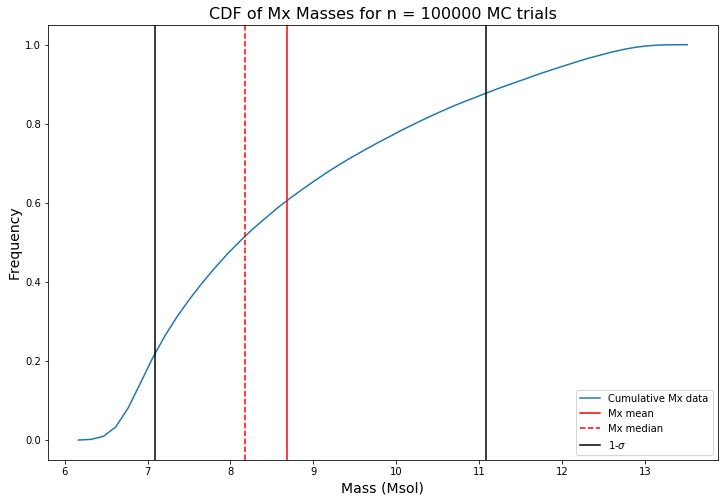

Mean Mx =  8.686304050044708
Median Mx =  8.17619561908814
1-sigma confidence interval for Mx:   7.088308 < Mx_mean (Msol) <  11.083676
1-sigma to left of mean =  1.597996 Msol
1-sigma to right of mean =  2.397372 Msol


In [53]:
# 1-sigma confidence interval: Range about mean in which 68.27% of data lies
Mx_mean = np.mean(Mx_list)
Mx_median = np.median(Mx_list)
# Making a cumulative plot to visualise how the data are distributed about the mean

data_mx, binedge_mx = np.histogram(Mx_list, bins = 50)

# Order the data in Mc from low to high
Mxsort = np.sort(Mx_list)

# Determining bin centres for plotting CDF:
bin_centre_mx = []
for i in range(0, len(binedge_mx)-1):
    bin_centre_mx.append(binedge_mx[i]+(binedge_mx[i+1] - binedge_mx[i])/2)

plt.plot(bin_centre_mx, np.cumsum(data_mx)/n, label = 'Cumulative Mx data')
plt.axvline(x = Mx_mean, color = 'red', label = 'Mx mean')
plt.axvline(x = Mx_median, color = 'red', linestyle = '--', label = 'Mx median')

plt.title('CDF of Mx Masses for n = '+str(n)+' MC trials', fontsize = 16)
plt.xlabel('Mass (Msol)', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)


# Find what fraction of the data lie below the mean by looping through the ordered list of Mc
# Until the value is larger than the mean:
i = 0
while (Mxsort[i] < Mx_mean):
    i = i+1
valx = i-1

# valx = final value in ordered list smaller than the mean

# Fraction of the data within the 1-sigma confidence interval to left of mean
lowerx = (valx/n)*0.6827

# Fraction of the data within the 1-sigma confidence interval to right of mean
upperx = ((n-valx)/n)*0.6827

# How from from 0 we have to go to reach these values of lower an upper:
lower1x = (valx/n) - lowerx
upper1x = (valx/n) + upperx

# The corresponding positions in the list giving the 1-sigma intervals:
sigx_min = Mxsort[int(lower1x*n)]
sigx_max = Mxsort[int(upper1x*n)]

# Value of left and right intervals:
sigx_left = Mx_mean - sigx_min
sigx_right = sigx_max - Mx_mean 

plt.axvline(x = sigx_min, color = 'black', label = '1-$\sigma$')
plt.axvline(x = sigx_max, color = 'black')


plt.legend(loc = 'lower right')
plt.show()

print('Mean Mx = ', Mx_mean)
print('Median Mx = ', Mx_median)

print('1-sigma confidence interval for Mx: ', '% .6f' % sigx_min, '< Mx_mean (Msol) <', '% .6f' % sigx_max)
print('1-sigma to left of mean =', '% .6f' % sigx_left, 'Msol')
print('1-sigma to right of mean =', '% .6f' % sigx_right, 'Msol')

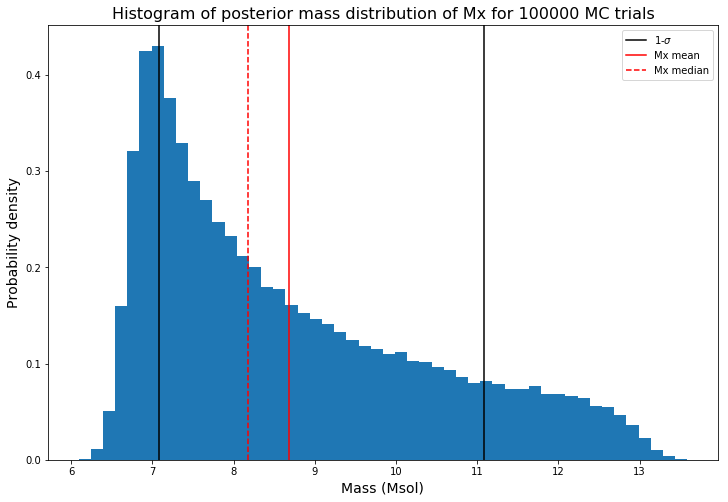

In [54]:
plt.hist(Mx_list, bins = 50, density = True)
plt.title('Histogram of posterior mass distribution of Mx for '+str(n)+' MC trials', fontsize = 16)
plt.xlabel('Mass (Msol)', fontsize = 14)
plt.ylabel('Probability density', fontsize = 14)

plt.axvline(x = sigx_min, color = 'black', label = '1-$\sigma$')
plt.axvline(x = sigx_max, color = 'black')
plt.axvline(x = Mx_mean, color = 'red', label = 'Mx mean')
plt.axvline(x = Mx_median, color = 'red', linestyle = '--', label = 'Mx median')



plt.legend()
plt.show()

## 12: Give the probability that the compact object mass is higher than 3 solar masses, and hence the probability that it is a black hole rather than a neutron star. [5]

------------

## Answer: 
Based on the histogram of the posterior mass distribution for $M_X$, I can say there is 100% probability that $M_X$ is larger than $3\,M_\odot$. Even with 100,000 MC trials, no masses are generated that are as low as $3\,M_\odot$ from the known initial conditions. From this, I would answer that there is a black hole in this system. Given that the companion most likely a K-type MS star, this system was most likely once a stellar-binary, with a <$1\,M_\odot$ star orbiting a more massive star. The higher mass star would have had a very short lifetime and has therefore undergone gravitational collapse. Given that the upper limit of mass that a neutron star (point in the lifetime of an intermediate mass star prior to becoming a black hole) can sustain under neutron degeneracy pressure is about $3\,M_\odot$, and the object we are considering is at the very least more than double this mass, I think we are observing a stellar black hole binary system.


-------------